In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm

In [2]:
v, v0, hc = sm.symbols("v, v0, h_c");
Hf = hc*(v**2)/(v**2 + v0**2)
Hfeq = sm.lambdify([hc, v, v0], Hf)
Hfeq

<function _lambdifygenerated(h_c, v, v0)>

In [3]:
w, R, a, lb, B, ro, Bc, mu, B0 = sm.symbols("w, R, alpha, lambda, B, rho, B_c, mu, B_0")

In [4]:
dwdt = R - a*w - lb*w*B
dwdt

-B*lambda*w + R - alpha*w

In [5]:
dBdt = ro*w*B*(1 - (B/(w*Bc))) - mu*B/(B + B0)
dBdt

-B*mu/(B + B_0) + B*rho*w*(-B/(B_c*w) + 1)

In [6]:
sm.Matrix([dwdt, dBdt])

Matrix([
[                 -B*lambda*w + R - alpha*w],
[-B*mu/(B + B_0) + B*rho*w*(-B/(B_c*w) + 1)]])

In [7]:
import random as rn
import pylab as pl

get_ipython().run_line_magic('matplotlib', 'inline')
def varying_extForce(N, Ts, ampl, mg):
    x0=pl.arange(0,N,Ts)
    sigs = np.zeros([10, len(x0)])

    phi = pl.linspace(0.001, 0.3, 100)
    amp = pl.linspace(2, 5, 100)

    for i in np.arange(10):

        amp1 = amp[rn.randint(0, 99)]
        phi1 = phi[rn.randint(0, 99)]

        y1= (amp1*pl.sin(phi1*pl.pi*x0) + mg)
        sigs[i:] = y1

    sigs1 = np.abs(ampl*np.apply_along_axis(np.mean, 0, sigs))
    plt.plot(sigs1)
    return(sigs1)


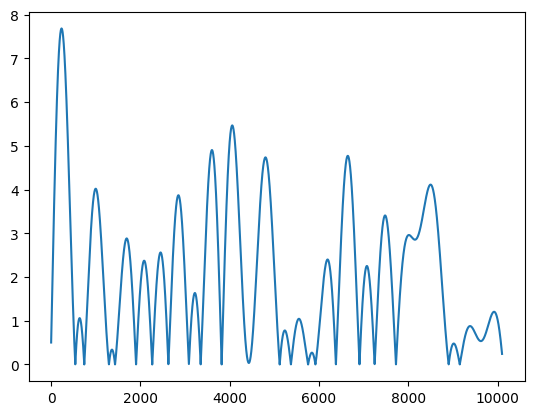

In [8]:
from scipy.integrate import solve_ivp
from scipy import stats
tend = 100
t_step = 0.01
t_span = (0, tend)
tint = np.linspace(0, tend, int(tend/t_step))

get_ipython().run_line_magic('matplotlib', 'inline')
Rts= varying_extForce(tend+1, t_step, 2.51, 0.2)


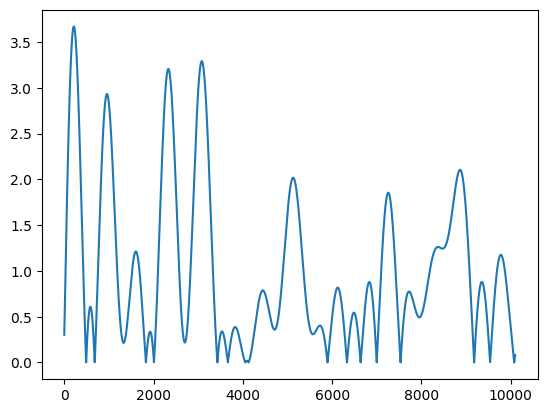

In [10]:
hD= varying_extForce(tend+1, t_step, 1.51, 0.2)


In [11]:
def eqn2_R (t, u, a, lb, ro, mu, Bc, B0,  tend, t_step, Rd):
    
    du = np.zeros([2, 1])
    
    w = u[0]
    B = u[1]
    
    from scipy.interpolate import interp1d
    xs = np.arange(len(Rd))
    y_interp = interp1d(xs, Rd)
    Rain = y_interp(t/t_step)
    Rn = Rain
    
    du[0] = Rn - a*w - lb*w*B
    du[1] = ro*w*B*(1 - (B/(w*Bc))) - mu*B/(B + B0)
    
    du = du.reshape(2,)
    return(du)


In [12]:
def eqn2_R_mu (t, u, a, lb, ro, Bc, B0,  tend, t_step, Rd, mud):
    
    du = np.zeros([2, 1])
    
    w = u[0]
    B = u[1]
    
    from scipy.interpolate import interp1d
    xs = np.arange(len(Rd))
    y_interp = interp1d(xs, Rd)
    Rain = y_interp(t/t_step)
    Rn = Rain
    
    y_interp = interp1d(xs, mud)
    hrvc = y_interp(t/t_step)
    h = hrvc
    
    du[0] = Rn - a*w - lb*w*B
    du[1] = ro*w*B*(1 - (B/(w*Bc))) - h*B/(B + B0)
    
    du = du.reshape(2,)
    return(du)


In [13]:
# a, lb, ro, mu, Bc, B0
sm.Matrix([dwdt, dBdt])

Matrix([
[                 -B*lambda*w + R - alpha*w],
[-B*mu/(B + B_0) + B*rho*w*(-B/(B_c*w) + 1)]])

In [14]:
# High resilience : high ro, high B0, high lb

import timeit

tend = 100
t_step = 0.01
t_span = (0, tend)
u0= [0.1, 3]
p = (0.1, 5, 4, 0.5, 5, 6, tend, t_step, Rts)
start_time = timeit.default_timer()
sl200 = solve_ivp (eqn2_R, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


0.8384491519999813


In [15]:
tend = 100
t_step = 0.01
t_span = (0, tend)
u0= [0.1, 3]
p = (0.1, 1, 1.5, 0.5, 5, 2, tend, t_step, Rts)
start_time = timeit.default_timer()
sl201 = solve_ivp (eqn2_R, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


0.5926418169999863


In [16]:
rndf = Rts[0:10000]
tsdf = (np.arange(len(rndf)) +1)/100
tsdf

array([1.000e-02, 2.000e-02, 3.000e-02, ..., 9.998e+01, 9.999e+01,
       1.000e+02])

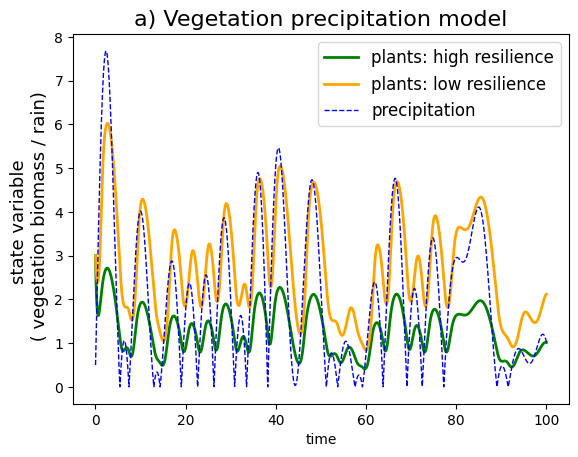

In [17]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(sl200.t, sl200.y[1], label = "plants: high resilience", color = 'green', linewidth=2)
plt.plot(sl201.t, sl201.y[1], label = "plants: low resilience", color = 'orange', linewidth=2)
plt.plot(tsdf, rndf, '--', linewidth=1, label = "precipitation", color = 'blue')
plt.xlabel("time"); plt.ylabel("state variable \n ( vegetation biomass / rain)", fontsize = 13)
plt.title ("a) Vegetation precipitation model", fontsize =16)
plt.legend(fontsize = 12)
plt.show()


In [102]:
def sdms_simu(j):

    tend = 100
    t_step = 0.01
    t_span = (0, tend)
    
    Rts= varying_extForce(tend+1, t_step, 2.51, 0.2)

    # High resilience : high ro, high B0, high lb
    u0= [0.1, 3]
    p = (0.1, 3, 2, 0.5, 5, 3, tend, t_step, Rts)
    start_time = timeit.default_timer()
    sl200 = solve_ivp (eqn2_R, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)

    # Low resilience :  low ro, low B0, low lb
    u0= [0.1, 3]
    p = (0.1, 0.5, 0.2, 0.5, 5, 0.5, tend, t_step, Rts)
    start_time = timeit.default_timer()
    sl201 = solve_ivp (eqn2_R, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)


    id='{0:04}'.format(j)
    sdms_df = pd.DataFrame({'high_resl': sl200.y[1], 'low_resl' : sl201.y[1],  'Rain' : Rts[0:10000]})
    fnm = "/home/karthik/jupyter_dir/SDMS/veg_rain_model/simu_" + id + ".csv"
    sdms_df.to_csv(fnm)
    print(j)

In [103]:
from joblib import Parallel, delayed
Parallel(n_jobs=8)(delayed(sdms_simu)(j) for j in np.arange(1000))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [18]:
import import_ipynb
%run /home/karthik/jupyter_dir/jupyter_env/IRI_calc.ipynb

In [43]:
import os
fls1 = os.listdir('/home/karthik/jupyter_dir/SDMS/veg_rain_model//')
fls = list(filter(lambda f:f.endswith('.csv'), fls1))
len(fls)

1000

In [44]:
rrts =np.zeros([1,8])
fpt = '/home/karthik/jupyter_dir/SDMS/veg_rain_model/'

for i in np.arange(len(fls)):
    
    df1 = pd.read_csv(fpt + fls[i])
    df1=df1.rename(columns = {'Unnamed: 0':'id'})
    df = df1.iloc[500:]
    
    rtts1 = resilience_calc_func(np.array(df.high_resl))
    rtts2 = resilience_calc_func(np.array(df.low_resl))

    rrts0_low = np.hstack((['low_resl'], rtts2))
    rrts0_high = np.hstack((['high_resl'], rtts1))


    rrts0 = np.vstack((rrts0_low, rrts0_high))
    rrts = np.vstack((rrts, rrts0))

    print(i)

[  nan  468.  381.   nan  170.  445.  450.  222. 1055.  295.   nan   nan
   nan   nan   nan   nan   nan  561.   nan   nan   nan   nan]
[ 170.  222.  295.  381.  445.  450.  468.  561. 1055.]
[  nan  691.  166.   nan  335. 1223.   nan 1940. 1335.   nan   nan   nan]
[ 166.  335.  691. 1223. 1335. 1940.]
0
[ 195.   nan  194.  164.   nan  165.  838.  156.   74.   nan  169.   nan
   nan   nan  427.   nan 1087. 1301.   nan   nan   nan  507.  541.   nan
  316.   nan   nan   nan]
[  74.  156.  164.  165.  169.  194.  195.  316.  427.  507.  541.  838.
 1087. 1301.]
[  nan  362.   69.  316.  239.   23.   nan   nan 1217. 1347. 1461.  492.
  801.   nan]
[  23.   69.  239.  316.  362.  492.  801. 1217. 1347. 1461.]
1
[  nan  113.   nan   nan  173.  156.   91.  205.  121.  170.  193.  628.
  183.  248.   nan  514.   nan   nan  441.  570.  531. 1078.  211.  552.
   nan   nan  333.  404.]
[  91.  113.  121.  156.  170.  173.  183.  193.  205.  211.  248.  333.
  404.  441.  514.  531.  552.  570.  62

[345. 124.  39. 163.  88. 105. 159.  64.  32.  nan 135.  57.  81.  nan
  nan 119.  nan 123.  92.  78. 206.  nan  nan 278. 429. 311. 316. 249.
 308. 390. 499.  nan 291. 466. 177.  nan  nan 265.  nan 272. 308. 490.
 474.  nan]
[ 32.  39.  57.  64.  78.  81.  88.  92. 105. 119. 123. 124. 135. 159.
 163. 177. 206. 249. 265. 272. 278. 291. 308. 308. 311. 316. 345. 390.
 429. 466. 474. 490. 499.]
[ nan 448.  nan  nan  nan  nan 259. 827.  nan 114.  nan  nan  nan 179.
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 978.  nan  nan  nan
 642.  nan]
[114. 179. 259. 448. 642. 827. 978.]
19
[  45.   nan  146.   38.   77.  237.   54.   nan   nan  144.  205.  203.
  143.   nan  136.  643.   nan 1061.  460.  431.  607.  550.   nan   nan
  417.  417.  683.  463.   nan   nan]
[  38.   45.   54.   77.  136.  143.  144.  146.  203.  205.  237.  417.
  417.  431.  460.  463.  550.  607.  643.  683. 1061.]
[791. 299.  nan 529.  nan 135.  nan  nan 292. 128.  nan  nan  nan  nan
  nan 863.  nan  nan 689. 44

[ nan 468. 409. 173.  nan 250.  nan 257.  nan 249. 277. 130. 105.  73.
 116.  75.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 293. 253.
 343. 299. 664.  nan]
[ 73.  75. 105. 116. 130. 173. 249. 250. 253. 257. 277. 293. 299. 343.
 409. 468. 664.]
36
[ 38.  nan  nan 133.  67.  73. 156.  86.  66.  64.  72. 185. 104.  68.
  49.  67.  nan 269. 168. 118. 308.  nan  nan 457. 404. 430. 410. 344.
 392. 337. 388. 324. 290. 420. 414. 533.  nan 431. 304.  nan]
[ 38.  49.  64.  66.  67.  67.  68.  72.  73.  86. 104. 118. 133. 156.
 168. 185. 269. 290. 304. 308. 324. 337. 344. 388. 392. 404. 410. 414.
 420. 430. 431. 457. 533.]
[265.  nan 529.  nan 138.  nan  nan 463.  nan  nan 138.  nan 657.  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[138. 138. 265. 463. 529. 657.]
37
[ nan 163.  nan  nan  nan 167.  74.  58. 144.  97.  97.  nan  nan 187.
 570.  83. 159.  62.  nan 484.  nan  nan  nan 436. 390. 662. 348. 371.
 307.  nan  nan  nan  nan 400. 621. 425.]
[ 58.  62.  74.  83.

[  nan  312.  125.  754.  164.  462.  184.   nan   nan   nan   nan   nan
   nan   nan 1078.   nan   nan   nan   nan  626.   nan   nan   nan   nan
   nan   nan]
[ 125.  164.  184.  312.  462.  626.  754. 1078.]
[331.  nan  nan  nan 456. 269.  nan  nan  nan  nan  nan  nan  nan  nan
 659.  nan  nan  nan]
[269. 331. 456. 659.]
54
[523. 104. 113. 512.  53. 117.  nan  nan  nan 255.  nan 190.  nan 556.
  nan  nan 628. 691.  nan  nan  nan 553.  nan  nan]
[ 53. 104. 113. 117. 190. 255. 512. 523. 553. 556. 628. 691.]
[ nan  nan  nan  nan 802.  nan  nan  nan  nan  nan  nan  nan]
[802.]
55
[108. 502. 177. 295. 146. 133.  86.  49.  63. 136.  nan 221.  nan 120.
 191.  nan  nan  nan 633. 682. 354. 286. 356. 480. 295. 247.  nan 657.
  nan 401. 405.  nan]
[ 49.  63.  86. 108. 120. 133. 136. 146. 177. 191. 221. 247. 286. 295.
 295. 354. 356. 401. 405. 480. 502. 633. 657. 682.]
[ 48. 615. 172.  nan  nan  nan 179.  nan 499. 272. 230.  nan  nan  nan
 626.  nan  nan  nan  nan  nan 500. 712. 343.  nan]
[ 48.

[ 265.  300.  441.   nan   nan   nan  223.  189. 1204.   nan   nan   nan
   nan   nan 1290. 1081.]
[ 189.  223.  265.  300.  441. 1081. 1204. 1290.]
72
[ 288.   42.   67.  103.   nan  150.   nan  135.   nan  132.  177.  477.
   nan  174. 1060.   nan   nan   nan  415.  277.  316.   nan  653.   nan
  299.   nan  476.   nan   nan   nan   nan   nan   nan   nan]
[  42.   67.  103.  132.  135.  150.  174.  177.  277.  288.  299.  316.
  415.  476.  477.  653. 1060.]
[  nan  266.  278.   nan   nan  273.  339.  934.   nan   nan  933.   nan
   nan 1209.   nan   nan]
[ 266.  273.  278.  339.  933.  934. 1209.]
73
[ 135.   nan   nan  180.   nan  762.   nan  171.   95.   nan   nan  265.
   nan   nan 1108.   nan   nan   nan   nan   nan   nan  400.  863.   nan
   nan  448.   nan   nan]
[  95.  135.  171.  180.  265.  400.  448.  762.  863. 1108.]
[  nan  712.   nan  484.  306.  556.   nan   nan 2248.   nan   nan   nan
  557.   nan]
[ 306.  484.  556.  557.  712. 2248.]
74
[ nan  69.  31.  nan  nan 1

[  nan 1598.  163.   nan   nan  251.  123.   nan   nan  293.   nan   nan
  415.   nan   nan  506.  611.   nan   nan  294.]
[ 123.  163.  251.  293.  294.  415.  506.  611. 1598.]
92
[  nan   nan  100.   74.  336.   nan   nan  161.   64.  138.  120.   78.
   93.   84.  227.   nan   nan  525.  473.  547.   nan   nan  640.  407.
  314.  598.  377.  352.  549. 1078.]
[  64.   74.   78.   84.   93.  100.  120.  138.  161.  227.  314.  336.
  352.  377.  407.  473.  525.  547.  549.  598.  640. 1078.]
[236. 553.  nan 404. 808. 134.  nan 381.  32. 218.  nan  nan  nan  nan
  nan  nan  nan  nan 703. 977.]
[ 32. 134. 218. 236. 381. 404. 553. 703. 808. 977.]
93
[ nan 155. 140.  83. 176.  nan 123. 216. 239.  nan 118. 372.  76.  66.
  nan 121.  nan 436. 484. 579. 316.  nan 383. 367. 771.  nan  nan  nan
 424. 712.  nan 660.]
[ 66.  76.  83. 118. 121. 123. 140. 155. 176. 216. 239. 316. 367. 372.
 383. 424. 436. 484. 579. 660. 712. 771.]
[ nan 242.  70.  nan  nan  nan 365. 203.  nan 829. 183.  nan 473

[ 247.   60.   82.  388.   nan  111. 1193.  526.   nan   nan   nan  567.
   nan   nan   nan   nan   nan  702.   nan   nan]
[  60.   82.  111.  247.  388.  526.  567.  702. 1193.]
110
[ 64.  nan 154.  89. 163.  71. 196.  nan 234. 143. 138. 222.  nan  83.
 733.  nan 392. 426. 428. 639. 344.  nan 995. 300. 450. 469.  nan 556.]
[ 64.  71.  83.  89. 138. 143. 154. 163. 196. 222. 234. 300. 344. 392.
 426. 428. 450. 469. 556. 639. 733. 995.]
[ 884.  611.   nan  145.  441.  147.   nan  296.   nan  864.   nan 1194.
 1275.  350.   nan   nan]
[ 145.  147.  296.  350.  441.  611.  864.  884. 1194. 1275.]
111
[ nan 127.  nan 159.  nan  nan 268. 121. 161. 567. 139. 139. 566. 157.
  nan 681.  nan 614.  nan  nan 633. 410.  nan  nan 599.  nan  nan  nan]
[121. 127. 139. 139. 157. 159. 161. 268. 410. 566. 567. 599. 614. 633.
 681.]
[ 146.   nan  265.   nan   nan  207.  290.  111.   52.  692.  793.   nan
  670.   nan   nan  399. 1144.  726.   nan   nan]
[  52.  111.  146.  207.  265.  290.  399.  670.  69

[  nan   nan   nan   nan   nan  302.  124.   28.  269.  282.   nan  278.
   nan   nan   nan   nan   nan   nan  759.  425.  302.  576.   nan 1007.]
[  28.  124.  269.  278.  282.  302.  302.  425.  576.  759. 1007.]
128
[128. 174.  73.  58. 366. 104.  83.  nan  nan 139.  84.  nan 549. 368.
 704. 471. 671. 772. 388. 582.  nan  nan 429. 579.  nan 867.]
[ 58.  73.  83.  84. 104. 128. 139. 174. 366. 368. 388. 429. 471. 549.
 579. 582. 671. 704. 772. 867.]
[209.  nan 835. 382. 103.  56.  nan  nan 127.  nan  nan  nan  nan 509.
 402. 710.  nan  nan 783.  nan]
[ 56. 103. 127. 209. 382. 402. 509. 710. 783. 835.]
129
[218. 106. 146. 137.  97. 104.  nan  nan 415. 131.  nan 580.  57.  85.
 157.  90. 765. 368. 633. 288. 381. 302.  nan  nan 558.  nan  nan  nan
 425. 456. 334.  nan]
[ 57.  85.  90.  97. 104. 106. 131. 137. 146. 157. 218. 288. 302. 334.
 368. 381. 415. 425. 456. 558. 580. 633. 765.]
[196. 373. 158.  nan 154.  72. 913.  nan  nan 555.  nan 120.  nan  nan
 655.  nan 429. 251.  nan  nan  n

[ nan  nan  nan 604.  nan 129. 115. 301. 280.  nan  nan  nan  nan  nan
  nan 553.  nan  nan 434.  nan]
[115. 129. 280. 301. 434. 553. 604.]
146
[  71.  181.  663.   nan   nan   nan  171.   94.   91.  194.  106.  410.
  231.  623.   nan   nan   nan   nan   nan  643.  317.  498.  458.   nan
   nan 1031.]
[  71.   91.   94.  106.  171.  181.  194.  231.  317.  410.  458.  498.
  623.  643.  663. 1031.]
[ 694.  154.  845.  424.  581.   nan  165.  397.   nan   nan   nan   nan
   nan   nan 1188.  919.]
[ 154.  165.  397.  424.  581.  694.  845.  919. 1188.]
147
[124.  nan 108.  54.  nan  nan  nan  nan  nan  nan 158.  75. 158.  98.
 131.  64. 133. 518.  nan 594. 412.  nan  nan  nan  nan  nan  nan 663.
 327. 201. 481. 497. 485. 756.]
[ 54.  64.  75.  98. 108. 124. 131. 133. 158. 158. 201. 327. 412. 481.
 485. 497. 518. 594. 663. 756.]
[611. 118. 631. 762. 565. 196. 606. 123.  nan  nan  nan  nan  nan 197.
  nan  nan]
[118. 123. 196. 197. 565. 606. 611. 631. 762.]
148
[132. 176. 247.  93.  74.  

[ 621.    5.   nan  442.  332.  702.  261.  397. 1706.  388.   nan 1291.
   nan   nan 1291. 1213.]
[   5.  261.  332.  388.  397.  442.  621.  702. 1213. 1291. 1291. 1706.]
165
[101.  nan  nan 110.  86. 158.  90. 226.  49.  60.  nan  nan 222. 102.
 127.  nan 165.  nan 319.  nan  nan 408. 547. 405. 413. 381. 535. 484.
  nan  nan 970. 543. 440.  nan 341.  nan]
[ 49.  60.  86.  90. 101. 102. 110. 127. 158. 165. 222. 226. 319. 341.
 381. 405. 408. 413. 440. 484. 535. 543. 547. 970.]
[ nan 114.  nan 144. 536. 705. 351. 636.  33.  nan  nan 666.  nan 465.
  nan  nan  nan  nan 426.  nan]
[ 33. 114. 144. 351. 426. 465. 536. 636. 666. 705.]
166
[ nan 102.  nan 123. 184. 344.  65.  nan 112. 124.  nan 114. 112.  84.
 236.  nan  nan  nan 445.  nan 452.  nan  nan 691.  nan 557. 648.  nan
 471. 238. 553. 375.  nan  nan]
[ 65.  84. 102. 112. 112. 114. 123. 124. 184. 236. 238. 344. 375. 445.
 452. 471. 553. 557. 648. 691.]
[ 121.  247.  261.   23.  160.   84.  124.  123.  108.   nan   nan  505.
  418. 

[707. 278. 367. 445. 242.  nan 511. 394.  nan  82. 194.  nan 315.  nan
  nan 574.  nan  nan  nan  nan 672. 521.]
[ 82. 194. 242. 278. 315. 367. 394. 445. 511. 521. 574. 672. 707.]
184
[ 99.  83. 119. 736. 529. 135. 163.  nan 260. 390. 211.  nan 134. 550.
  nan  nan 962. 306. 574.  nan 591. 909.  nan  nan]
[ 83.  99. 119. 134. 135. 163. 211. 260. 306. 390. 529. 550. 574. 591.
 736. 909. 962.]
[  nan   nan 1007.  361.   nan  329. 1191.  376.   nan   nan   nan  566.
   nan  532. 1664.  377.]
[ 329.  361.  376.  377.  532.  566. 1007. 1191. 1664.]
185
[100.  64.  64.  nan  nan  nan  nan  83. 429.  nan 185.  nan  nan  nan
  nan 119.  61.  nan  nan  81.  nan 477. 230. 475.  nan  nan  nan  nan
  nan  nan  nan 418.  nan  nan  nan  nan 239. 511.  nan  nan 457.  nan]
[ 61.  64.  64.  81.  83. 100. 119. 185. 230. 239. 418. 429. 457. 475.
 477. 511.]
[  nan  714.   nan   nan  307.   nan   nan 1128.  129.   nan   nan   nan
   nan 1458.   nan   nan 1817.   nan]
[ 129.  307.  714. 1128. 1458. 1817.]


[ nan 713. 105. 668. 122.  nan  nan  nan  nan 269.  nan  nan  nan  nan
  nan  nan 746.  nan  nan  nan  nan 693.  nan  nan]
[105. 122. 269. 668. 693. 713. 746.]
201
[121.  nan  nan  nan 275. 130.  91. 114.  98. 177. 112. 265. 156. 299.
  nan  nan  nan 625. 599. 531. 351. 593. 628. 594. 911. 755.]
[ 91.  98. 112. 114. 121. 130. 156. 177. 265. 275. 299. 351. 531. 593.
 594. 599. 625. 628. 755. 911.]
[ 839.   nan   nan  191.  330.   nan  296.  288. 3625.   nan   nan  336.
  815.   nan  892.  548.]
[ 191.  288.  296.  330.  336.  548.  815.  839.  892. 3625.]
202
[108. 153.  nan  nan 251.  nan 229.  nan 123. 121.  nan 107.  55. 118.
  63.  76. 666. 591.  nan  nan 593.  nan 672.  nan 476. 756.  nan 314.
 548. 497. 288. 317.]
[ 55.  63.  76. 107. 108. 118. 121. 123. 153. 229. 251. 288. 314. 317.
 476. 497. 548. 591. 593. 666. 672. 756.]
[840. 189.  nan 308. 210.  83.  nan  91.  nan  nan  nan  nan 623.  nan
 628. 520. 841.  nan  nan  nan  nan  nan]
[ 83.  91. 189. 210. 308. 520. 623. 628. 840.

[ 163.  198.   nan  138.  134.  106.  826.   nan   nan   nan   nan  114.
 1428.  541.   nan  453.  270.   nan   nan   nan   nan   nan   nan  530.]
[ 106.  114.  134.  138.  163.  198.  270.  453.  530.  541.  826. 1428.]
[1754.   nan  301.   nan  158.  960.   nan   nan  266.   nan   nan  419.
   nan   nan   nan   nan   nan   nan]
[ 158.  266.  301.  419.  960. 1754.]
220
[ nan 202.  62.  nan 137.  85. 131. 141.  80. 298.  39. 142.  nan  nan
 178.  78.  nan 655. 376.  nan 507. 384. 462. 645. 561. 922. 425. 183.
  nan  nan 405.  nan]
[ 39.  62.  78.  80.  85. 131. 137. 141. 142. 178. 183. 202. 298. 376.
 384. 405. 425. 462. 507. 561. 645. 655. 922.]
[215. 454. 247. 434. 125. 179. 699. 256. 768.  nan  nan  nan  nan  nan
 414.  nan  nan  nan  nan  nan]
[125. 179. 215. 247. 256. 414. 434. 454. 699. 768.]
221
[536. 167.  89. 183.  nan  nan  nan  nan  nan 153. 182.  88.  nan 134.
 195.  nan 559. 740. 538.  nan  nan  nan  nan  nan 662. 483. 664.  nan
 543. 276.]
[ 88.  89. 134. 153. 167. 182. 

[ nan 587. 111.  nan 867.  nan  nan  nan  nan 179. 595. 632.  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan 500.  nan  nan  nan]
[111. 179. 500. 587. 595. 632. 867.]
238
[118. 167. 333. 185.  nan 126. 159. 351. 263. 118.  nan  nan 145. 774.
  nan  nan 335.  nan 602. 351. 986. 332. 589.  nan  nan 573.]
[118. 118. 126. 145. 159. 167. 185. 263. 332. 333. 335. 351. 351. 573.
 589. 602. 774. 986.]
[  nan 1135.   nan  280.  478.  188.   nan   nan   nan 1004.  971.  847.]
[ 188.  280.  478.  847.  971. 1004. 1135.]
239
[ nan 521. 176.  nan 133. 101. 206.  nan  nan  nan  91. 564. 158. 140.
  nan  nan  nan 495.  nan 256. 477. 288.  nan  nan  nan  nan  nan 318.
 568.  nan]
[ 91. 101. 133. 140. 158. 176. 206. 256. 288. 318. 477. 495. 521. 564.
 568.]
[ nan 682. 315.  nan 257.  nan  nan 312. 809. 207.  nan  nan 386.  nan
 538.  nan  nan  nan  nan 570.]
[207. 257. 312. 315. 386. 538. 570. 682. 809.]
240
[142.  84.  73.  nan  nan 174. 448.  nan 113. 157.  95.  64.  nan  nan
  91.  58.  nan  nan 

[  nan   nan   nan  548.   nan  635.   nan  213.  200.  116.  192.   nan
   nan   nan   nan   nan 1214.   nan  518.  746.  586.  714.]
[ 116.  192.  200.  213.  518.  548.  586.  635.  714.  746. 1214.]
256
[  nan  116.   nan  150.   nan   nan  170.  195.  175.  207.  229.  117.
   nan  152.   nan  671.   nan  609.   nan   nan  609.  371. 1146.  802.
  469.  521.   nan  393.]
[ 116.  117.  150.  152.  170.  175.  195.  207.  229.  371.  393.  469.
  521.  609.  609.  671.  802. 1146.]
[  93.  208.  373.   nan  231.  165.   nan  190.   nan  985.  629.  610.
   nan 1328.  773.   nan  593.   nan]
[  93.  165.  190.  208.  231.  373.  593.  610.  629.  773.  985. 1328.]
257
[ 550.  162.  118.   nan   nan  158.   nan  149.  136.   nan  106.   73.
   nan   nan   nan 1493.  520.   nan   nan  797.   nan  438.  509.   nan
  603.  534.   nan   nan]
[  73.  106.  118.  136.  149.  158.  162.  438.  509.  520.  534.  550.
  603.  797. 1493.]
[638. 183. 543. 303.  nan 242. 162. 557.  nan  nan  nan 

[137. 120.  73.  66.  82.  nan  93.  84. 113.  nan 118. 133.  nan 102.
 126. 525.  nan 128.  nan  nan 115. 389. 471. 230. 476. 461.  nan 362.
 263. 245.  nan 459. 414.  nan 451.  nan  nan  nan 305.  nan  nan  nan]
[ 66.  73.  82.  84.  93. 102. 113. 115. 118. 120. 126. 128. 133. 137.
 230. 245. 263. 305. 362. 389. 414. 451. 459. 461. 471. 476. 525.]
[155. 161.  nan  nan 613. 125. 242.  nan 210. 192. 177. 119. 777.  nan
  nan 350.  nan  nan  nan  nan  nan  nan  nan 499. 396. 513.  nan  nan
  nan  nan]
[119. 125. 155. 161. 177. 192. 210. 242. 350. 396. 499. 513. 613. 777.]
274
[ nan  67. 104. 111.  63.  nan 227.  nan 163. 152.  73.  nan  nan 186.
 125. 182.  nan 535. 595. 569. 294.  nan 378.  nan 506. 470. 379.  nan
  nan 287. 386. 878.]
[ 63.  67.  73. 104. 111. 125. 152. 163. 182. 186. 227. 287. 294. 378.
 379. 386. 470. 506. 535. 569. 595. 878.]
[  nan   nan 1110.   nan  801.  582.   nan   nan  258.   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 258.  582.  801. 1110.]
275


[890.  44. 121.  nan  nan 224. 735.  65. 474.  nan 154.  nan  nan  nan
 911. 463.  nan  nan  nan  nan  nan  nan  nan 482.  nan  nan]
[ 44.  65. 121. 154. 224. 463. 474. 482. 735. 890. 911.]
291
[135. 165. 121.  nan 131.  nan 172.  83. 136. 213.  65.  48.  78.  nan
 237. 563. 153.  nan  nan 965. 382. 232.  nan 284.  nan 258. 415. 223.
 570. 420. 340. 293.  nan  nan  nan 584.  nan  nan]
[ 48.  65.  78.  83. 121. 131. 135. 136. 153. 165. 172. 213. 223. 232.
 237. 258. 284. 293. 340. 382. 415. 420. 563. 570. 584. 965.]
[1124.  101.   nan   nan   nan  327.  301.   19.   nan  338.  541.  162.
   nan  269.   nan   nan   nan  746.  458.   nan   nan  339.  985.  667.]
[  19.  101.  162.  269.  301.  327.  338.  339.  458.  541.  667.  746.
  985. 1124.]
292
[ 62.  65. 134.  60. 152.  nan  nan  nan 125.  nan  nan 144.  74.  nan
  83. 120.  nan 130. 126.  nan 172. 554. 489. 403. 187.  nan  nan  nan
 580.  nan  nan 542. 355.  nan 542. 592.  nan 311. 272.  nan]
[ 60.  62.  65.  74.  83. 120. 125. 1

[ nan 691.  nan 377.  nan  nan 223. 487. 190.  65.  nan 179.  nan  nan
  nan 824.  nan  nan  nan  nan 386. 267.  nan 575.]
[ 65. 179. 190. 223. 267. 377. 386. 487. 575. 691. 824.]
309
[101. 112.  nan 116.  83.  nan 130.  66. 585.  nan  nan  nan 115. 218.
  nan 147. 771. 471. 465.  nan 265. 406.  nan 331.  nan  nan  nan  nan
  nan 389. 679.  nan  nan  nan]
[ 66.  83. 101. 112. 115. 116. 130. 147. 218. 265. 331. 389. 406. 465.
 471. 585. 679. 771.]
[555.  28.  nan 137. 499. 869.  nan  nan 311. 239. 825.  nan 632.  nan
 476.  nan  nan  nan  nan 624.  nan  nan]
[ 28. 137. 239. 311. 476. 499. 555. 624. 632. 825. 869.]
310
[355.  45. 567.  nan  nan 217. 101.  nan  90.  58.  49. 297.  72.  nan
  nan  nan  nan 138.  nan  nan  nan  nan  nan 373. 363.  nan 477. 238.
 629. 820. 369.  nan  nan  nan  nan  nan]
[ 45.  49.  58.  72.  90. 101. 138. 217. 238. 297. 355. 363. 369. 373.
 477. 567. 629. 820.]
[  nan  708. 1241.  982.  227.  431.   nan   nan   nan   nan   nan   nan]
[ 227.  431.  708.  982.

[1060.   nan   nan   nan  256.   51.   nan  181.  238.  844.   nan   nan
   nan   nan  420.  624.   nan  696.   nan   nan]
[  51.  181.  238.  256.  420.  624.  696.  844. 1060.]
328
[ 41.  55. 184.  nan 122. 465.  29.  nan 120.  81. 134. 107. 107.  nan
 166. 149. 270. 679. 558.  nan  nan  nan 601.  nan 317. 447. 207. 414.
 423.  nan 387. 465.]
[ 29.  41.  55.  81. 107. 107. 120. 122. 134. 149. 166. 184. 207. 270.
 317. 387. 414. 423. 447. 465. 465. 558. 601. 679.]
[987. 264. 230. 816.  nan 139. 169. 116.  nan  nan  nan 502.  nan  nan
  nan 719. 414. 415.  nan  nan]
[116. 139. 169. 230. 264. 414. 415. 502. 719. 816. 987.]
329
[ nan 102. 127. 383. 114. 106. 207. 100. 203.  nan 149.  nan 134. 112.
  69. 157. 169. 125.  nan 410.  nan  nan 309. 412. 653. 319. 268.  nan
 613.  nan 370. 558. 374. 275. 285.  nan]
[ 69. 100. 102. 106. 112. 114. 125. 127. 134. 149. 157. 169. 203. 207.
 268. 275. 285. 309. 319. 370. 374. 383. 410. 412. 558. 613. 653.]
[462. 106.  nan 255. 140. 259. 296.  nan 328

[  nan 1075.   nan   nan  317.  360.  128.  102.  281.   nan   nan   nan
   nan   nan  699. 1287.  491.   nan  282.   nan]
[ 102.  128.  281.  282.  317.  360.  491.  699. 1075. 1287.]
346
[ nan 194.  nan 173. 126. 551.  nan 239.  nan 183. 158. 378.  nan 159.
  nan 308.  nan 339.  nan  nan  nan 763.  nan 668. 852. 687.  nan 424.]
[126. 158. 159. 173. 183. 194. 239. 308. 339. 378. 424. 551. 668. 687.
 763. 852.]
[ 811.   nan  488.  422.  297.  339.   nan  128.   nan   nan   nan   nan
 1398. 1212.  374.   nan   nan   nan]
[ 128.  297.  339.  374.  422.  488.  811. 1212. 1398.]
347
[ 37.  nan 206. 267.  nan 206. 228. 208. 211.  nan 265. 152. 282. 213.
 165. 352.  66. 226.  nan 516. 572.  nan 436.  nan  nan  nan  nan  nan
  nan  nan 936.  nan  nan  nan]
[ 37.  66. 152. 165. 206. 206. 208. 211. 213. 226. 228. 265. 267. 282.
 352. 436. 516. 572. 936.]
[ 64. 618.  76.  nan  nan 809.  38.  nan  nan 257.  nan  nan  nan  nan
  nan  nan  nan  nan 562.  nan  nan 463.  nan  nan]
[ 38.  64.  76. 257

[435. 143.  nan  86.  95. 131. 167.  92. 102.  nan 176.  76.  nan  nan
  nan 205. 127.  nan 202.  nan 463. 298. 674. 333. 410. 304.  nan 436.
 665.  nan  nan  nan 889. 434.]
[ 76.  86.  92.  95. 102. 127. 131. 143. 167. 176. 202. 205. 298. 304.
 333. 410. 434. 435. 436. 463. 665. 674. 889.]
[ 652.  168.  267.  146.  181.  128.  256.  623.  361.   nan   nan  268.
   nan   nan   nan   nan 1388. 1317.]
[ 128.  146.  168.  181.  256.  267.  268.  361.  623.  652. 1317. 1388.]
365
[118. 113. 142.  nan 222. 147.  85. 117.  nan 160.  nan 680. 212. 345.
  nan 592. 397. 211.  nan 363. 523. 286. 281.  nan  nan  nan  nan 473.
 656.  nan]
[ 85. 113. 117. 118. 142. 147. 160. 211. 212. 222. 281. 286. 345. 363.
 397. 473. 523. 592. 656. 680.]
[ nan 518.  nan  nan 259. 315.  nan 438. 796.  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[259. 315. 438. 518. 796.]
366
[692. 180. 114. 154. 104.  nan 229.  41.  78. 101.  80. 559.  nan  nan
  nan 385. 401. 444. 408.  nan 689. 4

[ 806.  183.  301.   57.  219.  692.  150.   nan  773.  829.  438.   nan
   nan 1059.]
[  57.  150.  183.  219.  301.  438.  692.  773.  806.  829. 1059.]
382
[624. 133. 221. 117.  98.  95.  nan 229. 278. 143. 171. 194.  nan 565.
 497. 310. 384. 402.  nan 559. 834. 754. 485. 935.]
[ 95.  98. 117. 133. 143. 171. 194. 221. 229. 278. 310. 384. 402. 485.
 497. 559. 565. 624. 754. 834. 935.]
[ nan 587.  nan 187.  83.  nan 322. 110. 389. 283.  nan  nan  nan 403.
 431.  nan 794.  nan  nan 968.]
[ 83. 110. 187. 283. 322. 389. 403. 431. 587. 794. 968.]
383
[259.  59. 314.  nan  nan 810.  nan 215.  nan 184. 877. 919.  nan  nan
  nan  nan  nan 414.  nan 557.]
[ 59. 184. 215. 259. 314. 414. 557. 810. 877. 919.]
[ 362.   nan  429.   nan  316.   nan   nan   nan  991.   nan 1165.   nan
   nan   nan   nan   nan]
[ 316.  362.  429.  991. 1165.]
384
[ 76. 159. 222. 202.  77.  55.  97. 170. 109.  nan 287. 135. 184. 138.
  85. 565. 301. 485. 397. 471. 426. 705. 430. 584.  nan 313. 348. 568.
 446.  nan]
[ 

[ nan 379.  nan  nan 189. 311.  nan  nan 140.  nan 794.  82.  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan 431.]
[ 82. 140. 189. 311. 379. 431. 794.]
400
[ nan  97.  nan 149.  97. 112.  nan 208. 120.  nan 168. 141.  95.  70.
  56.  86. 127. 128.  nan 736.  nan 497. 335. 355.  nan 452. 335.  nan
 433. 420. 360. 397. 433. 302. 339. 644.]
[ 56.  70.  86.  95.  97.  97. 112. 120. 127. 128. 141. 149. 168. 208.
 302. 335. 335. 339. 355. 360. 397. 420. 433. 433. 452. 497. 644. 736.]
[ 49. 193. 332. 139.  nan  nan  nan  nan 137.  nan  nan 312. 134. 175.
 930.  nan  nan 309.  nan  nan  nan  nan  nan  nan  nan  nan 249. 723.]
[ 49. 134. 137. 139. 175. 193. 249. 309. 312. 332. 723. 930.]
401
[ 31. 122. 192.  48.  45.  44.  52.  nan  nan 135.  28.  85.  nan  nan
  nan 246.  nan  nan 275. 318. 695. 316. 524. 348. 564.  nan  nan 557.
 492. 228.  nan  nan  nan 333.  nan  nan]
[ 28.  31.  44.  45.  48.  52.  85. 122. 135. 192. 228. 246. 275. 316.
 318. 333. 348. 492. 524. 557. 564. 695.]
[ 2

[ 78.  68. 167.  94.  nan 205. 147.  nan 288. 215. 181. 699. 500. 515.
  nan 988. 861.  nan 774. 879.]
[ 68.  78.  94. 147. 167. 181. 205. 215. 288. 500. 515. 699. 774. 861.
 879. 988.]
[  nan  479.   43.  459.  945. 1227.   nan   nan  560.   nan   nan 1927.]
[  43.  459.  479.  560.  945. 1227. 1927.]
419
[100. 133.  nan 167. 185.  nan 123.  nan 120.  nan 209.  84.  nan 485.
  92.  nan 176. 581. 415.  nan 674. 374.  nan 379.  nan 394.  nan 313.
  nan  nan  nan 311.  nan 386.]
[ 84.  92. 100. 120. 123. 133. 167. 176. 185. 209. 311. 313. 374. 379.
 386. 394. 415. 485. 581. 674.]
[ nan 421. 274.  nan  nan  nan  nan 334.  nan 899.  nan  nan 699.  nan
  nan  nan  nan  nan  nan  nan]
[274. 334. 421. 699. 899.]
420
[  nan  797.   nan  266.   nan   nan  138.  233.   nan  170.  113.   nan
  195.   nan   nan   nan  378.   nan   nan  524.  463.   nan  351. 1077.
   nan   nan]
[ 113.  138.  170.  195.  233.  266.  351.  378.  463.  524.  797. 1077.]
[  nan   nan  492. 1361.  140.   nan   nan  361

[ 380.  253.   nan  324.  461.   nan   nan  704.  324.   93.   nan 1117.
   nan  467.   nan   nan   nan   nan  608.  681.]
[  93.  253.  324.  324.  380.  461.  467.  608.  681.  704. 1117.]
438
[ 76.  nan 119.  nan 231.  99.  nan 202. 278.  nan  nan  99.  71.  90.
  69. 595.  nan 453.  nan 496. 517.  nan 638. 959.  nan  nan 596. 287.
 336.  nan]
[ 69.  71.  76.  90.  99.  99. 119. 202. 231. 278. 287. 336. 453. 496.
 517. 595. 596. 638. 959.]
[ 758.  307.  693.  329.  291.  213.   nan   nan  409. 1308.  465.  956.
   nan   nan]
[ 213.  291.  307.  329.  409.  465.  693.  758.  956. 1308.]
439
[116.  nan  nan  89. 123.  nan 136.  nan  77.  68.  81.  89.  nan  nan
  nan 114.  57.  nan 503.  nan  nan 642. 609.  nan 539.  nan 494. 265.
 363. 378.  nan  nan  nan 368. 532.  nan]
[ 57.  68.  77.  81.  89.  89. 114. 116. 123. 136. 265. 363. 368. 378.
 494. 503. 532. 539. 609. 642.]
[ 562.  242.  721.  246.   70.   nan  382.  524.   nan   nan   nan  733.
   nan   nan   nan 1211.]
[  70.  242.  

[518. 135. 224.  nan  nan 166. 742. 100.  nan 132. 296.  nan 153. 139.
  nan  nan  94.  nan 452. 310.  nan  nan  nan  nan 226.  nan  nan  nan
  nan 360. 540.  nan  nan  nan]
[ 94. 100. 132. 135. 139. 153. 166. 224. 226. 296. 310. 360. 452. 518.
 540. 742.]
[ 697.  105.   nan  398. 1097.  208.   nan  209.  223.   nan  485.   nan
   nan   nan 1160.   nan  595.   nan]
[ 105.  208.  209.  223.  398.  485.  595.  697. 1097. 1160.]
456
[ nan 115. 149.  nan 189. 181.  nan 126.  nan 131.  nan 163.  nan 126.
  60.  58. 141.  nan 787. 234.  nan 522. 386.  nan 571.  nan 371.  nan
 617.  nan 586. 342. 517.  nan]
[ 58.  60. 115. 126. 126. 131. 141. 149. 163. 181. 189. 234. 342. 371.
 386. 517. 522. 571. 586. 617. 787.]
[1153.   nan   nan  258.   nan  275.  196.   nan   nan   nan   nan   nan
  710.   nan  671.   nan   nan   nan]
[ 196.  258.  275.  671.  710. 1153.]
457
[ nan 441.  74.  79. 140.  nan 121. 411.  97. 118. 264.  nan  nan 107.
  nan 170.  nan  nan  nan  nan 274. 349. 440.  nan  nan  nan

[120.  nan 185.  nan 184.  nan 121. 243. 236. 845. 103.  nan  nan 144.
 652.  nan 422.  nan 391.  nan 612. 545.  nan 846. 970.  nan  nan  nan]
[103. 120. 121. 144. 184. 185. 236. 243. 391. 422. 545. 612. 652. 845.
 846. 970.]
[ 741.   nan   nan   nan  244.   nan  302. 1061.   nan   nan   nan   nan
   nan  725.   nan   nan   nan   nan]
[ 244.  302.  725.  741. 1061.]
474
[153. 179.  nan  nan 122.  44.  72.  75.  nan  nan 217. 154. 155. 119.
  96.  98.  nan 661. 381.  nan  nan 787. 431. 262. 412.  nan  nan 308.
 470. 355. 644. 249. 383.  nan]
[ 44.  72.  75.  96.  98. 119. 122. 153. 154. 155. 179. 217. 249. 262.
 308. 355. 381. 383. 412. 431. 470. 644. 661. 787.]
[696.  nan 277.  nan 560.  nan  nan 196. 387.  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[196. 277. 387. 560. 696.]
475
[ 86.  86.  nan 105.  86.  nan 111.  95.  73.  66.  nan  nan 115. 156.
  nan 172. 149. 113. 108.  nan 558. 322.  nan 387. 391.  nan 395. 312.
 466. 435.  nan  nan 515. 533.  nan 323. 280. 392. 406.  nan]
[ 

[627.  nan  nan 223.  nan  nan 276. 103.  59. 290.  nan  nan  nan  nan
  nan  nan  nan 789. 894. 394.]
[ 59. 103. 223. 276. 290. 394. 627. 789. 894.]
491
[ 54.  76.  nan  nan 191.  79.  44.  53.  nan 123.  94. 107.  62.  54.
  52. 117.  nan 131.  60.  47.  56.  48.  nan  nan 197. 332.  nan  nan
 289. 343. 382. 293.  nan 252. 295. 424. 243. 391. 308. 224.  nan 372.
 346. 337. 269. 451.  nan  nan]
[ 44.  47.  48.  52.  53.  54.  54.  56.  60.  62.  76.  79.  94. 107.
 117. 123. 131. 191. 197. 224. 243. 252. 269. 289. 293. 295. 308. 332.
 337. 343. 346. 372. 382. 391. 424. 451.]
[400.  nan 521.  nan 440.  nan  nan 182.  nan  nan 596. 475.  nan  nan
 719.  nan  nan  nan  nan  nan  nan  nan 183.  nan  nan  nan  nan  nan
  nan  nan]
[182. 183. 400. 440. 475. 521. 596. 719.]
492
[ 85.  41.  85.  nan  nan 128. 116. 155.  nan 178. 149. 284.  nan 168.
 133. 152. 526. 257. 297.  nan  nan 406. 330. 633.  nan 478. 550. 433.
  nan 525. 744.  nan]
[ 41.  85.  85. 116. 128. 133. 149. 152. 155. 168. 17

[ nan 417. 278. 306.  nan  nan 519. 112. 190.  nan  nan  nan  nan  nan
  nan 318.  nan  nan  nan  nan 575. 704.  nan  nan  nan  nan]
[112. 190. 278. 306. 318. 417. 519. 575. 704.]
509
[510.  90. 468. 183.  88. 121. 142. 172. 173. 117.  nan  nan 183. 181.
 123. 511.  nan  nan 862. 418. 222. 514. 401. 393. 275.  nan  nan 484.
 208. 601.]
[ 88.  90. 117. 121. 123. 142. 172. 173. 181. 183. 183. 208. 222. 275.
 393. 401. 418. 468. 484. 510. 511. 514. 601. 862.]
[ nan  nan 586. 164. 736. 222.  nan  nan  nan  nan 781.  nan  nan  nan
  nan  nan 551.  nan  nan  nan  nan  nan]
[164. 222. 551. 586. 736. 781.]
510
[ nan 490.  nan  nan 183. 129. 150. 113.  76. 129. 156. 595. 124.  77.
  77.  nan  nan  nan  nan 560. 352. 663. 403. 503. 240. 352. 859. 366.
 549. 435.]
[ 76.  77.  77. 113. 124. 129. 129. 150. 156. 183. 240. 352. 352. 366.
 403. 435. 490. 503. 549. 560. 595. 663. 859.]
[ nan 691. 864.  nan 866.  nan 955.  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[691. 864. 866. 955.]
511
[1187.   

[109. 175. 107.  nan  69. 269.  nan 162. 130. 114.  nan  nan 252.  nan
 160.  76. 636. 611. 518.  nan 654. 449.  nan 480. 562. 610.  nan  nan
 391.  nan 304.  nan]
[ 69.  76. 107. 109. 114. 130. 160. 162. 175. 252. 269. 304. 391. 449.
 480. 518. 562. 610. 611. 636. 654.]
[797. 129. 118. 950.  nan 203.  77.  nan 662.  nan  nan  nan 703. 879.]
[ 77. 118. 129. 203. 662. 703. 797. 879. 950.]
529
[ nan  87. 130. 541.  nan  nan  nan  nan 125.  70.  75.  55.  66.  66.
 103. 103. 137.  nan  nan  nan 490.  nan  nan  nan  nan  nan  nan 453.
 273. 290. 390. 241. 443. 610. 504. 520.  nan  nan]
[ 55.  66.  66.  70.  75.  87. 103. 103. 125. 130. 137. 241. 273. 290.
 390. 443. 453. 490. 504. 520. 541. 610.]
[630.  95. 651. 516.  nan  nan  nan  nan  nan 574. 151.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan 556.]
[ 95. 151. 516. 556. 574. 630. 651.]
530
[401. 125.  nan 120.  90. 111. 111. 117.  71.  58.  47.  nan 169. 125.
 191. 127.  nan 297.  nan 553. 293. 304. 326. 444. 501. 503. 564.  nan
 3

[368. 183.  nan 125.  nan  nan 129.  77.  82. 119.  nan  nan 117. 140.
  75.  96. 176.  79. 553. 416.  nan 442.  nan  nan 276. 437. 401. 614.
  nan  nan 365. 178. 505. 513. 767.  nan]
[ 75.  77.  79.  82.  96. 117. 119. 125. 129. 140. 176. 178. 183. 276.
 365. 368. 401. 416. 437. 442. 505. 513. 553. 614. 767.]
[ 50.  nan  nan  nan 222. 493.  47.  nan  nan  nan 138. 569. 236. 152.
  nan  nan  nan  nan  nan 745.  nan  nan  nan  nan  nan  nan]
[ 47.  50. 138. 152. 222. 236. 493. 569. 745.]
547
[  nan  578.   74.   nan  191.   nan  155.  115.   nan  144.   73.  109.
   nan   nan   nan  359.   nan  459.   nan  676.  510.   nan  270.  525.
 1034.   nan]
[  73.   74.  109.  115.  144.  155.  191.  270.  359.  459.  510.  525.
  578.  676. 1034.]
[  nan   nan  374.   nan   nan  244.  603.   nan  206. 1171.   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan]
[ 206.  244.  374.  603. 1171.]
548
[ 96.  nan 192.  88. 221. 155. 141.  57. 115. 364. 118. 157.  68.  80.
 141.  nan  nan  nan 

[210.  nan 473.  nan  nan  nan  nan  71.  92. 271.  nan 259.  nan  nan
 273. 417.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[ 71.  92. 210. 259. 271. 273. 417. 473.]
564
[ nan 150. 215.  nan  nan  nan 104.  45.  58. 421.  57.  60.  nan  nan
 142.  62.  77.  nan 390. 473.  nan  nan  nan 414. 458.  nan  nan 471.
 834.  nan  nan 452. 470. 290.]
[ 45.  57.  58.  60.  62.  77. 104. 142. 150. 215. 290. 390. 414. 421.
 452. 458. 470. 471. 473. 834.]
[  nan   nan  553.   nan   nan   nan  938.   nan  517.   nan   nan   nan
   nan   nan   nan   nan   nan 1376.]
[ 517.  553.  938. 1376.]
565
[ nan  76.  nan 111. 155. 143.  99.  76. 104.  97.  89. 117.  nan 162.
  92. 347. 169. 117.  72.  nan 427.  nan 675. 306. 228. 333. 377. 243.
 357. 394. 324.  nan 436.  nan  nan 499. 449. 370.]
[ 72.  76.  76.  89.  92.  97.  99. 104. 111. 117. 117. 143. 155. 162.
 169. 228. 243. 306. 324. 333. 347. 357. 370. 377. 394. 427. 436. 449.
 499. 675.]
[650. 147.  nan  nan 243.  94. 182

[ nan 631. 588.  nan 142.  nan 424. 211. 103. 285. 300.  nan  nan 884.
  nan  nan  nan  nan 301. 321.  nan  nan]
[103. 142. 211. 285. 300. 301. 321. 424. 588. 631. 884.]
582
[ nan 111.  nan  nan 157. 133. 260.  nan 120.  72. 140. 170.  nan 147.
  70.  nan 469.  nan  nan 333. 306. 362.  nan 398. 717. 396. 205.  nan
 838. 566.]
[ 70.  72. 111. 120. 133. 140. 147. 157. 170. 205. 260. 306. 333. 362.
 396. 398. 469. 566. 717. 838.]
[ 854.  185.   nan   nan   nan  192.  533.  128.   nan  409. 1477.   nan
   nan   nan   nan   nan  583. 1339.   nan   nan]
[ 128.  185.  192.  409.  533.  583.  854. 1339. 1477.]
583
[101.  78.  48.  nan  nan 107.  nan 324. 124.  nan 130.  nan 216.  96.
 140. 153.  74.  nan  nan  nan  nan  nan 284. 223. 477.  nan  nan  nan
  nan  nan 155.  nan 417.  nan 317. 472. 519. 536. 394.  nan  nan  nan
  nan  nan]
[ 48.  74.  78.  96. 101. 107. 124. 130. 140. 153. 155. 216. 223. 284.
 317. 324. 394. 417. 472. 477. 519. 536.]
[ nan  nan 816. 127.  nan 635.  nan  nan 269. 24

[125.  nan  nan  nan 292. 121.  nan 279.  67. 202.  nan 177. 660.  nan
  nan  nan 713.  nan  nan  nan 325. 514.  nan 721.]
[ 67. 121. 125. 177. 202. 279. 292. 325. 514. 660. 713. 721.]
600
[107. 129.  nan 139.  78.  nan  nan  nan 128. 150.  nan 125. 100.  nan
 150.  nan  93. 604. 501. 472.  nan 446. 511.  nan  nan  nan 499. 555.
  nan 363. 359.  nan 506.  nan  nan  nan]
[ 78.  93. 100. 107. 125. 128. 129. 139. 150. 150. 359. 363. 446. 472.
 499. 501. 506. 511. 555. 604.]
[640.  50. 245.  73.  nan  nan 316. 175.  nan 275.  nan 240. 127.  nan
  nan 560. 405. 645.  nan  nan 507. 593.  nan 316.  nan 644.  nan  nan]
[ 50.  73. 127. 175. 240. 245. 275. 316. 316. 405. 507. 560. 593. 640.
 644. 645.]
601
[ nan 251. 105. 244. 462. 334. 149. 358.  91. 137.  72. 142. 106. 162.
 118.  nan  nan 237. 146.  86.  nan 559. 526. 748.  nan  nan  nan  nan
 287. 317. 237. 275. 231. 292.  nan  nan  nan  nan 301. 214.]
[ 72.  86.  91. 105. 106. 118. 137. 142. 146. 149. 162. 214. 231. 237.
 237. 244. 251. 275

[ 728.   nan  557.  558.  313.  200.  320.  262. 1643.   nan   nan   nan
  594.   nan   nan 1525.]
[ 200.  262.  313.  320.  557.  558.  594.  728. 1525. 1643.]
618
[571.  nan  nan  nan 180.  nan  nan  nan 139. 572. 349.  94. 726.  nan
  nan 192.  nan  nan  nan  nan 423.  nan  nan  nan  nan  nan 911.  nan
  nan  nan  nan 502.]
[ 94. 139. 180. 192. 349. 423. 502. 571. 572. 726. 911.]
[  nan  476.   nan   nan 1142.  540.   nan   nan  540.   nan   nan   nan
   nan   nan   nan  812.   nan   nan   nan   nan]
[ 476.  540.  540.  812. 1142.]
619
[ 501.  145.   nan  154.   86.   nan   nan   nan  151.  484.   nan   nan
   nan  134.   nan  236.   nan  177.   nan  686.  421.   nan   nan   nan
   nan   nan   nan   nan   nan 1014.   nan 1249.]
[  86.  134.  145.  151.  154.  177.  236.  421.  484.  501.  686. 1014.
 1249.]
[ 679.   nan  237.  669.  242.  472.  572. 1438.   nan   nan   nan   nan
   nan 1617.]
[ 237.  242.  472.  572.  669.  679. 1438. 1617.]
620
[165.  nan 207. 103.  92.  50. 111.  

[ 939.   nan   nan  799.  177.   nan   nan  195.   nan   nan   nan 1441.
  544.   nan   nan 1249.]
[ 177.  195.  544.  799.  939. 1249. 1441.]
636
[ 83. 110.  nan  82. 117.  nan 105. 128. 147. 145. 118. 202. 143. 547.
  nan 169. 562. 370.  nan 413. 425.  nan 388. 454. 391. 520. 495. 401.
  nan  nan  nan 305.]
[ 82.  83. 105. 110. 117. 118. 128. 143. 145. 147. 169. 202. 305. 370.
 388. 391. 401. 413. 425. 454. 495. 520. 547. 562.]
[755.  67. 128. 155. 179. 201.  nan 250. 104.  nan 222. 661.  nan  nan
 415. 506. 479. 389. 465.  nan 542. 509.  nan  nan  nan  nan]
[ 67. 104. 128. 155. 179. 201. 222. 250. 389. 415. 465. 479. 506. 509.
 542. 661. 755.]
637
[ 546.   nan   nan  108.  475.  210.   nan  169.  115.   nan   nan  166.
  115.   nan   nan   nan   nan   nan  986.   nan  487. 1133.   nan   nan
  608.   nan]
[ 108.  115.  115.  166.  169.  210.  475.  487.  546.  608.  986. 1133.]
[  nan  440.   nan  369.   nan  273.  314.   nan  322.  669.   nan   nan
   nan   nan   nan   nan  816.   n

[ nan  nan  nan  nan 154. 224. 229.  69.  nan 501. 227.  nan  nan  nan
  nan 521.  nan  nan  nan  nan  nan 690.]
[ 69. 154. 224. 227. 229. 501. 521. 690.]
654
[ 119.   nan  103. 1075.   nan  184.   nan   nan   nan   nan  118.  107.
   nan  137.   nan  121.   nan  142.   nan  505.   nan   nan   nan   nan
  536.   nan   nan   nan   nan  559.  467.   nan  362.   nan  524.   nan
  584.   nan]
[ 103.  107.  118.  119.  121.  137.  142.  184.  362.  467.  505.  524.
  536.  559.  584. 1075.]
[ 645.  133. 1433.  252.   nan  275.  492.   nan  205.  240.   nan   nan
   nan  484.   nan   nan   nan   nan  595.  645.]
[ 133.  205.  240.  252.  275.  484.  492.  595.  645.  645. 1433.]
655
[117. 152. 135.  79.  95.  nan 100.  96. 424.  nan 149. 138.  nan  nan
  nan 200. 614. 752. 642. 297. 305.  nan 580. 665. 849.  nan 468. 485.
  nan  nan  nan 365.]
[ 79.  95.  96. 100. 117. 135. 138. 149. 152. 200. 297. 305. 365. 424.
 468. 485. 580. 614. 642. 665. 752. 849.]
[ nan 788. 113.  nan 276. 166. 825. 3

[ 824.   nan 1302.   nan  332.  309.   nan   nan  501.   79. 1083.   nan
   nan   nan   nan   nan   nan   nan   nan  989.   nan   nan]
[  79.  309.  332.  501.  824.  989. 1083. 1302.]
672
[293.  26.  24.  nan  nan 173.  nan  nan 117.  95.  74.  45.  65.  nan
 137.  nan  nan  nan 163.  nan 529. 380.  nan  nan 342.  nan  nan 567.
 250. 463. 415. 369.  nan 373.  nan  nan  nan 747.]
[ 24.  26.  45.  65.  74.  95. 117. 137. 163. 173. 250. 293. 342. 369.
 373. 380. 415. 463. 529. 567. 747.]
[ nan 625.  nan  nan 457.  nan  nan 572.  nan 499.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[457. 499. 572. 625.]
673
[ 68.  68.  nan  nan 149.  81.  53.  64.  56.  79. 122.  nan 129. 174.
 117.  nan 115.  88.  94.  78.  nan 129. 212. 501.  nan  nan 373. 357.
 452. 263. 488. 253. 260.  nan 348. 423. 295.  nan 374. 338. 299. 427.
  nan 359.]
[ 53.  56.  64.  68.  68.  78.  79.  81.  88.  94. 115. 117. 122. 129.
 129. 149. 174. 212. 253. 260. 263. 295. 299. 338. 348. 357. 359. 373.
 374. 423. 42

[ 756.  139.   nan 1627.   nan  579.   nan   nan  261.  343.   94. 1265.
   nan   nan   nan   nan  862.   nan   nan   nan   nan   95.]
[  94.   95.  139.  261.  343.  579.  756.  862. 1265. 1627.]
690
[ nan  nan 115. 105.  nan 147.  54.  34. 146. 236. 510.  nan 110.  59.
  28.  nan  nan 517. 323.  nan 449. 422. 512. 533. 491. 774.  nan 367.
 438. 726.]
[ 28.  34.  54.  59. 105. 110. 115. 146. 147. 236. 323. 367. 422. 438.
 449. 491. 510. 512. 517. 533. 726. 774.]
[ 536.  445.   nan  573.   nan  485.   nan 1023.   nan   nan   nan   nan
   nan   nan]
[ 445.  485.  536.  573. 1023.]
691
[ 63.  78.  nan  nan 208. 423. 319.  nan 117. 123. 182.  95.  50.  85.
  79.  89. 270. 517.  nan  nan 449. 600. 713.  nan 488. 314. 218. 510.
 608. 312. 622.  nan]
[ 50.  63.  78.  79.  85.  89.  95. 117. 123. 182. 208. 218. 270. 312.
 314. 319. 423. 449. 488. 510. 517. 600. 608. 622. 713.]
[768.  nan  nan 983. 242. 175.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[175. 242. 768. 983.]
692
[ nan  n

[ 590.  593.  118.  822.  212.   30.  288.  161.   nan 1311.   nan   nan
  407.  581.   nan   nan]
[  30.  118.  161.  212.  288.  407.  581.  590.  593.  822. 1311.]
708
[168.  nan 136.  nan  nan  nan 220. 151. 142.  84.  nan 142. 418. 151.
 798. 147. 742.  nan 449.  nan  nan  nan 268. 837. 265. 466.  nan  nan
  nan  nan  nan 326.]
[ 84. 136. 142. 142. 147. 151. 151. 168. 220. 265. 268. 326. 418. 449.
 466. 742. 798. 837.]
[ 146.  246.   nan  353.   88.  297.  170.  975.   nan  790.  402.   nan
 1184.  706.  926.   nan   nan   nan]
[  88.  146.  170.  246.  297.  353.  402.  706.  790.  926.  975. 1184.]
709
[149.  nan 200.  nan  nan 166.  48.  83. 100. 106.  nan 147. 657. 226.
 115. 471.  nan 538.  nan  nan 814. 321. 320. 328. 794.  nan  nan  nan
 496. 397.]
[ 48.  83. 100. 106. 115. 147. 149. 166. 200. 226. 320. 321. 328. 397.
 471. 496. 538. 657. 794. 814.]
[ 460.   nan  345.   nan  307.  114.  236.   nan  267.   nan   nan   nan
   nan   nan  918. 1384.   nan  319.]
[ 114.  236.  2

[150. 128. 324.  nan 248. 362. 536. 194.  nan 469. 966.  nan  nan  nan
 546.  nan  nan  nan  nan  nan]
[128. 150. 194. 248. 324. 362. 469. 536. 546. 966.]
727
[158.  nan 129. 226.  nan 157.  28. 102.  nan 168.  74.  nan 223.  nan
 133. 444.  nan 686. 546.  nan 578. 717. 501.  nan 571. 460.  nan 831.
  nan 483.]
[ 28.  74. 102. 129. 133. 157. 158. 168. 223. 226. 444. 460. 483. 501.
 546. 571. 578. 686. 717. 831.]
[ 398.  229.   nan  635.  488.  296.  585.  245.  213.   nan  811.   nan
   nan   nan   nan   nan 1017.  468.]
[ 213.  229.  245.  296.  398.  468.  488.  585.  635.  811. 1017.]
728
[ 443.  159.   nan  461.  163.   96.   nan  349.   67.   91.  248.   nan
 1098.  920.   nan  891.  210.  458.   nan  950.  359.  478.  656.   nan]
[  67.   91.   96.  159.  163.  210.  248.  349.  359.  443.  458.  461.
  478.  656.  891.  920.  950. 1098.]
[ 275.  166.  426.  185.  267.   nan  527.   nan  907. 1079.  594.  552.
   nan   nan   nan   nan]
[ 166.  185.  267.  275.  426.  527.  552.  

[269.  nan  64. 947.  nan 323.  nan  nan  78. 736.  nan  nan  nan  nan
 432.  nan  nan 909.]
[ 64.  78. 269. 323. 432. 736. 909. 947.]
746
[111. 109. 150. 115. 161. 465. 239.  nan 137.  nan  nan 389.  nan  nan
 485. 617. 406. 621.  nan  nan 521.  nan  nan  nan  nan  nan  nan  nan]
[109. 111. 115. 137. 150. 161. 239. 389. 406. 465. 485. 521. 617. 621.]
[ nan  nan 323. 126. 122. 598. 996.  nan 387.  nan  nan  nan 754.  nan
  nan  nan  nan  nan]
[122. 126. 323. 387. 598. 754. 996.]
747
[ nan 220. 172. 167.  90.  nan 214. 533. 109. 104.  81. 226.  83.  84.
 173.  nan 295. 474. 403. 376.  nan  nan  nan 265. 303. 502. 583. 821.
 629. 462.]
[ 81.  83.  84.  90. 104. 109. 167. 172. 173. 214. 220. 226. 265. 295.
 303. 376. 403. 462. 474. 502. 533. 583. 629. 821.]
[ nan  nan  nan 200. 494. 199.  nan 111. 226.  45. 813. 112.  nan  nan
  nan 398.  nan  nan  nan 610. 495.  nan  nan 384.]
[ 45. 111. 112. 199. 200. 226. 384. 398. 494. 495. 610. 813.]
748
[187.  50.  78.  nan 187. 617.  85.  85.  nan 

[ nan 120. 210. 182. 750.  nan 166. 182.  nan 116. 110. 117. 174.  nan
 532. 635.  nan  nan  nan 412. 622.  nan 562. 337. 480. 818.]
[110. 116. 117. 120. 166. 174. 182. 182. 210. 337. 412. 480. 532. 562.
 622. 635. 750. 818.]
[ 150.  410.  271.   nan  265.  200.  290.  153.  204.  567.  481. 1536.
   nan  598.   nan   nan  487.  874.]
[ 150.  153.  200.  204.  265.  271.  290.  410.  481.  487.  567.  598.
  874. 1536.]
765
[  nan  115.  116.  157.  206.   nan   nan   nan  154.   74.  194.  112.
  191.   nan  414.  467.  443.  841.   nan   nan   nan  520.  496. 1167.
  415.  415.]
[  74.  112.  115.  116.  154.  157.  191.  194.  206.  414.  415.  415.
  443.  467.  496.  520.  841. 1167.]
[  nan   nan  235.   nan  254.  447.  153.  428.   nan   nan   nan  449.
   nan 1031. 1114.   nan   nan   nan]
[ 153.  235.  254.  428.  447.  449. 1031. 1114.]
766
[106.  nan  nan 110. 154.  nan 206.  97.  nan 114. 147. 524. 113.  88.
  99. 102. 949.  nan  nan 517. 206.  nan 522. 383.  nan 607.  nan

[ nan  nan 266.  48.  nan  nan 548.  96. 383.  nan  nan  nan 254. 404.
  nan 173.  nan 217. 348.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan 382.  nan  nan  nan]
[ 48.  96. 173. 217. 254. 266. 348. 382. 383. 404. 548.]
783
[351. 174. 154.  nan 304.  nan 153. 100.  nan  nan 164. 115. 552. 760.
 431.  nan 983.  nan 654. 619.  nan  nan 561.  nan]
[100. 115. 153. 154. 164. 174. 304. 351. 431. 552. 561. 619. 654. 760.
 983.]
[ 665. 1043.   nan  143.  241.   nan  370.  747.  136.   nan   nan   nan
 1516. 1062.   nan  371.   nan  354.]
[ 136.  143.  241.  354.  370.  371.  665.  747. 1043. 1062. 1516.]
784
[  nan  132.   nan  136.   nan  173.  100.  130.   86.   58.  104.  389.
   nan  181.  176.  110.   nan 1112.   nan  407.   nan  510.  375.  490.
  289.  561.  264.  531.   nan  309.  461.  263.]
[  58.   86.  100.  104.  110.  130.  132.  136.  173.  176.  181.  263.
  264.  289.  309.  375.  389.  407.  461.  490.  510.  531.  561. 1112.]
[1460.   nan  577.

[1020.  333.  162.  674.   89.  422.  206.  286.   nan   nan   nan   nan
   nan  588.   nan   nan   nan   nan  634.  354.   nan   nan   nan   nan]
[  89.  162.  206.  286.  333.  354.  422.  588.  634.  674. 1020.]
801
[ 29.  81. 116.  63.  nan 132.  73.  nan 136. 150. 128. 147.  82.  85.
 417.  nan 131.  nan  nan 264. 321. 462. 366.  nan 352. 430.  nan 364.
 575. 440. 437. 422.  nan  nan  nan 406.  nan  nan]
[ 29.  63.  73.  81.  82.  85. 116. 128. 131. 132. 136. 147. 150. 264.
 321. 352. 364. 366. 406. 417. 422. 430. 437. 440. 462. 575.]
[349. 173. 463.  nan 142.  nan 228. 348.  nan 131.  nan 500.  nan  nan
  nan  nan  nan 618.  nan  nan  nan  nan  nan  nan  nan  nan]
[131. 142. 173. 228. 348. 349. 463. 500. 618.]
802
[451. 203.  nan  nan  nan  nan  nan  nan  nan 207. 198. 161. 111. 156.
 114.  56.  nan 507.  nan 594.  nan  nan  nan  nan  nan  nan  nan 563.
 322. 610. 267. 211. 268.  nan  nan  nan]
[ 56. 111. 114. 156. 161. 198. 203. 207. 211. 267. 268. 322. 451. 507.
 563. 594. 610.

[ 56.  nan 137. 226. 276. 235. 167. 136. 121.  nan 205. 109. 683.  nan
 759. 613. 712. 603. 457. 772. 360.  nan 593. 584.]
[ 56. 109. 121. 136. 137. 167. 205. 226. 235. 276. 360. 457. 584. 593.
 603. 613. 683. 712. 759. 772.]
[ nan 402. 436. 132.  nan  nan 458.  nan 189. 935.  82.  nan 857. 844.
  nan  nan  nan  nan  nan  nan  nan 303.]
[ 82. 132. 189. 303. 402. 436. 458. 844. 857. 935.]
820
[149.  97.  nan  nan 194. 112.  83.  84.  nan 109. 168. 148.  nan 138.
 112.  91. 888. 669.  nan  nan 420. 320. 368. 320.  nan 806. 686. 614.
  nan 489. 230.  nan]
[ 83.  84.  91.  97. 109. 112. 112. 138. 148. 149. 168. 194. 230. 320.
 320. 368. 420. 489. 614. 669. 686. 806. 888.]
[184. 765.  nan  nan  nan 123. 339. 182. 203. 601. 250.  56. 126.  nan
  nan  nan  nan  nan  nan  nan 890.  nan  nan 543. 137.  nan]
[ 56. 123. 126. 137. 182. 184. 203. 250. 339. 543. 601. 765. 890.]
821
[132.  nan 135. 197.  nan 127. 109. 122. 303.  nan 146.  nan 488.  nan
  nan 677.  nan 484. 976.  nan 810. 326.  nan  n

[488.  nan  nan  nan 161.  92.  64. 509.  nan 133.  nan  nan  nan 524.
 258.  nan 168.  nan  nan  nan  nan 277. 450.  nan  nan  nan  nan  nan
  nan  nan  nan 408.  nan 352.]
[ 64.  92. 133. 161. 168. 258. 277. 352. 408. 450. 488. 509. 524.]
837
[124.  nan  78. 161. 135.  nan 179. 173. 120. 132. 113. 106. 115.  74.
  99.  nan 113. 368.  nan 462. 326. 613.  nan 525. 371. 610. 428. 513.
 453. 426. 253. 249.  nan 299.]
[ 74.  78.  99. 106. 113. 113. 115. 120. 124. 132. 135. 161. 173. 179.
 249. 253. 299. 326. 368. 371. 426. 428. 453. 462. 513. 525. 610. 613.]
[153. 130.  nan 192. 343.  nan 165.  66. 140.  93. 124. 253.  nan  nan
 340. 593.  nan 724. 425.  nan 738. 420. 638. 531.  nan  nan  nan  nan]
[ 66.  93. 124. 130. 140. 153. 165. 192. 253. 340. 343. 420. 425. 531.
 593. 638. 724. 738.]
838
[350.  88.  79.  28.  69.  88.  nan 174.  91.  62.  nan 115.  nan  nan
 183.  nan  96.  91. 128. 141. 107.  nan 136.  nan 595. 418. 425. 200.
 313.  nan 220. 320. 382.  nan 386.  nan  nan 326.  nan 

[  nan  232.  434.  956.  849.  550.   nan  871.   nan   nan 1747.   nan]
[ 232.  434.  550.  849.  871.  956. 1747.]
854
[207. 131.  85.  nan 104.  nan  nan 130.  95.  nan 159.  nan  nan 139.
  92. 649. 695. 418.  nan 677.  nan  nan 463. 458.  nan 719.  nan  nan
 527. 576.]
[ 85.  92.  95. 104. 130. 131. 139. 159. 207. 418. 458. 463. 527. 576.
 649. 677. 695. 719.]
[161. 148. 499. 153.  nan 315.  99. 293.  nan 299.  nan 578.  nan  nan
 818.  nan 454. 523. 748.  nan  nan  nan]
[ 99. 148. 153. 161. 293. 299. 315. 454. 499. 523. 578. 748. 818.]
855
[ nan 280. 125.  47.  65.  98.  nan  94.  nan  nan  nan 149. 601.  nan
 222.  98.  nan  nan 514. 606. 273. 742. 485.  nan 450.  nan  nan  nan
  nan  nan  nan 397. 391.  nan]
[ 47.  65.  94.  98.  98. 125. 149. 222. 273. 280. 391. 397. 450. 485.
 514. 601. 606. 742.]
[  nan  185.   nan  576.  201.  469.   nan   nan   nan   nan   nan  539.
 1450.   nan]
[ 185.  201.  469.  539.  576. 1450.]
856
[271.  36.  nan  nan  nan  nan  nan 165.  61.  47. 

[ nan  nan 295. 359. 988. 113. 267. 122.  nan 277. 745. 518.  nan  nan
  nan  nan  nan  nan  nan 413.  nan  nan  nan  nan]
[113. 122. 267. 277. 295. 359. 413. 518. 745. 988.]
872
[ nan  nan 172.  nan 102. 213.  45.  56.  nan 246.  nan 205.  76.  43.
  73.  nan 151.  nan  nan  nan 437.  nan 524. 843. 350. 414.  nan 699.
  nan 446. 376. 439. 278.  nan 531.  nan]
[ 43.  45.  56.  73.  76. 102. 151. 172. 205. 213. 246. 278. 350. 376.
 414. 437. 439. 446. 524. 531. 699. 843.]
[ nan 201. 236.  nan 629. 339.  nan 568. 870. 257.  nan 643.  nan  nan
  nan 571.  nan  nan  nan 627.]
[201. 236. 257. 339. 568. 571. 627. 629. 643. 870.]
873
[102.  75. 136. 145. 158.  74.  48. 102.  71.  62.  nan 159.  86.  nan
 133. 173. 264. 461. 673. 287. 465. 291. 350. 365. 163. 446. 473.  nan
 635. 251.  nan 378. 234. 717.]
[ 48.  62.  71.  74.  75.  86. 102. 102. 133. 136. 145. 158. 159. 163.
 173. 234. 251. 264. 287. 291. 350. 365. 378. 446. 461. 465. 473. 635.
 673. 717.]
[ nan 731.  nan 282.  nan 216. 655.  

[  nan  820.  247.  458.   nan  295.  339.   nan   nan  493. 1148.   nan
  557.  987.]
[ 247.  295.  339.  458.  493.  557.  820.  987. 1148.]
889
[ 69.  78. 202.  nan 170.  nan 152.  nan 119.  nan 133. 256.  nan 198.
 119. 386. 640. 635.  nan 498.  nan 446.  nan 674.  nan 753. 459.  nan
 520.  nan]
[ 69.  78. 119. 119. 133. 152. 170. 198. 202. 256. 386. 446. 459. 498.
 520. 635. 640. 674. 753.]
[ nan 792. 256.  nan  nan  nan 217. 177.  nan  nan 188.  nan 793. 593.
  nan  nan  nan 872. 918.  nan  nan  nan]
[177. 188. 217. 256. 593. 792. 793. 872. 918.]
890
[ 31.  80.  nan  89.  nan 131.  76.  62.  98. 138.  83.  65. 173.  nan
 118.  nan  nan  nan 101.  nan 152. 279. 297.  nan 572.  nan 479. 339.
 417. 230. 209. 424. 419. 232.  nan 512.  nan  nan  nan 545.  nan 323.]
[ 31.  62.  65.  76.  80.  83.  89.  98. 101. 118. 131. 138. 152. 173.
 209. 230. 232. 279. 297. 323. 339. 417. 419. 424. 479. 512. 545. 572.]
[350. 137. 217.  nan 757.  nan 146. 699. 327. 233.  nan  nan 739.  nan
  nan  na

[234.  69. 104. 239.  nan  nan  92.  nan 127.  90.  78.  79.  nan 149.
  80.  nan  nan 141. 692. 419. 297. 368.  nan  nan 460.  nan 697. 430.
 299. 459.  nan 274. 465.  nan  nan  nan]
[ 69.  78.  79.  80.  90.  92. 104. 127. 141. 149. 234. 239. 274. 297.
 299. 368. 419. 430. 459. 460. 465. 692. 697.]
[ nan  nan 260.  nan  nan 254. 187.  nan  nan 555.  nan 190.  nan  nan
  nan  nan  nan 616.  nan  nan  nan  nan  nan 730.]
[187. 190. 254. 260. 555. 616. 730.]
907
[ 44.  nan  82.  nan  nan 116.  82. 109. 104. 184. 184.  92.  nan  nan
  nan 166.  83.  nan 141.  34. 242.  nan 632.  nan  nan 493. 273. 392.
 534. 233. 474. 506.  nan  nan  nan 306. 489.  nan 516.  nan]
[ 34.  44.  82.  82.  83.  92. 104. 109. 116. 141. 166. 184. 184. 233.
 242. 273. 306. 392. 474. 489. 493. 506. 516. 534. 632.]
[811. 324. 430.  66.  nan 159.  nan 360. 245.  nan  nan  nan  nan 793.
  nan 795.  nan 800.  nan  nan]
[ 66. 159. 245. 324. 360. 430. 793. 795. 800. 811.]
908
[713. 593. 185.  64. 133. 171.  nan  nan 13

[489. 181. 202.  87.  nan 548.  nan  nan 146. 144.  66.  84.  nan  nan
  nan 138.  nan  nan  nan  nan  nan  nan  nan  nan  nan 656. 377. 336.
 426.  nan  nan  nan  nan  nan]
[ 66.  84.  87. 138. 144. 146. 181. 202. 336. 377. 426. 489. 548. 656.]
924
[980.  nan 120.  nan 162. 180.  nan 130. 712. 188. 210. 130.  nan  nan
  nan  nan  nan 102.  nan  nan 372.  nan 322. 264.  nan  nan  nan 362.
 389. 538.  nan  nan  nan  nan  nan  nan]
[102. 120. 130. 130. 162. 180. 188. 210. 264. 322. 362. 372. 389. 538.
 712. 980.]
[  nan  869.   47.   nan  801.   nan  882.  446.  399.   nan   nan 1371.
   nan   nan   nan   nan   nan   nan   nan   nan]
[  47.  399.  446.  801.  869.  882. 1371.]
925
[  nan   97.  102.  192.  695.  151.   nan  185.  220.  284.   nan 1174.
  822.   nan   nan  751.   nan  582.  670.  448.]
[  97.  102.  151.  185.  192.  220.  284.  448.  582.  670.  695.  751.
  822. 1174.]
[ 89. 885. 190. 792. 109.  nan  nan 331.  nan  nan  nan  nan  nan 784.
  nan  nan 589.  nan]
[ 89. 109

[  63.  301.  334.  407.  112.  428.   nan  895.  582.   nan   nan  615.
 1452.   nan]
[  63.  112.  301.  334.  407.  428.  582.  615.  895. 1452.]
942
[257. 114. 112.  99.  95.  91. 152. 153.  nan 225.  nan 144. 133.  87.
 384. 142.  nan 187.  nan 393. 443. 426. 399. 390. 663. 447.  nan 281.
  nan 379. 247.  nan  nan 299.  nan 428.]
[ 87.  91.  95.  99. 112. 114. 133. 142. 144. 152. 153. 187. 225. 247.
 257. 281. 299. 379. 384. 390. 393. 399. 426. 428. 443. 447. 663.]
[ 43.  96.  31.  75. 428. 176. 387.  nan  nan  nan 163. 361.  nan  nan
  nan 407. 527. 421.  nan  nan  nan  nan  nan  nan  nan 164.  nan  nan
  nan  nan]
[ 31.  43.  75.  96. 163. 164. 176. 361. 387. 407. 421. 428. 527.]
943
[135.  29.  nan 223.  nan 122.  nan  nan 145. 104. 102.  92.  84. 167.
  89.  nan  97.  nan 594. 484.  nan 340.  nan 459.  nan  nan 391. 411.
 329. 390. 341. 552. 420.  nan 444.  nan]
[ 29.  84.  89.  92.  97. 102. 104. 122. 135. 145. 167. 223. 329. 340.
 341. 390. 391. 411. 420. 444. 459. 484. 552.

[ nan  nan 648. 575.  91. 138.  nan 296.  nan  nan  nan 848. 872. 722.
  nan 852.]
[ 91. 138. 296. 575. 648. 722. 848. 852. 872.]
959
[274.  28.  nan  73. 137. 502. 163. 245. 219.  91.  nan  nan  nan 154.
 130.  95. 258.  nan 468.  nan 525.  nan  nan 516. 339. 296. 512.  nan
  nan  nan 402. 228. 452. 544.]
[ 28.  73.  91.  95. 130. 137. 154. 163. 219. 228. 245. 258. 274. 296.
 339. 402. 452. 468. 502. 512. 516. 525. 544.]
[  nan   nan 1317.  226.  385.   nan  260.   nan   nan   nan  446.  836.
   nan  553.]
[ 226.  260.  385.  446.  553.  836. 1317.]
960
[119. 749. 116.  nan  nan  nan  nan 164.  nan  nan 192.  54.  45.  nan
 124.  17. 317.  63.  nan  nan 654.  nan  nan  nan  nan 429.  nan  nan
 394. 461. 276.  nan 417.  nan  nan  nan]
[ 17.  45.  54.  63. 116. 119. 124. 164. 192. 276. 317. 394. 417. 429.
 461. 654. 749.]
[  nan  813. 2017.  233.   nan   nan   nan 2832.   nan   nan]
[ 233.  813. 2017. 2832.]
961
[409.  51.  45. 184.  nan  nan 179.  nan  nan 163.  44. 101. 495. 723.
  na

[  nan  582.   nan  311.  230.   99.   nan   91.  352.  220.  292.   nan
   nan   nan  618.  354.  398.   nan   nan   nan 1019.  455.]
[  91.   99.  220.  230.  292.  311.  352.  354.  398.  455.  582.  618.
 1019.]
977
[ nan 101. 124. 148.  44.  67. 341. 164. 144. 157. 106. 182.  nan  96.
  61.  nan 113.  nan 458. 741. 543. 376.  nan  nan 359. 456. 335. 554.
 442.  nan 471. 291.  nan 390.]
[ 44.  61.  67.  96. 101. 106. 113. 124. 144. 148. 157. 164. 182. 291.
 335. 341. 359. 376. 390. 442. 456. 458. 471. 543. 554. 741.]
[ nan 754. 174.  nan  nan 298.  nan  nan  nan 264.  nan 188. 372. 198.
  nan  nan  nan  nan  nan  nan  nan  nan  nan 618.  nan  nan  nan 366.]
[174. 188. 198. 264. 298. 366. 372. 618. 754.]
978
[ nan  nan 215. 110.  nan  96.  70. 165. 240. 128.  89.  71. 121. 390.
 143.  94.  77.  81.  nan  nan  nan 409. 346.  nan 606. 587. 431. 528.
 306. 378. 404.  nan  nan 237. 355. 330. 356.  nan]
[ 70.  71.  77.  81.  89.  94.  96. 110. 121. 128. 143. 165. 215. 237.
 240. 306. 330

[ nan 185.  nan  nan  nan  nan 276.  nan 168. 118. 135.  nan 124.  53.
  55.  nan  nan 346.  nan  nan  nan  nan 889.  nan 370. 466. 606.  nan
 414. 495. 898.  nan]
[ 53.  55. 118. 124. 135. 168. 185. 276. 346. 370. 414. 466. 495. 606.
 889. 898.]
[  nan  823.   nan   nan  247.  132.   nan 1148.   nan 1440.   nan   nan
  764.   nan   nan   nan]
[ 132.  247.  764.  823. 1148. 1440.]
996
[304.  nan  nan 115.  57.  83. 132.  70. 110.  nan 115.  nan 115.  nan
 119.  72.  47.  98. 265.  nan 203.  44.  nan  nan  nan 414. 328. 314.
 434. 329. 228.  nan 420.  nan 305.  nan 335. 358. 512. 311. 532.  nan
 600.  nan]
[ 44.  47.  57.  70.  72.  83.  98. 110. 115. 115. 115. 119. 132. 203.
 228. 265. 304. 305. 311. 314. 328. 329. 335. 358. 414. 420. 434. 512.
 532. 600.]
[ 196.   nan  354.  141.  630.  238.   nan   nan  186. 1050.   nan   nan
   nan   nan   nan   nan  532.   nan   nan   nan   nan   nan]
[ 141.  186.  196.  238.  354.  532.  630. 1050.]
997
[ 52.  64.  nan 119. 117. 107. 146. 173. 193

In [45]:
rrts1 = rrts[1:,:]

rrts_df =pd.DataFrame(rrts1)
rrts_df.columns = ['adptive', 'mn_Rg', 'mn_Rr', 'mn_Rt', 'RI', 'sd_Rg', 'sd_Rr', 'sd_Rt']
rrts_df

,adptive,mn_Rg,mn_Rr,mn_Rt,RI,sd_Rg,sd_Rr,sd_Rt
0,low_resl,0.0025341066033833007,1.828534620545031,1303.6666666666667,0.5,0.0008534762684929977,1.3088201136187032,1386.1173591486881
1,high_resl,0.0016525255118018689,0.6448793618915741,840.5,0.5909090909090908,0.0006294441368346015,0.442485275703258,857.5053061060323
2,low_resl,0.0029087699852684114,0.7092000168851198,1218.1666666666667,0.2857142857142857,0.0009914866603589667,0.5663873804623667,1164.9925488555234
3,high_resl,0.0022389835101284715,0.6146513787585299,662.9230769230769,0.5,0.0011033276901428178,0.19559164295147116,1411.6564444509022
4,low_resl,0.0028645473410274657,0.8962272905751126,1068.375,0.375,0.0010651822074779222,0.4663016452886323,1115.5464468142957
...,...,...,...,...,...,...,...,...
1995,high_resl,0.0032478128816104315,0.42549518852422336,435.3333333333333,0.31818181818181823,0.0014437887054382613,0.22879561658229383,715.485671437064
1996,low_resl,0.004186718583773757,0.8998581238390145,659.5,0.4642857142857143,0.001526860902909845,0.5344821802456968,783.7547448022244
1997,high_resl,0.004292661046128309,0.6606277259353127,576.5,0.125,0.0011072506603862701,0.24336536819297022,881.7686771483777
1998,low_resl,0.002602391810920128,0.826322120247339,913.6,0.65,0.0010584036633690113,0.4452457373458171,1127.8991089632086


In [47]:
rrts_df.to_csv('/home/karthik/jupyter_dir/SDMS/veg_model_RI0.csv')

In [48]:
ret_zscore = rrts_df

In [49]:
ret_zscore.drop(ret_zscore.columns[[0,4]], axis=1, inplace=True)

In [50]:
ret_zscor = ret_zscore.apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [51]:
ret_zscor.head()

,mn_Rg,mn_Rr,mn_Rt,sd_Rg,sd_Rr,sd_Rt
0,0.002534,1.828535,1303.666667,0.000853,1.308820,1386.117359
1,0.001653,0.644879,840.500000,0.000629,0.442485,857.505306
2,0.002909,0.709200,1218.166667,0.000991,0.566387,1164.992549
3,0.002239,0.614651,662.923077,0.001103,0.195592,1411.656444
4,0.002865,0.896227,1068.375000,0.001065,0.466302,1115.546447


In [52]:
from scipy import stats

retrt = stats.zscore(ret_zscor, axis=0)
np.mean(retrt.iloc[:,1])

-1.7763568394002505e-18

In [53]:
retrt1 = np.apply_along_axis(np.mean, 1, retrt)
np.shape(retrt1)

(2000,)

In [54]:
resl_indx = 1/np.exp(retrt1); resl_indx

array([0.31473885, 2.32045748, 0.82723521, ..., 1.08680662, 1.1003039 ,
       1.66722609])

In [55]:
resl_indx0 = resl_indx.reshape(1000,2)
resl_indx0_df = pd.DataFrame(resl_indx0)
resl_indx0_df.columns = ['Low resilience', 'High resilience']
resl_indx0_df.to_csv('veg_soilmoisture_model_results000.csv')

In [56]:
resl_indx0 = resl_indx.reshape(1000,2)

(array([  2.,  48., 168., 302., 277., 119.,  51.,  28.,   4.,   1.]),
 array([-0.35105969, -0.01286817,  0.32532334,  0.66351486,  1.00170637,
         1.33989789,  1.67808941,  2.01628092,  2.35447244,  2.69266395,
         3.03085547]),
 <BarContainer object of 10 artists>)

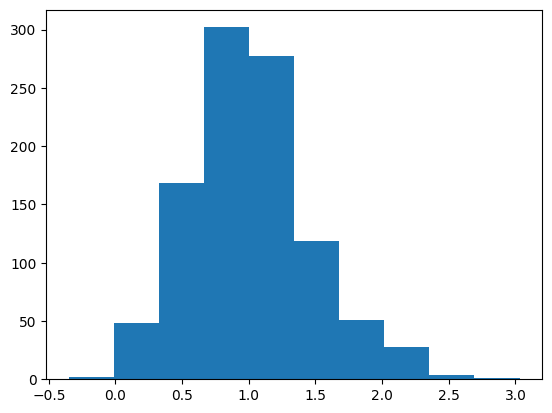

In [57]:
%matplotlib inline
plt.hist(resl_indx0[:,1] - resl_indx0[:,0])

## Gradient of rainfall intensity ##

In [129]:
def sdms_grdR_simu(j):

    iters = np.linspace(0.5, 8, 20)
    sdms_dt = np.zeros((1,4))
    
    for i in np.arange(len(iters)):
        
        tend = 100
        t_step = 0.01
        t_span = (0, tend)
        
        Rts = varying_extForce(tend+0.01, t_step, iters[i], 0.2)
        Rts1 = Rts[:-1]

        # High resilience : high ro, high B0, high lb
        u0= [0.1, 3]
        p = (0.1, 5, 4, 0.5, 5, 6, tend, t_step, Rts)
        start_time = timeit.default_timer()
        HP_deq = solve_ivp (eqn2_R, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
        print(timeit.default_timer() - start_time)
        
        
        # Low resilience :  low ro, low B0, low lb
        u0= [0.1, 3]
        p = (0.1, 1, 1.5, 0.5, 5, 2, tend, t_step, Rts)
        start_time = timeit.default_timer()
        LP_deq = solve_ivp (eqn2_R, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
        print(timeit.default_timer() - start_time)

        deq = np.vstack((LP_deq.y[1], HP_deq.y[1], Rts1, np.repeat(iters[i], len(Rts1))))
        sdms_dt = np.vstack((sdms_dt, np.transpose(deq)))
 
    sdms_dtt = np.delete(sdms_dt, 0, 0)
    id='{0:03}'.format(j)
    DF = pd.DataFrame(sdms_dtt)
    fnm = "/home/karthik/jupyter_dir/SDMS/simu_gradientF_vegrain_2/simu_" + id + ".csv"
    DF.to_csv(fnm)
    print(j)

In [130]:
from joblib import Parallel, delayed
Parallel(n_jobs=8)(delayed(sdms_grdR_simu)(j) for j in np.arange(50))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [131]:
def extremums(ts):
    
    from scipy.signal import argrelextrema

    fitt = ts

    maxs = np.array(argrelextrema(np.array(fitt), np.greater))
    mins = np.array(argrelextrema(np.array(fitt), np.less))
    pks = np.concatenate(([0], maxs.ravel(), mins.ravel(), [9999]))
    pks1 = np.sort(pks)
    
    cyc_pks1 = np.concatenate(([0], mins.ravel(), [9999]))
    
    return([pks1, cyc_pks1])

In [132]:
import os
fls1 = os.listdir('/home/karthik/jupyter_dir/SDMS/simu_gradientF_vegrain_2/')
fls = list(filter(lambda f:f.endswith('.csv'), fls1))
len(fls)

50

In [133]:
rrts_dt0 = np.zeros((1, 16))

for i in np.arange(len(fls)):
    
    df1 = pd.read_csv('/home/karthik/jupyter_dir/SDMS/simu_gradientF_vegrain_2/' + fls[i])
    df1.columns = ['no', 'LR', 'HR', 'Hrv', 'id']
    
    rrts = np.zeros([1,8])
    frc_idx = np.zeros([1,7])
    niter = np.unique(df1.id)

    for j in np.arange(len(niter)):

        df0 = df1[ df1['id'] == niter[j] ]

        rtts1 = resilience_calc_func( np.array(df0.LR[500:]))
        rtts2 = resilience_calc_func( np.array(df0.HR[500:]))

        rrts_low = np.hstack((['low'], rtts1))
        rrts_high = np.hstack((['high'], rtts2))

        rrts0 = np.vstack((rrts_low, rrts_high))
        rrts = np.vstack((rrts, rrts0))

        
        F_ts = np.array(df0.Hrv)
        cyc_pks = extremums(np.array(F_ts))[1]

        F_extrms = F_ts[extremums(F_ts)[0]]
        F_ampls = (np.ediff1d(F_extrms))[np.arange(0, len(np.ediff1d(F_extrms)), 2)]
        F_tmp = (np.ediff1d(cyc_pks))

        frc_idx0 = np.array([niter[j], np.mean(F_ts), np.std(F_ts), np.mean(F_ampls), np.std(F_ampls), 
                             np.mean(F_tmp), np.std(F_tmp)])
        frc_id = np.vstack((frc_idx0, frc_idx0))
        frc_idx = np.vstack((frc_idx, frc_id))
   
        
    rrts_dat = np.hstack((rrts, frc_idx))   
    rrts_dt = np.delete(rrts_dat, 0, 0)
    rrts_dt = np.hstack((rrts_dt, np.reshape(np.repeat(i, len(rrts_dt)), [40, 1]) ))
    
    rrts_dt0 = np.vstack((rrts_dt0,rrts_dt))
    print(j)


[390. 184. 230. 314. 222.  97. 408.  49. 144. 227.  nan  nan 191.  nan
 495. 444. 445. 551.  nan  nan 607. 541. 602.  nan  nan 537.]
[ 49.  97. 144. 184. 191. 222. 227. 230. 314. 390. 408. 444. 445. 495.
 537. 541. 551. 602. 607.]
[392.  nan 144. 201.  nan 237. 196. 117. 360.  67. 121.  nan 164.  nan
  nan 144. 156.  nan  nan 469. 461.  nan 450. 530.  nan  nan 562. 518.
  nan 551.  nan  nan 502.  nan]
[ 67. 117. 121. 144. 144. 156. 164. 196. 201. 237. 360. 392. 450. 461.
 469. 502. 518. 530. 551. 562.]
[207.  nan 207. 256.  nan 138. 159.  90.  nan 200. 732.  nan 521.  nan
 924. 555.  nan 470. 681. 342.  nan  nan  nan  nan]
[ 90. 138. 159. 200. 207. 207. 256. 342. 470. 521. 555. 681. 732. 924.]
[183.  nan  nan 209. 247. 184. 126. 135.  91.  nan 182.  17.  nan 527.
  nan  nan 944. 580. 279. 470. 669. 350.  nan 876. 737.  nan]
[ 17.  91. 126. 135. 182. 183. 184. 209. 247. 279. 350. 470. 527. 580.
 669. 737. 876. 944.]
[ 145.  237.   93.  116.  473.  118.  219.  512.  141.   nan  123.  182

[100. 111. 152.  nan 134. 164.  nan  nan  nan 148.  60.  59.  77. 127.
  66. 112.  74.  71. 466. 586. 356.  nan 508. 291.  nan  nan  nan 466.
 384. 325. 306. 422. 412. 460. 306. 550.]
[ 59.  60.  66.  71.  74.  77. 100. 111. 112. 127. 134. 148. 152. 164.
 291. 306. 306. 325. 356. 384. 412. 422. 460. 466. 466. 508. 550. 586.]
[101. 112. 151.  nan 134. 167.  nan  nan  nan 152.  58.  57.  72. 125.
  64. 114.  70.  68. 472. 593. 364.  nan 516. 300.  nan  nan  nan 477.
 387. 328. 309. 432. 415. 468. 310. 553.]
[ 57.  58.  64.  68.  70.  72. 101. 112. 114. 125. 134. 151. 152. 167.
 300. 309. 310. 328. 364. 387. 415. 432. 468. 472. 477. 516. 553. 593.]
[ nan  nan 671.  40. 502. 419. 192. 179. 481.  nan 180.  nan  nan  nan
  nan  nan  nan  nan 955. 384. 399. 826.  nan 611.  nan  nan]
[ 40. 179. 180. 192. 384. 399. 419. 481. 502. 611. 671. 826. 955.]
[ nan  nan 666.  41. 499. 436. 199. 189. 494.  nan 186.  nan  nan  nan
  nan  nan  nan  nan 972. 392. 408. 839.  nan 619.  nan  nan]
[ 41. 186. 18

[ 71.  nan  nan  97.  nan 142.  83.  98. 113.  83.  nan  nan  95.  66.
  82.  nan 103.  85.  67.  67. 189.  nan  nan 525.  nan 393. 342. 358.
 526. 431.  nan  nan 555. 349. 536.  nan 325. 267. 347. 263.]
[ 66.  67.  67.  71.  82.  83.  83.  85.  95.  97.  98. 103. 113. 142.
 189. 263. 267. 325. 342. 347. 349. 358. 393. 431. 525. 526. 536. 555.]
[ 68. 127.  nan  84.  nan  nan 124.  79.  93. 110.  79.  nan  nan  90.
  65.  79.  nan  nan  96.  81.  65.  65. 196. 175.  nan 518.  nan  nan
 389. 346. 363. 533. 434.  nan  nan 557. 353. 538.  nan  nan 329. 271.
 349. 266.]
[ 65.  65.  65.  68.  79.  79.  79.  81.  84.  90.  93.  96. 110. 124.
 127. 175. 196. 266. 271. 329. 346. 349. 353. 363. 389. 434. 518. 533.
 538. 557.]
[420.  nan  83.  58. 137.  nan 106.  nan  88. 193.  nan  nan  nan 101.
  nan  nan  nan 128.  nan  nan 401. 371. 418.  nan 342.  nan 495. 888.
  nan  nan  nan 580.  nan  nan  nan 386.]
[ 58.  83.  88. 101. 106. 128. 137. 193. 342. 371. 386. 401. 418. 420.
 495. 580. 888.]
[4

[470. 143.  63. 478. 175.  nan 244.  nan 197. 153.  nan 127.  76.  34.
  nan 193. 131.  nan 368.  nan  nan 640.  nan 558.  nan 386. 510.  nan
 260. 402. 357.  nan 403.  nan]
[ 34.  63.  76. 127. 131. 143. 153. 175. 193. 197. 244. 260. 357. 368.
 386. 402. 403. 470. 478. 510. 558. 640.]
[464. 135.  73.  47. 157.  nan 226.  nan 155. 148. 200. 113.  78.  63.
  nan 136.  nan 106.  nan 376. 395. 466. 668.  nan 574.  nan 373. 516.
 327. 270. 366. 353.  nan 362.  nan  nan]
[ 47.  63.  73.  78. 106. 113. 135. 136. 148. 155. 157. 200. 226. 270.
 327. 353. 362. 366. 373. 376. 395. 464. 466. 516. 574. 668.]
[ nan 118. 494.  nan  69.  nan 168. 427.  nan  86.  nan  nan  97.  83.
  92. 174.  68.  44.  66.  nan 195.  nan  nan  nan  nan 485.  nan  nan
  nan  nan 434.  nan  nan 460. 243. 366. 376. 339. 388. 288.  nan 317.]
[ 44.  66.  68.  69.  83.  86.  92.  97. 118. 168. 174. 195. 243. 288.
 317. 339. 366. 376. 388. 427. 434. 460. 485. 494.]
[ nan 104. 494. 107.  66.  nan 150. 433. 140.  81.  nan  na

1.4050331839825958
0.7528365089965519
4
1.4223031739820726
0.996737655979814
12
1.4881127680127975
0.8134363440040033
21
1.511448876990471
0.7479955489980057
29
1.649745361006353
0.7986926449812017
38
1.5754470620013308
0.4435296430019662
46
1.0874041950155515
0.5321207140223123
1.0294042289897334
0.7470318029809278
0.9750867779948749
0.8724407400004566
1.5456023169972468
1.1998893069976475
1.4644705719838385
1.081096398003865
1.3062407209945377
0.9112939370097592
1.3358641089871526
1.0454625020211097
1.517202193994308
1.0691660229931585
1.6602844489971176
1.1916994439961854
1.4827247039938811
1.0216643569874577
1.7193623959901743
1.1993396310135722
2.208902718994068
1.4880205919907894
1.9025427309970837
1.3502362100116443
1.773728793981718
1.2440424139786046
1.9569010580016766
1.2660039699985646
1.697381589008728
1.2143907829886302
1.9045344719779678
1.3623057199874893
2.3852590449969284
1.689731671998743
2.578315295977518
1.768854266993003
2.3054517499986105
1.5815414899843745
7
0.66

[ nan 128.  nan  nan 119.  nan  nan 174.  nan  87.  nan  nan  93. 129.
  75. 106.  nan 472.  nan  nan 742.  nan  nan 552.  nan 686.  nan  nan
 655. 589. 466.  nan]
[ 75.  87.  93. 106. 119. 128. 129. 174. 466. 472. 552. 589. 655. 686.
 742.]
1.8859457809885498
1.0297847600013483
2
1.4530516939994413
0.9571748879970983
14
1.1856700550124515
0.7928035579971038
22
1.1380646280013025
0.658183806022862
30
0.9436054909892846
0.5650665260036476
36
1.5980555179994553
0.9201696370146237
42
0.9731931599962991
0.8970870620105416
1.348825870984001
0.9213300829869695
1.2410370959842112
0.9849636500002816
1.2155808840179816
0.8518202610139269
1.507381205999991
1.0847417339973617
1.165550264006015
0.8542894299898762
1.605948366021039
1.183344687015051
2.050157196004875
1.381112053990364
1.4231473490071949
1.009686128993053
1.974490238004364
1.4558147150091827
1.6398448910040315
1.168456151994178
1.6850088100181893
1.2045060629898217
1.8720698690158315
1.3100489579956047
1.4646609949995764
1.009302889

[ 86.  69.  56. 117. 148. 127. 173.  nan  nan 133. 165. 146.  nan 156.
 111.  88.  88.  62. 197. 469. 490. 239. 280. 856. 293.  nan  nan 426.
 244. 556.  nan 311. 363. 401. 310.  nan]
[ 56.  62.  69.  86.  88.  88. 111. 117. 127. 133. 146. 148. 156. 165.
 173. 197. 239. 244. 280. 293. 310. 311. 363. 401. 426. 469. 490. 556.
 856.]
2.036317224992672
1.3883466830011457
1
1.2932839859859087
0.8896978859847877
15
2.007942133990582
1.1013443389965687
23
1.6900215359928552
1.091074493015185
34
1.5036739920033142
0.6790298240084667
44
0.7528096120222472
0.5728957660030574
0.9896674180054106
0.7789367320074234
1.2427374260150827
0.8453012510144617
1.116196425020462
0.8315308650198858
1.1744650769978762
0.8436820459901355
1.5470581880072132
1.2370351910067257
2.0260769090091344
1.4614663630200084
1.8912868979969062
1.5473285359912552
2.0127121989789885
1.5692600829934236
1.6481180010014214
1.3052480790065601
1.632130745012546
0.9778447550197598
2.1889115780068096
1.3295447519922163
2.0747028370

1.1846902999968734
0.6114810809958726
6
1.2182631129981019
0.7316123339987826
8
1.416828057001112
0.9433299739903305
16
1.673182546015596
1.073818063014187
26
1.516681642999174
0.8138967469858471
35
1.6010965799796395
0.939261619001627
43
0.7233263289963361
0.5875383350066841
1.2366585790005047
1.0123303910077084
1.0738066369958688
0.7602838749880902
1.1435267369961366
0.8501318680064287
1.6250774929940235
1.2289843879989348
1.3228125390014611
0.97982437297469
1.4085545950219966
1.019186699995771
1.4794831319886725
1.0772924199991394
1.5690860260219779
1.118972977012163
1.6602818009851035
1.1925814239948522
2.016224564984441
1.458480431989301
1.8660171100054868
1.3679661139904056
1.7133260460104793
1.2133111339935567
1.8540274639963172
1.3326548220065888
1.8816038700169884
1.3284221980138682
2.192911196994828
1.6150379470200278
2.1533859680057503
1.5207105469889939
2.023224108008435
1.5061109820089769
1.8122372009966057
1.3386777309933677
2.0615351450105663
1.4487021350068972
3
0.83430

[170. 237. 155. 181. 173. 322.  65. 130. 190. 130. 292.  42. 149. 121.
 120. 218. 222. 232. 348.  41. 133. 231. 326. 279. 333.  nan  nan 312.
 546. 572.  nan  nan 245. 305. 285. 267.  nan  nan  nan  nan 307.  nan]
[ 41.  42.  65. 120. 121. 130. 130. 133. 149. 155. 170. 173. 181. 190.
 218. 222. 231. 232. 237. 245. 267. 279. 285. 292. 305. 307. 312. 322.
 326. 333. 348. 546. 572.]
[164. 231. 151. 176. 169. 322.  63. 125. 186. 126. 292.  44. 145. 117.
 116. 213. 225. 230. 353.  39. 129. 226. 317. 269. 321.  nan  nan 305.
 535. 566.  nan  nan 242. 294. 275. 258.  nan  nan  nan  nan 300.  nan]
[ 39.  44.  63. 116. 117. 125. 126. 129. 145. 151. 164. 169. 176. 186.
 213. 225. 226. 230. 231. 242. 258. 269. 275. 292. 294. 300. 305. 317.
 321. 322. 353. 535. 566.]
19
[157. 174.  nan 215. 180.  77. 107. 511.  nan  nan 224.  nan 238. 336.
 574. 536.  nan 283. 220. 759.  nan  nan  nan  nan 607.  nan 414. 867.]
[ 77. 107. 157. 174. 180. 215. 220. 224. 238. 283. 336. 414. 511. 536.
 574. 607. 759. 8

[ nan 143. 114.  85.  66.  69.  nan  nan 128. 126.  95.  79.  76. 174.
  83.  77.  65. 147.  98.  79.  nan 775. 217. 322. 364. 380.  nan  nan
 384. 191. 286. 322. 372. 587. 406. 266. 482. 713. 417.  nan]
[ 65.  66.  69.  76.  77.  79.  79.  83.  85.  95.  98. 114. 126. 128.
 143. 147. 174. 191. 217. 266. 286. 322. 322. 364. 372. 380. 384. 406.
 417. 482. 587. 713. 775.]
[ nan 144. 112.  81.  64.  66.  nan  nan 125. 122.  92.  77.  74. 185.
  81.  75.  63. 153.  97.  76.  nan 781. 222. 326. 367. 383.  nan  nan
 388. 195. 291. 327. 376. 597. 411. 271. 484. 725. 422.  nan]
[ 63.  64.  66.  74.  75.  76.  77.  81.  81.  92.  97. 112. 122. 125.
 144. 153. 185. 195. 222. 271. 291. 326. 327. 367. 376. 383. 388. 411.
 422. 484. 597. 725. 781.]
[ 53.  85. 109.  79.  93. 185. 100.  71.  85.  88. 108.  nan 127.  70.
  63.  63.  nan  nan 321. 609. 329. 381. 361. 500. 323. 473. 321. 443.
 350.  nan 364. 446. 322. 436.  nan  nan]
[ 53.  63.  63.  70.  71.  79.  85.  85.  88.  93. 100. 108. 109. 127.

[143. 153.  95.  77.  nan  nan  91. 107.  nan  nan 212.  80.  57. 120.
  nan 284. 259. 498. 392. 547. 337.  nan  nan 458. 292.  nan  nan 588.
 438. 482. 654.  nan 340. 470.]
[ 57.  77.  80.  91.  95. 107. 120. 143. 153. 212. 259. 284. 292. 337.
 340. 392. 438. 458. 470. 482. 498. 547. 588. 654.]
[127. 147.  90.  75.  nan  nan  85.  99.  nan  nan 219.  76.  58. 118.
  nan 282. 277. 497. 404. 550. 340.  nan  nan 459. 297.  nan  nan 609.
 439. 481. 662.  nan 357. 500.]
[ 58.  75.  76.  85.  90.  99. 118. 127. 147. 219. 277. 282. 297. 340.
 357. 404. 439. 459. 481. 497. 500. 550. 609. 662.]
[ 136.  128.   nan  128.  110.  112.   nan  127.   59.  199.   nan   81.
   93.   nan  109.   nan  137.  411. 1048.   nan  682.  283.  307.   nan
  385.  474.  257.   nan  510.  215.   nan  362.   nan  710.]
[  59.   81.   93.  109.  110.  112.  127.  128.  128.  136.  137.  199.
  215.  257.  283.  307.  362.  385.  411.  474.  510.  682.  710. 1048.]
[ 127.  123.   nan  117.  103.  106.   nan  110.   

[ 93.  56.  55. 156. 211.  nan 106.  55.  nan 101.  57.  nan  94. 120.
  nan  nan 149. 175.  82. 106.  nan 122.  61. 448. 285. 454. 567. 545.
  nan 419. 373.  nan 207. 465.  nan 288. 203.  nan  nan 293. 243. 401.
 195.  nan 222.  nan]
[ 55.  55.  56.  57.  61.  82.  93.  94. 101. 106. 106. 120. 122. 149.
 156. 175. 195. 203. 207. 211. 222. 243. 285. 288. 293. 373. 401. 419.
 448. 454. 465. 545. 567.]
[ nan  nan  86.  75. 121.  90.  99.  74. 103.  84.  68.  93.  67.  nan
  91.  85.  nan  nan 111.  90.  78.  55.  45.  72.  nan  nan 312. 396.
 462. 443. 414. 311. 178. 265. 325. 178. 381.  nan 293. 355.  nan  nan
 469. 196. 266. 370. 366.  nan]
[ 45.  55.  67.  68.  72.  74.  75.  78.  84.  85.  86.  90.  90.  91.
  93.  99. 103. 111. 121. 178. 178. 196. 265. 266. 293. 311. 312. 325.
 355. 366. 370. 381. 396. 414. 443. 462. 469.]
[ nan  nan  85.  73. 126.  91. 100.  72. 102.  82.  65.  90.  65.  nan
  89.  84.  nan  nan 107.  89.  75.  53.  44.  69.  nan  nan 317. 400.
 470. 448. 417. 315.

[  nan   99.  155.  242.  102.   95.  122.  186.   98.  168.  180.   nan
   nan 1162.  614.  279.  412.  544.  603.  563.  362.  429.  545.   nan]
[  95.   98.   99.  102.  122.  155.  168.  180.  186.  242.  279.  362.
  412.  429.  544.  545.  563.  603.  614. 1162.]
[ nan 160. 121. 103. 120. 130. 164.  97.  71. 134. 109.  99. 159.  nan
 121. 160.  nan 248. 305. 780. 485. 416. 534. 357. 562. 486. 250. 393.
 472.  nan 381. 705.]
[ 71.  97.  99. 103. 109. 120. 121. 121. 130. 134. 159. 160. 160. 164.
 248. 250. 305. 357. 381. 393. 416. 472. 485. 486. 534. 562. 705. 780.]
[ nan 160. 120. 100. 120. 131. 167.  94.  69. 138. 107.  96. 166.  nan
 120. 166.  nan 249. 312. 785. 492. 423. 540. 363. 564. 494. 257. 397.
 484.  nan 387. 713.]
[ 69.  94.  96. 100. 107. 120. 120. 120. 131. 138. 160. 166. 166. 167.
 249. 257. 312. 363. 387. 397. 423. 484. 492. 494. 540. 564. 713. 785.]
[ 16.  nan 211.  nan 220.  nan 197. 157. 110. 130. 156. 790.  nan 913.
  nan 762.  nan 512. 968. 403. 461. 557.]
[ 1

[ nan  95.  nan 107.  nan 124. 601. 228. 140.  nan 158.  69.  67.  64.
  nan 158.  65.  nan  nan 354.  nan 385.  nan  nan  nan 369. 595.  nan
 593. 387. 371. 422.  nan 446. 557.  nan]
[ 64.  65.  67.  69.  95. 107. 124. 140. 158. 158. 228. 354. 369. 371.
 385. 387. 422. 446. 557. 593. 595. 601.]
[601.  nan 175. 144. 224. 745. 103.  92.  nan 128. 133.  86.  76. 201.
  nan 225. 171.  nan  nan 512. 356.  nan  nan 369. 524.  nan 376. 194.
 376. 388. 307.  nan 295.  nan]
[ 76.  86.  92. 103. 128. 133. 144. 171. 175. 194. 201. 224. 225. 295.
 307. 356. 369. 376. 376. 388. 512. 524. 601. 745.]
[598.  nan 179. 141. 235. 745.  98.  92.  nan 114. 120.  82.  74. 199.
  nan 225. 175.  nan  nan 527. 364.  nan  nan 373. 528.  nan 373. 201.
 379. 391. 309.  nan 284.  nan]
[ 74.  82.  92.  98. 114. 120. 141. 175. 179. 199. 201. 225. 235. 284.
 309. 364. 373. 373. 379. 391. 527. 528. 598. 745.]
[ nan  94. 233. 105.  60.  75.  nan 186.  54.  nan  nan 139. 250.  nan
  89. 135.  nan 130.  nan 479. 781. 56

[ nan 243. 250. 255. 179. 660. 175. 242.  nan 426.  nan 137.  nan 701.
 709. 358.  nan 661. 240.  nan  nan  nan  nan 544.]
[137. 175. 179. 240. 242. 243. 250. 255. 358. 426. 544. 660. 661. 701.
 709.]
[ nan  nan 210. 244. 199. 165. 647. 140. 216.  nan 428.  nan 108. 232.
  nan  nan 691. 730. 383.  nan  nan 308.  nan  nan  nan  nan 513.  nan]
[108. 140. 165. 199. 210. 216. 232. 244. 308. 383. 428. 513. 647. 691.
 730.]
[105.  nan 459. 108.  78. 130. 216. 160. 187. 162.  nan 243. 180. 100.
  68.  nan  nan  nan 425. 314. 441. 560. 557. 449. 410.  nan 669. 442.
 166. 474.]
[ 68.  78. 100. 105. 108. 130. 160. 162. 166. 180. 187. 216. 243. 314.
 410. 425. 441. 442. 449. 459. 474. 557. 560. 669.]
[ 88.  44.  48. 106.  84. 122. 209. 146. 167. 154.  nan 194. 216. 157.
  95.  64.  nan 368. 301. 445. 423. 321. 444. 576. 561. 452. 423.  nan
 305. 678. 431. 211. 444.  nan]
[ 44.  48.  64.  84.  88.  95. 106. 122. 146. 154. 157. 167. 194. 209.
 211. 216. 301. 305. 321. 368. 423. 423. 431. 444. 444. 

[835.  nan 134. 114. 109.  nan 195. 614. 191.  nan 126. 690. 159.  nan
 117. 508.  nan  nan 297. 309. 331.  nan  nan  nan 450.  nan  nan  nan
 456.  nan  nan  nan]
[109. 114. 117. 126. 134. 159. 191. 195. 297. 309. 331. 450. 456. 508.
 614. 690. 835.]
[835.  nan 136. 114. 109.  nan 208. 615. 204.  nan 127. 688. 164.  nan
 117. 506.  nan  nan 304. 315. 338.  nan  nan  nan 463.  nan  nan  nan
 463.  nan  nan  nan]
[109. 114. 117. 127. 136. 164. 204. 208. 304. 315. 338. 463. 463. 506.
 615. 688. 835.]
[  nan   nan 1070.   nan   nan  120.  150.  176.  112.  218.  197.   nan
   nan  136.   nan   nan   nan   nan   nan  373.  244.  575.  373.  568.
  561.   nan   nan   nan]
[ 112.  120.  136.  150.  176.  197.  218.  244.  373.  373.  561.  568.
  575. 1070.]
[  nan   nan 1065.   nan   nan  120.  156.   nan  169.  112.  234.  200.
   nan   nan  136.   nan   nan   nan   nan   nan  379.  249.   nan  571.
  378.  578.  557.   nan   nan   nan]
[ 112.  120.  136.  156.  169.  200.  234.  249.  378

[ 40.  51.  98. 113.  nan  nan  95.  53.  nan  90. 142.  81.  75.  84.
  81.  nan 189. 171.  95.  78.  88. 284. 402. 211. 305.  nan  nan 396.
 469.  nan 344. 158. 386. 310. 305. 390.  nan 652. 242. 477. 343.  nan]
[ 40.  51.  53.  75.  78.  81.  81.  84.  88.  90.  95.  95.  98. 113.
 142. 158. 171. 189. 211. 242. 284. 305. 305. 310. 343. 344. 386. 390.
 396. 402. 469. 477. 652.]
[ 42.  51.  92. 108.  nan  nan  90.  52.  nan  86. 122.  77.  72.  79.
  77.  nan 197. 170.  91.  75.  84. 286. 403. 215. 310.  nan  nan 399.
 470.  nan 348. 173. 389. 313. 308. 393.  nan 667. 249. 481. 347. 321.]
[ 42.  51.  52.  72.  75.  77.  77.  79.  84.  86.  90.  91.  92. 108.
 122. 170. 173. 197. 215. 249. 286. 308. 310. 313. 321. 347. 348. 389.
 393. 399. 403. 470. 481. 667.]
[128. 566.  94.  nan 142. 150. 100.  97.  nan  nan  nan 219. 129.  62.
  66.  80. 165.  nan  nan  nan 748.  nan 277. 200. 348. 421.  nan  nan
  nan 273. 498. 384. 314. 359.  nan  nan]
[ 62.  66.  80.  94.  97. 100. 128. 129. 142.

[ nan  nan 235.  97. 184. 171.  88.  nan 228. 164.  nan  nan 261. 144.
  69.  69.  47.  50.  71.  nan 151.  nan  nan  nan 320. 394. 342. 421.
  nan 245. 335.  nan  nan 437. 541. 259. 390. 344. 407. 349.  nan  nan]
[ 47.  50.  69.  69.  71.  88.  97. 144. 151. 164. 171. 184. 228. 235.
 245. 259. 261. 320. 335. 342. 344. 349. 390. 394. 407. 421. 437. 541.]
[201.  nan 104.  60. 248. 465.  87.  nan 171.  nan  96. 150.  85. 148.
  54. 147. 950.  nan 405. 499. 393. 756. 248.  nan 461.  nan 543. 430.
 232. 537. 204. 254.]
[ 54.  60.  85.  87.  96. 104. 147. 148. 150. 171. 201. 204. 232. 248.
 248. 254. 393. 405. 430. 461. 465. 499. 537. 543. 756. 950.]
[166. 550. 116.  90.  76. 197.  nan 132.  92. 159. 155.  nan  79. 135.
  93. 133.  74. 119.  nan  nan 178. 376. 491. 395.  nan 426. 271. 214.
 454.  nan 518. 417. 261. 510. 238. 275.]
[ 74.  76.  79.  90.  92.  93. 116. 119. 132. 133. 135. 155. 159. 166.
 178. 197. 214. 238. 261. 271. 275. 376. 395. 417. 426. 454. 491. 510.
 518. 550.]
[144.  6

[ nan 147. 153. 577.  nan 163.  nan  nan 117.  78.  58.  64.  95. 159.
 527.  87.  91.  94.  nan 140.  nan 889.  nan  nan  nan 210.  nan  nan
 361. 282. 413. 317. 404.  nan  nan 333. 277. 420.  nan 211.]
[ 58.  64.  78.  87.  91.  94.  95. 117. 140. 147. 153. 159. 163. 210.
 211. 277. 282. 317. 333. 361. 404. 413. 420. 527. 577. 889.]
[ nan 150. 157. 576.  nan 164.  nan  nan 109.  74.  57.  61.  92. 157.
 526.  83.  87.  91.  nan 138.  nan 897.  nan  nan  nan 214.  nan  nan
 361. 287. 416. 321. 409.  nan  nan 337. 282. 424.  nan 216.]
[ 57.  61.  74.  83.  87.  91.  92. 109. 138. 150. 157. 157. 164. 214.
 216. 282. 287. 321. 337. 361. 409. 416. 424. 526. 576. 897.]
[134.  nan 114.  nan 106.  89. 184.  nan 131. 153.  nan  99.  nan  nan
  92.  nan 130. 122. 130. 369.  nan 544.  nan 601. 442. 659.  nan 671.
 446.  nan 494.  nan  nan 592.  nan 261. 322.  nan]
[ 89.  92.  99. 106. 114. 122. 130. 130. 131. 134. 153. 184. 261. 322.
 369. 442. 446. 494. 544. 592. 601. 659. 671.]
[128.  nan 104

[ nan 128.  63.  52.  nan 151.  nan 139. 145.  97.  36.  82.  69. 148.
  nan  nan  nan 201.  nan 243. 452. 514.  nan 394.  nan 575. 549. 624.
 256. 431. 376. 434.  nan  nan  nan 829.]
[ 36.  52.  63.  69.  82.  97. 128. 139. 145. 148. 151. 201. 243. 256.
 376. 394. 431. 434. 452. 514. 549. 575. 624. 829.]
[105. 108. 110.  80.  96. 127. 130.  89. 153. 163. 147.  92. 106.  nan
 148.  nan 124.  58.  89. 192. 469. 427. 461. 422. 307. 247. 513. 285.
 201. 206. 408. 497.  nan 389.  nan 585. 455. 231.]
[ 58.  80.  89.  89.  92.  96. 105. 106. 108. 110. 124. 127. 130. 147.
 148. 153. 163. 192. 201. 206. 231. 247. 285. 307. 389. 408. 422. 427.
 455. 461. 469. 497. 513. 585.]
[ 98. 104. 107.  77.  92. 124. 126.  85. 153. 156. 141.  88. 102.  nan
 147.  nan 121.  57.  84. 198. 474. 434. 465. 427. 314. 253. 516. 292.
 206. 212. 412. 502.  nan 397.  nan 590. 458. 236.]
[ 57.  77.  84.  85.  88.  92.  98. 102. 104. 107. 121. 124. 126. 141.
 147. 153. 156. 198. 206. 212. 236. 253. 292. 314. 397. 412.

[  57.  201.   nan  440.  143.  170.   94.   78.   nan   86.   nan   nan
   nan  218.   nan  202.   89.  354.  648.   nan 1020.  255.  749.  258.
  554.   nan  523.   nan   nan   nan  317.   nan  541.   nan]
[  57.   78.   86.   89.   94.  143.  170.  201.  202.  218.  255.  258.
  317.  354.  440.  523.  541.  554.  648.  749. 1020.]
[132. 648. 106. 411. 178.  nan  88.  nan 129. 187. 404. 152.  95. 146.
  nan  nan 257.  nan  nan  nan  nan 415.  nan 470.  nan 700.  nan  nan
 205. 384. 222.  nan  nan 463.]
[ 88.  95. 106. 129. 132. 146. 152. 178. 187. 205. 222. 257. 384. 404.
 411. 415. 463. 470. 648. 700.]
[ nan 113. 641. 107. 415. 160. 135.  81.  nan 119. 172. 410. 124.  89.
 121.  nan  nan 221.  nan  nan  nan  nan  nan 420. 187. 461.  nan 700.
  nan  nan 233. 380. 246.  nan  nan 447.]
[ 81.  89. 107. 113. 119. 121. 124. 135. 160. 172. 187. 221. 233. 246.
 380. 410. 415. 420. 447. 461. 641. 700.]
[ 183.  193.   74.  209.  217.  136.  202.   nan  166.   nan  153.  594.
  530.  610.  97

[359.  82. 107. 449. 116. 168.  nan 128. 115. 221. 590. 149. 142. 136.
  93.  nan 117.  nan 328.  nan  nan 278. 436.  nan 288. 323.  nan  nan
 377. 346. 763. 739.  nan  nan]
[ 82.  93. 107. 115. 116. 117. 128. 136. 142. 149. 168. 221. 278. 288.
 323. 328. 346. 359. 377. 436. 449. 590. 739. 763.]
[117. 124. 181.  nan  96.  69. 109.  nan  84.  99.  78.  nan 105.  nan
  90.  54.  nan 123. 451. 362. 314.  nan 502. 353. 652.  nan 432. 202.
 456.  nan 625.  nan 439. 526.  nan 457.]
[ 54.  69.  78.  84.  90.  96.  99. 105. 109. 117. 123. 124. 181. 202.
 314. 353. 362. 432. 439. 451. 456. 457. 502. 526. 625. 652.]
[119. 125. 192.  nan  89.  67. 110.  nan  81.  97.  77.  nan 104.  nan
  88.  53.  nan 124. 458. 370. 323.  nan 501. 356. 660.  nan 436. 207.
 460.  nan 630.  nan 444. 528.  nan 463.]
[ 53.  67.  77.  81.  88.  89.  97. 104. 110. 119. 124. 125. 192. 207.
 323. 356. 370. 436. 444. 458. 460. 463. 501. 528. 630. 660.]
[629. 141. 119.  98.  67.  nan  nan  85.  84.  80.  nan 218.  nan 111

[166. 208.  94. 140. 113.  40. 271. 152.  79. 266. 123. 160. 163. 213.
  nan 590.  45. 145. 164. 127. 231. 325. 257. 360. 493.  nan  nan 609.
  nan  nan 256. 271. 285.  nan  nan  nan 244. 257. 273. 233.]
[ 40.  45.  79.  94. 113. 123. 127. 140. 145. 152. 160. 163. 164. 166.
 208. 213. 231. 233. 244. 256. 257. 257. 266. 271. 271. 273. 285. 325.
 360. 493. 590. 609.]
[ 66.  nan  75. 140.  99.  81.  69.  63.  64. 212.  85.  62.  nan 153.
 108.  nan 220. 107.  nan 254.  nan 530. 431. 233. 316. 322. 350. 442.
 545. 347. 485.  nan 659. 251.  nan 312. 418.  nan]
[ 62.  63.  64.  66.  69.  75.  81.  85.  99. 107. 108. 140. 153. 212.
 220. 233. 251. 254. 312. 316. 322. 347. 350. 418. 431. 442. 485. 530.
 545. 659.]
[ 64.  nan  78. 142.  94.  77.  66.  60.  62. 227.  81.  60.  nan  nan
 155. 102.  nan 225. 103.  nan 258.  nan 535. 441. 238. 319. 325. 353.
 443. 563. 351. 487.  nan  nan 665. 256.  nan 323. 423.  nan]
[ 60.  60.  62.  64.  66.  77.  78.  81.  94. 102. 103. 142. 155. 225.
 227. 238

[  40.  184.  122.  164.  107.  160.   93.  107.  105.  128.  298.   nan
   nan  128.  149.  590.  446.  507.  394.  499.  313.  622.  281.  361.
  317. 1040.   nan   nan  420.  284.]
[  40.   93.  105.  107.  107.  122.  128.  128.  149.  160.  164.  184.
  281.  284.  298.  313.  317.  361.  394.  420.  446.  499.  507.  590.
  622. 1040.]
[  43.  186.  117.  161.  102.  150.   94.  101.   99.  121.  318.   nan
   nan   nan  120.  139.  592.  460.  514.  407.  505.  318.  627.  287.
  366.  324. 1060.   nan   nan   nan  425.  291.]
[  43.   94.   99.  101.  102.  117.  120.  121.  139.  150.  161.  186.
  287.  291.  318.  318.  324.  366.  407.  425.  460.  505.  514.  592.
  627. 1060.]
[ nan  96. 155. 188.  41.  nan 121.  73.  nan 117. 216. 138. 121.  nan
 143. 127.  nan 705. 801. 745. 581.  nan 535. 407.  nan 533. 528. 304.
 356.  nan 444. 237.]
[ 41.  73.  96. 117. 121. 121. 127. 138. 143. 155. 188. 216. 237. 304.
 356. 407. 444. 528. 533. 535. 581. 705. 745. 801.]
[ nan  91. 15

[ nan  nan 149. 174. 118. 390. 194.  69.  66. 369. 131.  nan 110.  65.
  nan 261.  nan  nan 387. 454.  nan  nan 906. 365.  nan  nan 244.  nan
 503. 445.  nan  nan]
[ 65.  66.  69. 110. 118. 131. 149. 174. 194. 244. 261. 365. 369. 387.
 390. 445. 454. 503. 906.]
[ nan  nan 153. 190. 121. 389. 207.  68.  64. 371. 135.  nan 103.  63.
  nan  nan 277.  nan  nan 392. 469.  nan  nan 917. 369.  nan  nan 250.
  nan 502. 448.  nan  nan  nan]
[ 63.  64.  68. 103. 121. 135. 153. 190. 207. 250. 277. 369. 371. 389.
 392. 448. 469. 502. 917.]
[ nan  nan 120. 145. 167.  80.  77. 116.  nan 154. 343.  44.  nan 129.
  50.  nan  nan 479. 583. 272. 402. 324. 573.  nan 599. 761. 599.  nan
 569. 480.]
[ 44.  50.  77.  80. 116. 120. 129. 145. 154. 167. 272. 324. 343. 402.
 479. 480. 569. 573. 583. 599. 599. 761.]
[ nan  nan 121. 153. 172.  78.  76. 120.  nan 159. 361.  46.  nan 117.
  49.  nan  nan 484. 592. 278. 405. 328. 580.  nan 606. 777. 600.  nan
 564. 482.]
[ 46.  49.  76.  78. 117. 120. 121. 153. 159.

[ 65.  86.  nan  nan 103.  55.  71.  nan 178.  nan  nan  74.  60.  nan
  nan 164. 136.  51.  49. 268. 579.  nan  nan 523. 348. 567.  nan 340.
  nan  nan 418. 416.  nan  nan 208. 311. 615. 443.]
[ 49.  51.  55.  60.  65.  71.  74.  86. 103. 136. 164. 178. 208. 268.
 311. 340. 348. 416. 418. 443. 523. 567. 579. 615.]
[ 63.  86.  nan  nan  98.  53.  68.  nan 174.  nan 158.  71.  58.  nan
  nan 166. 136.  51.  49. 272. 580.  nan  nan 525. 350. 574.  nan 339.
  nan 170. 421. 418.  nan  nan 211. 316. 617. 445.]
[ 49.  51.  53.  58.  63.  68.  71.  86.  98. 136. 158. 166. 170. 174.
 211. 272. 316. 339. 350. 418. 421. 445. 525. 574. 580. 617.]
[ nan  nan  86.  nan  nan 198. 121.  83. 593. 133. 262.  99. 110. 113.
 446.  nan 117.  nan  nan 568.  nan  nan 400. 254.  nan  nan 872. 476.
 569. 268.  nan  nan  nan  nan]
[ 83.  86.  99. 110. 113. 117. 121. 133. 198. 254. 262. 268. 400. 446.
 476. 568. 569. 593. 872.]
[ nan  nan  82.  nan  nan 211. 121.  81. 594.  nan 125. 280.  98. 108.
 113. 444.  n

[471. 126.  78. 181. 119.  nan  nan 176.  nan 188. 177. 143.  88.  nan
 141.  nan 598. 377. 312. 340.  nan  nan 441.  nan 650. 768. 687. 580.
  nan 653.]
[ 78.  88. 119. 126. 141. 143. 176. 177. 181. 188. 312. 340. 377. 441.
 471. 580. 598. 650. 653. 687. 768.]
[ nan 158. 153.  nan  93.  nan 122.  57.  nan 185. 137.  nan 100.  nan
 148.  nan 364. 514.  nan 563.  nan 513. 843.  nan 524. 254.  nan 432.
  nan 566.]
[ 57.  93. 100. 122. 137. 148. 153. 158. 185. 254. 364. 432. 513. 514.
 524. 563. 566. 843.]
[ nan 154. 152.  nan  88.  nan 109.  58.  nan 187. 128.  nan  95.  nan
  nan 124.  nan  nan 373. 524.  nan 565.  nan 510. 845.  nan 537. 260.
  nan 435.  nan  nan 552.  nan]
[ 58.  88.  95. 109. 124. 128. 152. 154. 187. 260. 373. 435. 510. 524.
 537. 552. 565. 845.]
[ 30.  nan  72.  nan 119.  nan 206. 129.  nan  nan 173. 119. 455.  64.
  62.  nan  72.  55. 302.  nan 485.  nan 299.  nan 376. 477.  nan  nan
 448.  nan  nan 313. 383.  nan 430. 387.]
[ 30.  55.  62.  64.  72.  72. 119. 119.

[ 98. 155.  nan  91. 136.  41.  nan 259. 181.  73.  54.  nan 260. 843.
 596.  nan 495. 386. 767.  nan 474. 367. 301. 401.  nan  nan]
[ 41.  54.  73.  91.  98. 136. 155. 181. 259. 260. 301. 367. 386. 401.
 474. 495. 596. 767. 843.]
[100. 149.  nan  nan  82.  nan 111.  63.  nan 215. 147.  83.  67. 129.
 251. 852. 597.  nan  nan 466.  nan 357. 765.  nan 454. 353. 296. 386.
 207.  nan]
[ 63.  67.  82.  83. 100. 111. 129. 147. 149. 207. 215. 251. 296. 353.
 357. 386. 454. 466. 597. 765. 852.]
[369. 180.  nan  54.  nan 222. 108.  nan 119.  99. 148.  66.  nan 135.
  nan 265.  nan 708.  nan 551. 424.  nan 392. 358. 778. 580.  nan  nan]
[ 54.  66.  99. 108. 119. 135. 148. 180. 222. 265. 358. 369. 392. 424.
 551. 580. 708. 778.]
[370. 150.  nan  nan  90.  nan  nan  nan 189. 104.  nan 111.  96. 140.
  69.  nan 101.  nan 285.  nan  nan 722.  nan  nan  nan 543. 426.  nan
 390. 360. 790. 576.  nan  nan]
[ 69.  90.  96. 101. 104. 111. 140. 150. 189. 285. 360. 370. 390. 426.
 543. 576. 722. 790.]
[134

[141. 181.  58.  83.  nan 121. 133.  nan 221. 112. 158.  77.  65.  nan
  nan 119.  67. 457. 438. 507. 237.  nan 471. 520.  nan 444. 863. 354.
 423. 439.  nan  nan 469. 487.]
[ 58.  65.  67.  77.  83. 112. 119. 121. 133. 141. 158. 181. 221. 237.
 354. 423. 438. 439. 444. 457. 469. 471. 487. 507. 520. 863.]
[ 122.  204.  181. 1069.  291.   nan   nan  138.  100.  110.   98.   98.
   nan  112. 1260.  489.   nan   nan  353.   nan   nan  346.  346.  264.
  334.  338.   nan  461.]
[  98.   98.  100.  110.  112.  122.  138.  181.  204.  264.  291.  334.
  338.  346.  346.  353.  461.  489. 1069. 1260.]
[ 127.  208.  196. 1067.  298.   nan   nan  142.   99.  110.   97.   96.
   nan  110. 1269.  495.   nan   nan  362.   nan   nan  354.  351.  270.
  340.  343.   nan  466.]
[  96.   97.   99.  110.  110.  127.  142.  196.  208.  270.  298.  340.
  343.  351.  354.  362.  466.  495. 1067. 1269.]
[ nan  74.  nan  nan  nan 183.  90. 130.  nan 142. 104. 109.  77. 149.
 149.  96.  68.  69.  nan 558.  

[ nan  nan 103. 486.  96.  72.  41. 143. 185.  90. 172. 102. 113. 128.
  nan  nan 158.  nan  nan  nan  nan 236. 604. 445. 269. 476. 432. 347.
 388. 540. 525.  nan  nan 620.]
[ 41.  72.  90.  96. 102. 103. 113. 128. 143. 158. 172. 185. 236. 269.
 347. 388. 432. 445. 476. 486. 525. 540. 604. 620.]
[ nan  nan  96. 481.  90.  69.  42. 137. 186.  86. 176.  97. 110. 125.
  nan  nan  nan 141.  nan  nan  nan  nan 241. 601. 448. 274. 488. 435.
 358. 393. 547. 532.  nan  nan  nan 613.]
[ 42.  69.  86.  90.  96.  97. 110. 125. 137. 141. 176. 186. 241. 274.
 358. 393. 435. 448. 481. 488. 532. 547. 601. 613.]
[ nan  69.  75. 108.  nan 100.  nan 159. 146. 114. 105.  91.  98.  81.
  20. 108.  nan 100.  68.  86.  nan 423. 251. 236.  nan 484.  nan 597.
 485. 468. 239. 303. 245. 510. 539. 306.  nan 452. 319. 249.]
[ 20.  68.  69.  75.  81.  86.  91.  98. 100. 100. 105. 108. 108. 114.
 146. 159. 236. 239. 245. 249. 251. 303. 306. 319. 423. 452. 468. 484.
 485. 510. 539. 597.]
[ nan  65.  72. 103.  nan  9

[ 57. 213. 511.  89.  nan 111.  47.  28.  88.  nan  nan  nan 212.  nan
  95.  54. 274. 658. 896. 525.  nan 460. 331. 518. 654.  nan  nan  nan
 327.  nan 629. 425.]
[ 28.  47.  54.  57.  88.  89.  95. 111. 212. 213. 274. 327. 331. 425.
 460. 511. 518. 525. 629. 654. 658. 896.]
[ 63. 217.  nan 132.  86.  nan  94.  53.  41.  86. 204.  nan  nan 200.
 205.  nan  86.  59. 279. 678.  nan 527. 529.  nan 446. 322. 512.  nan
  nan  nan  nan 269. 343.  nan 620. 425.]
[ 41.  53.  59.  63.  86.  86.  86.  94. 132. 200. 204. 205. 217. 269.
 279. 322. 343. 425. 446. 512. 527. 529. 620. 678.]
[ 98. 108.  94.  nan  82.  nan  nan 155. 106.  70.  nan  nan 169.  nan
 125.  83. 121. 139. 126.  56.  63.  96. 115. 448. 524. 450.  nan 479.
  nan  nan 338. 231. 450.  nan  nan 214.  nan 265. 338. 202. 243. 467.
 327. 308. 225.  nan]
[ 56.  63.  70.  82.  83.  94.  96.  98. 106. 108. 115. 121. 125. 126.
 139. 155. 169. 202. 214. 225. 231. 243. 265. 308. 327. 338. 338. 448.
 450. 450. 467. 479. 524.]
[ nan  84. 1

[ nan  83.  57. 153. 111.  72.  nan 109.  77.  58. 177.  nan  nan 249.
  nan  79. 453.  nan 402. 504. 654. 223. 513.  nan 332. 465. 579. 404.
  nan  nan 356.  nan 622. 836.]
[ 57.  58.  72.  77.  79.  83. 109. 111. 153. 177. 223. 249. 332. 356.
 402. 404. 453. 465. 504. 513. 579. 622. 654. 836.]
[ 26.  53.  nan  nan 184. 136.  62.  67. 125.  84. 106.  nan  nan  97.
  62.  nan 161.  91.  76.  86. 354. 352.  nan  nan 404. 491. 404. 365.
 485. 294. 313.  nan  nan 562. 406.  nan 577. 275. 449.  nan]
[ 26.  53.  62.  62.  67.  76.  84.  86.  91.  97. 106. 125. 136. 161.
 184. 275. 294. 313. 352. 354. 365. 404. 404. 406. 449. 485. 491. 562.
 577.]
[ 30.  51.  nan  nan 189. 140.  60.  65. 123.  81. 102.  nan  nan  93.
  61.  nan 166.  88.  72.  83. 354. 353.  nan  nan 412. 500. 407. 368.
 492. 299. 317.  nan  nan 565. 409.  nan 586. 281. 451.  nan]
[ 30.  51.  60.  61.  65.  72.  81.  83.  88.  93. 102. 123. 140. 166.
 189. 281. 299. 317. 353. 354. 368. 407. 409. 412. 451. 492. 500. 565.
 586

[131.  nan  90.  75.  68.  88. 492.  57.  nan 187.  nan 119. 103. 416.
  76.  nan  nan 114.  nan 105. 315.  nan 405. 280. 389.  nan  nan 517.
  nan 382.  nan 473.  nan  nan 486.  nan  nan 332.  nan 447.]
[ 57.  68.  75.  76.  88.  90. 103. 105. 114. 119. 131. 187. 280. 315.
 332. 382. 389. 405. 416. 447. 473. 486. 492. 517.]
[133.  nan  85.  71.  65.  85. 492.  55.  nan  nan 197.  nan 109. 101.
 415.  73.  nan  nan 110.  nan  96. 322.  nan 408. 284. 391.  nan  nan
 518.  nan  nan 397.  nan 471.  nan  nan 489.  nan  nan 337.  nan 447.]
[ 55.  65.  71.  73.  85.  85.  96. 101. 109. 110. 133. 197. 284. 322.
 337. 391. 397. 408. 415. 447. 471. 489. 492. 518.]
[110. 100.  nan 110.  81.  76.  nan 115.  nan 197.  nan 102.  86.  67.
  73. 114.  nan  91.  89.  72. 196. 504.  nan 405. 370. 394.  nan 447.
  nan 614.  nan 482. 259. 477. 393. 473.  nan 545. 231.  nan]
[ 67.  72.  73.  76.  81.  86.  89.  91. 100. 102. 110. 110. 114. 115.
 196. 197. 231. 259. 370. 393. 394. 405. 447. 473. 477. 482. 

[147.  nan 191.  nan 140.  nan 216. 196. 219. 144.  nan 101.  58.  nan
 166.  nan 105.  68.  72. 184.  nan 277.  nan 503.  nan 637.  nan  nan
 285.  nan 520. 325.  nan 230.  nan 418. 712.  nan]
[ 58.  68.  72. 101. 105. 140. 144. 147. 166. 184. 191. 196. 216. 219.
 230. 277. 285. 325. 418. 503. 520. 637. 712.]
[ 34.  60. 169. 138. 337. 136.  nan  82. 109.  85.  nan  99.  nan 100.
  nan  94.  nan  99. 280. 370. 348. 598. 780. 518.  nan 393. 199. 487.
  nan 413.  nan 465.  nan 524.  nan  nan]
[ 34.  60.  82.  85.  94.  99.  99. 100. 109. 136. 138. 169. 199. 280.
 337. 348. 370. 393. 413. 465. 487. 518. 524. 598. 780.]
[130. 183. 106. 275. 192. 201. 211. 175.  58. 251. 244. 175. 244. 228.
 210. 239. 210. 245. 551. 499. 894. 540.  nan  nan 347. 238.  nan  nan
 176.  nan  nan  nan  nan  nan]
[ 58. 106. 130. 175. 175. 176. 183. 192. 201. 210. 210. 211. 228. 238.
 239. 244. 244. 245. 251. 275. 347. 499. 540. 551. 894.]
[ nan 137.  nan 184. 105.  nan 143.  89.  83. 130.  74. 145. 152.  nan
  n

[ 57.  62.  52.  55.  nan 106.  nan 131.  nan  nan 290. 104.  93. 131.
  62.  64.  nan  68.  50. 236. 344. 417. 413.  nan 403.  nan 399.  nan
  nan 547. 384. 367. 484. 383. 358.  nan 438. 421.]
[ 50.  52.  55.  57.  62.  62.  64.  68.  93. 104. 106. 131. 131. 236.
 290. 344. 358. 367. 383. 384. 399. 403. 413. 417. 421. 438. 484. 547.]
[ nan 105.  88. 109. 156.  76. 104. 104. 146.  78. 143.  nan 210.  89.
 177.  97.  76.  nan 270. 520. 659. 377. 500. 796. 261. 335. 450. 424.
  nan 260. 485. 313. 315. 382.]
[ 76.  76.  78.  88.  89.  97. 104. 104. 105. 109. 143. 146. 156. 177.
 210. 260. 261. 270. 313. 315. 335. 377. 382. 424. 450. 485. 500. 520.
 659. 796.]
[ nan 102.  85. 110. 164.  73. 105. 102.  nan 140.  75. 141.  nan 230.
  86. 183.  94.  72.  nan 276. 524. 666. 391. 503. 804. 267.  nan 335.
 453. 430.  nan 254. 490. 322. 320. 385.]
[ 72.  73.  75.  85.  86.  94. 102. 102. 105. 110. 140. 141. 164. 183.
 230. 254. 267. 276. 320. 322. 335. 385. 391. 430. 453. 490. 503. 524.
 666. 804

[197. 163.  78.  78.  nan 121. 112.  68.  88. 100.  nan 152. 108. 124.
  nan 315. 753. 397. 401. 305.  nan 304. 641. 498. 246. 918.  nan 429.
 266. 238.  nan 707.]
[ 68.  78.  78.  88. 100. 108. 112. 121. 124. 152. 163. 197. 238. 246.
 266. 304. 305. 315. 397. 401. 429. 498. 641. 707. 753. 918.]
[206. 166.  75.  75.  nan 118. 111.  66.  84.  98.  nan 156. 104. 121.
  nan  nan 331. 761. 404. 404. 308.  nan 309. 648. 501. 250. 923.  nan
 437. 271. 243.  nan  nan 724.]
[ 66.  75.  75.  84.  98. 104. 111. 118. 121. 156. 166. 206. 243. 250.
 271. 308. 309. 331. 404. 404. 437. 501. 648. 724. 761. 923.]
[1016.  118.   nan  293.   nan  359.  879.   nan  144.  106.  192.   nan
  813.   nan  827.   nan   nan   nan   nan  509.  528.  245.]
[ 106.  118.  144.  192.  245.  293.  359.  509.  528.  813.  827.  879.
 1016.]
[1016.  119.   nan  300.   nan  378.  879.   nan  145.  105.  207. 1017.
  817.   nan  836.   nan   nan   nan   nan  516.  535.  250.]
[ 105.  119.  145.  207.  250.  300.  378.  5

[ 331.  130.  221.  222.  213.  103.   77.   nan   nan   nan   87.  463.
   nan  230.   95.  101.   nan  279. 1046.  633.  297.  389.  362.   nan
   nan   nan   nan   nan   nan  288.  538.  588.]
[  77.   87.   95.  101.  103.  130.  213.  221.  222.  230.  279.  288.
  297.  331.  362.  389.  463.  538.  588.  633. 1046.]
[ 334.  121.  226.  233.  212.   97.   74.   nan   nan   nan   82.  464.
   nan  218.   91.   97.   nan  285. 1058.  652.  307.  394.  365.   nan
   nan   nan   nan   nan   nan  280.  542.  593.]
[  74.   82.   91.   97.   97.  121.  212.  218.  226.  233.  280.  285.
  307.  334.  365.  394.  464.  542.  593.  652. 1058.]
[116. 282. 118. 191.  nan 112. 128. 141.  87. 131.  87.  56.  nan 228.
 128.  nan 483. 642. 352. 447.  nan 460. 236. 879. 502. 156. 326. 505.
  nan 319.  nan  nan]
[ 56.  87.  87. 112. 116. 118. 128. 128. 131. 141. 156. 191. 228. 236.
 282. 319. 326. 352. 447. 460. 483. 502. 505. 642. 879.]
[117. 301. 113. 190.  nan 105. 119. 141.  83. 110.  82.  5

[834.  nan  nan 261. 283.  nan 140.  76.  nan 122.  nan 125.  nan 139.
  nan 179.  nan  nan  nan 351. 603.  nan 638. 690.  nan 496.  nan 599.
  nan 603.  nan  nan]
[ 76. 122. 125. 139. 140. 179. 261. 283. 351. 496. 599. 603. 603. 638.
 690. 834.]
[827.  nan  nan 276. 310.  nan 145.  78.  nan 122.  nan 122.  nan 133.
  nan 194.  nan  nan  nan 352. 621.  nan 644. 691.  nan 501.  nan 601.
  nan 602.  nan  nan]
[ 78. 122. 122. 133. 145. 194. 276. 310. 352. 501. 601. 602. 621. 644.
 691. 827.]
19
[434.  49. 185. 187.  89. 144.  nan 411. 248. 279. 141.  nan 156.  nan
 513. 543. 565. 209. 559.  nan 906. 521. 380. 278.  nan 668.]
[ 49.  89. 141. 144. 156. 185. 187. 209. 248. 278. 279. 380. 411. 434.
 513. 521. 543. 559. 565. 668. 906.]
[413.  71. 172.  nan 149.  99. 135. 289. 443. 223.  nan 221. 124.  nan
 140.  nan 509. 549.  nan 519. 265. 553. 337. 943. 526.  nan 393. 297.
  nan 654.]
[ 71.  99. 124. 135. 140. 149. 172. 221. 223. 265. 289. 297. 337. 393.
 413. 443. 509. 519. 526. 549. 553. 6

[ 31.  nan  nan  nan 159. 176.  87.  63.  62.  nan  nan  86. 132.  nan
 167. 100. 611.  nan  nan  nan 637. 474. 299. 416. 350.  nan  nan 581.
 669.  nan 529.  nan]
[ 31.  62.  63.  86.  87. 100. 132. 159. 167. 176. 299. 350. 416. 474.
 529. 581. 611. 637. 669.]
[ 75. 166.  80. 193. 103. 227. 103. 141.  nan 194. 137. 137. 102.  38.
  33. 172. 243.  87. 154. 211. 209. 336. 192. 292. 192. 303. 215. 566.
 281.  nan  nan  nan 288. 300. 323. 300.  nan  nan 376. 279. 374. 596.
  nan  nan]
[ 33.  38.  75.  80.  87. 102. 103. 103. 137. 137. 141. 154. 166. 172.
 192. 192. 193. 194. 209. 211. 215. 227. 243. 279. 281. 288. 292. 300.
 300. 303. 323. 336. 374. 376. 566. 596.]
[ 79. 159.  82. 187. 103. 220.  98. 136.  nan 193. 131. 133. 102.  43.
  37. 177. 237.  91. 150. 207. 202. 326. 193. 278. 192. 291. 212. 549.
 268.  nan  nan  nan 275. 288. 311. 295.  nan  nan 363. 275. 369. 584.
  nan  nan]
[ 37.  43.  79.  82.  91.  98. 102. 103. 131. 133. 136. 150. 159. 177.
 187. 192. 193. 193. 202. 207. 21

[195.  89.  nan 100.  nan 134.  65.  54.  80.  nan 154. 162. 124. 126.
  82.  72.  66.  64. 433. 326. 416.  nan 380.  nan 582. 221. 444. 245.
  nan 288. 394. 541. 357. 260. 309. 312.  nan 434.]
[ 54.  64.  65.  66.  72.  80.  82.  89. 100. 124. 126. 134. 154. 162.
 195. 221. 245. 260. 288. 309. 312. 326. 357. 380. 394. 416. 433. 434.
 444. 541. 582.]
[ 87. 113. 163. 138. 109.  57.  73.  88.  nan 133.  nan 228. 119. 141.
  nan 293. 623. 283. 632. 612. 462. 393. 647.  nan 605.  nan 386. 394.
 439.  nan]
[ 57.  73.  87.  88. 109. 113. 119. 133. 138. 141. 163. 228. 283. 293.
 386. 393. 394. 439. 462. 605. 612. 623. 632. 647.]
[ 83. 109. 161. 135. 105.  57.  71.  85.  nan 126.  nan 244. 114. 138.
  nan 298. 629. 291. 641. 618. 464. 397. 652.  nan 608.  nan 405. 401.
 447.  nan]
[ 57.  71.  83.  85. 105. 109. 114. 126. 135. 138. 161. 244. 291. 298.
 397. 401. 405. 447. 464. 608. 618. 629. 641. 652.]
[164. 102. 142. 103. 464.  nan  nan  97.  nan  nan  95.  90.  nan  nan
  nan 202.  84. 233. 4

[  nan  212.  137.  171.  140.   nan  120.  283.  103.   nan  166.  288.
  113.   nan 1002.  565. 1080.  396.   nan  419.  357.  338.   nan  469.
  299.  350.]
[ 103.  113.  120.  137.  140.  166.  171.  212.  283.  288.  299.  338.
  350.  357.  396.  419.  469.  565. 1002. 1080.]
[  nan  190.  131.  159.  669.  133.  130.  105.   nan  208.  103.   nan
   nan  130.  219.  106.   nan 1011.  567.   nan   nan  404.  215.  408.
   nan  345.  338.   nan   nan  442.  342.  347.]
[ 103.  105.  106.  130.  130.  131.  133.  159.  190.  208.  215.  219.
  338.  342.  345.  347.  404.  408.  442.  567.  669. 1011.]
[ nan  74.  nan  nan  nan 145. 204.  nan  nan  nan  90.  nan  91. 134.
  99.  64.  68. 185. 426.  nan 493.  nan  nan  nan 473. 597.  nan  nan
  nan 455.  nan 395. 177. 354. 409. 504.  nan  nan]
[ 64.  68.  74.  90.  91.  99. 134. 145. 177. 185. 204. 354. 395. 409.
 426. 455. 473. 493. 504. 597.]
[ 75.  68. 201.  nan  nan 132. 179.  nan  nan 169.  83. 104.  84. 108.
  91.  70.  73. 18

[ nan 102. 184.  84.  82.  86.  nan 159.  98. 115.  nan  nan 120. 401.
  nan 605. 598. 415. 434. 538.  nan 764. 433. 572.  nan  nan 596.  nan]
[ 82.  84.  86.  98. 102. 115. 120. 159. 184. 401. 415. 433. 434. 538.
 572. 596. 598. 605. 764.]
[  77.   77.  126.   52.   64.   nan   nan  165.  126.  166.   nan  104.
   nan   90.   nan  469.  126.  217.  658.  569.  376.  365.   nan   nan
  277.  611. 1054.   nan  400.   nan  439.   nan  906.   nan]
[  52.   64.   77.   77.   90.  104.  126.  126.  126.  165.  166.  217.
  277.  365.  376.  400.  439.  469.  569.  611.  658.  906. 1054.]
[  74.   74.  120.   51.   62.   nan   nan  172.  123.  177.   nan   99.
   nan   87.   nan   nan  224.  129.  221.  660.  572.  378.  367.   nan
   nan  282.  615. 1066.   nan  402.   nan  442.   nan   nan  662.   nan]
[  51.   62.   74.   74.   87.   99.  120.  123.  129.  172.  177.  221.
  224.  282.  367.  378.  402.  442.  572.  615.  660.  662. 1066.]
[ 89.  52.  nan  nan 115. 119.  82. 100.  58.  64

[ 548.   nan  117.   80.   87.  195.   99.   nan   nan  144.   nan  206.
   54.  333.   nan   nan  343.  476.  432.  427.  480.   nan   nan  731.
   nan  827.  480. 1076.]
[  54.   80.   87.   99.  117.  144.  195.  206.  333.  343.  427.  432.
  476.  480.  480.  548.  731.  827. 1076.]
[ nan  91.  nan  nan 108.  nan  nan  nan 129.  nan  nan 164.  89.  97.
  83. 111. 134. 109.  69.  53.  42.  nan 611.  nan  nan 482.  nan  nan
  nan 597.  nan  nan 222. 399. 245. 395. 272. 381. 443. 402. 395.  nan]
[ 42.  53.  69.  83.  89.  91.  97. 108. 109. 111. 129. 134. 164. 222.
 245. 272. 381. 395. 395. 399. 402. 443. 482. 597. 611.]
[ nan  84.  nan  nan 104.  nan  nan  nan 131.  nan  nan 161.  85.  93.
  79. 107. 134. 107.  67.  51.  43.  nan 610.  nan  nan 486.  nan  nan
  nan 602.  nan  nan 225. 403. 251. 398. 278. 389. 450. 405. 396.  nan]
[ 43.  51.  67.  79.  84.  85.  93. 104. 107. 107. 131. 134. 161. 225.
 251. 278. 389. 396. 398. 403. 405. 450. 486. 602. 610.]
[165. 127.  89.  55. 374.  

[ nan 112.  nan 113.  nan  nan  70. 167. 143.  nan  78. 166. 131.  72.
  97. 118. 145.  nan  nan  nan 259.  nan 447.  nan  nan 691. 599. 421.
  nan 604. 257. 213. 458. 221. 344. 518.  nan  nan]
[ 70.  72.  78.  97. 112. 113. 118. 131. 143. 145. 166. 167. 213. 221.
 257. 259. 344. 421. 447. 458. 518. 599. 604. 691.]
[115.  nan 221. 355.  nan 152. 111.  nan  nan 159. 439. 153. 143.  69.
  80.  nan 107. 520.  nan  nan  nan  nan 545. 283.  nan  nan 339. 928.
 491. 167. 535. 261.  nan 521.]
[ 69.  80. 107. 111. 115. 143. 152. 153. 159. 167. 221. 261. 283. 339.
 355. 439. 491. 520. 521. 535. 545. 928.]
[102.  nan 231. 357.  nan 149. 103.  nan  nan 145. 474. 136. 115.  67.
  77.  nan 100. 519.  nan  nan  nan  nan 549. 288.  nan  nan 342. 971.
 492. 195. 531. 266.  nan 524.]
[ 67.  77. 100. 102. 103. 115. 136. 145. 149. 195. 231. 266. 288. 342.
 357. 474. 492. 519. 524. 531. 549. 971.]
[ nan  nan  nan  98.  98.  95. 124.  63. 117. 101. 126. 122. 129. 102.
  nan  nan  nan  nan  nan 541. 342. 38

[ nan  nan  nan  66.  46.  64. 154.  nan  76. 125.  nan 117.  nan 124.
 147.  nan  94. 100.  nan  nan  nan 462. 354. 321. 274.  nan 637. 330.
  nan 593.  nan 862. 577.  nan 569. 203.]
[ 46.  64.  66.  76.  94. 100. 117. 124. 125. 147. 154. 203. 274. 321.
 330. 354. 462. 569. 577. 593. 637. 862.]
[ nan  nan  nan  64.  46.  63.  nan 151.  nan  73. 127.  nan 118.  nan
 124. 151.  nan  90.  97.  nan  nan  nan 464. 357. 325.  nan 274.  nan
 638. 335.  nan 599.  nan 867. 587.  nan 572. 207.]
[ 46.  63.  64.  73.  90.  97. 118. 124. 127. 151. 151. 207. 274. 325.
 335. 357. 464. 572. 587. 599. 638. 867.]
[179.  94. 129.  nan 114. 108. 120.  nan 130.  94. 104. 207.  nan 120.
  61. 432. 735. 359.  nan 611. 298. 374.  nan 417. 448. 333. 454.  nan
 666. 457.]
[ 61.  94.  94. 104. 108. 114. 120. 120. 129. 130. 179. 207. 298. 333.
 359. 374. 417. 432. 448. 454. 457. 611. 666. 735.]
[192.  94. 131.  nan 116. 108. 123.  nan 131.  94. 106. 220.  nan 121.
  60. 441. 739. 362.  nan 616. 299. 379.  nan 41

[ 43.  58.  75.  70.  73.  nan 108.  73.  nan  nan  nan  94. 132.  nan
  nan 172.  62.  63. 196.  97. 292. 390. 367. 510. 329.  nan 334. 459.
  nan  nan  nan 557. 246.  nan  nan 531. 396. 442. 609. 420.]
[ 43.  58.  62.  63.  70.  73.  73.  75.  94.  97. 108. 132. 172. 196.
 246. 292. 329. 334. 367. 390. 396. 420. 442. 459. 510. 531. 557. 609.]
[ 43.  56.  72.  67.  71.  nan 102.  71.  nan  nan  nan  91. 131.  nan
  nan 160.  60.  61. 207.  95. 293. 391. 370. 513. 333.  nan 337. 462.
  nan  nan  nan 561. 252.  nan  nan 528. 398. 444. 622. 426.]
[ 43.  56.  60.  61.  67.  71.  71.  72.  91.  95. 102. 131. 160. 207.
 252. 293. 333. 337. 370. 391. 398. 426. 444. 462. 513. 528. 561. 622.]
[121. 118.  nan 153.  84. 384.  nan 125. 135.  61.  nan 109. 171. 118.
 528. 659.  nan 594. 438. 693.  nan 481. 580. 489.  nan 546. 261. 565.]
[ 61.  84. 109. 118. 118. 121. 125. 135. 153. 171. 261. 384. 438. 481.
 489. 528. 546. 565. 580. 594. 659. 693.]
[119.  nan 107.  nan 153.  81. 417.  nan 120. 136.

[424. 104.  79. 352.  nan  nan  nan  nan  79. 421.  92.  nan 108. 139.
 137. 167.  39.  nan  nan 236. 522. 880.  nan  nan  nan  nan  nan  nan
 314.  nan 450. 423. 264. 694. 321.  nan]
[ 39.  79.  79.  92. 104. 108. 137. 139. 167. 236. 264. 314. 321. 352.
 421. 423. 424. 450. 522. 694. 880.]
[ nan 391. 101. 171. 159.  nan 143.  61. 238. 110. 189. 130. 217. 129.
 118. 137.  94.  nan  nan 461. 291. 248.  nan 617.  nan  nan 510. 326.
 415. 499. 256. 331. 684.  nan]
[ 61.  94. 101. 110. 118. 129. 130. 137. 143. 159. 171. 189. 217. 238.
 248. 256. 291. 326. 331. 391. 415. 461. 499. 510. 617. 684.]
[ nan 388.  95. 161. 155.  nan 128.  63. 246. 104. 188. 123. 209. 119.
 111. 133.  90.  nan 389. 464. 293. 260.  nan 609.  nan  nan 512. 337.
 420. 509. 261. 336. 695.  nan]
[ 63.  90.  95. 104. 111. 119. 123. 128. 133. 155. 161. 188. 209. 246.
 260. 261. 293. 336. 337. 388. 389. 420. 464. 509. 512. 609. 695.]
[ 44.  57.  51.  55.  73.  68.  62.  56.  nan 210. 124. 107.  81. 212.
  nan  nan 122.  n

[ nan  nan 583. 379.  nan  nan 189.  58.  nan  90.  nan 163.  nan  nan
  nan 116.  nan  nan  nan 673.  nan  nan 601. 370.  nan 382.  nan 505.
  nan  nan  nan  nan]
[ 58.  90. 116. 163. 189. 370. 379. 382. 505. 583. 601. 673.]
[ nan  nan 580.  nan 386.  nan  nan 203.  59.  nan  88.  nan 170.  nan
  nan  nan 119.  nan  nan  nan  nan 681.  nan  nan 613. 372.  nan 386.
  nan 513.  nan  nan  nan  nan]
[ 59.  88. 119. 170. 203. 372. 386. 386. 513. 580. 613. 681.]
19
[482.  97. 383. 551. 153. 205. 173.  28.  nan 305.  nan 880. 605. 909.
 595. 445. 444. 614.  nan 793.]
[ 28.  97. 153. 173. 205. 305. 383. 444. 445. 482. 551. 595. 605. 614.
 793. 880. 909.]
[483. 103. 356.  nan 146. 129. 173.  nan 133.  73.  nan 272.  nan  nan
 873. 643.  nan 504. 569. 440.  nan 395. 589.  nan 805.  nan]
[ 73. 103. 129. 133. 146. 173. 272. 356. 395. 440. 483. 504. 569. 589.
 643. 805. 873.]
[632. 182. 102.  96. 142.  nan  nan 116. 105. 132. 157.  nan  nan 128.
 106. 147.  nan 144.  nan 339. 286. 328. 441.  nan  

[147.  84.  79.  nan  nan 116.  76.  73. 104.  61.  63.  93.  nan 144.
 100. 151.  84. 127.  81.  70. 300. 382. 606.  nan  nan 322. 356. 296.
 179. 486. 301. 317.  nan 545. 341. 408. 388. 434. 293.  nan]
[ 61.  63.  70.  73.  76.  79.  81.  84.  84.  93. 100. 104. 116. 127.
 144. 147. 151. 179. 293. 296. 300. 301. 317. 322. 341. 356. 382. 388.
 408. 434. 486. 545. 606.]
[152.  81.  78.  nan  nan 114.  73.  71.  98.  59.  60.  90.  nan 146.
  99. 158.  82. 130.  78.  68. 310. 386. 611.  nan  nan 328. 360. 300.
 183. 489. 304. 322.  nan 552. 346. 420. 392. 441. 297.  nan]
[ 59.  60.  68.  71.  73.  78.  78.  81.  82.  90.  98.  99. 114. 130.
 146. 152. 158. 183. 297. 300. 304. 310. 322. 328. 346. 360. 386. 392.
 420. 441. 489. 552. 611.]
[118.  99.  nan  nan  67.  78.  nan 115.  nan 126. 104. 329.  nan 112.
 458. 761.  nan  nan 569. 637.  nan 675.  nan 354. 635. 923.  nan 445.]
[ 67.  78.  99. 104. 112. 115. 118. 126. 329. 354. 445. 458. 569. 635.
 637. 675. 761. 923.]
[121. 101.  nan  n

[ 50.  56.  69.  90.  82.  73.  nan 122.  94.  93. 113. 137.  nan 100.
 141. 607. 140. 180. 191. 107. 104. 249. 386. 280. 256. 327. 376.  nan
 306. 325. 434. 440. 230.  nan 417.  nan  nan 290. 332. 256. 443. 307.]
[ 50.  56.  69.  73.  82.  90.  93.  94. 100. 104. 107. 113. 122. 137.
 140. 141. 180. 191. 230. 249. 256. 256. 280. 290. 306. 307. 325. 327.
 332. 376. 386. 417. 434. 440. 443. 607.]
[ 50.  55.  67.  85.  77.  70.  nan 115.  90.  88. 112. 131. 173.  95.
 138. 609. 137. 183. 194. 103. 100. 253. 389. 284. 260. 330. 380.  nan
 309. 331. 438. 445. 236. 180. 422.  nan  nan 299. 343. 263. 449. 314.]
[ 50.  55.  67.  70.  77.  85.  88.  90.  95. 100. 103. 112. 115. 131.
 137. 138. 173. 180. 183. 194. 236. 253. 260. 263. 284. 299. 309. 314.
 330. 331. 343. 380. 389. 422. 438. 445. 449. 609.]
[130.  78.  nan 180.  88.  95. 146. 107. 155.  86. 148.  64.  92.  93.
  nan  nan  86.  nan 590. 290.  nan 418. 327. 326. 400. 311. 371. 388.
 509. 449. 282. 359.  nan  nan  nan  nan]
[ 64.  78.

[112. 164. 582.  nan  99. 107. 140.  nan 112.  nan 196.  88.  nan  nan
 104.  95.  nan  88.  78.  66.  nan 511.  nan  nan  nan 444. 283. 276.
  nan 460.  nan 323. 398.  nan  nan 421. 227.  nan 382. 262. 459.  nan]
[ 66.  78.  88.  88.  95.  99. 104. 107. 112. 112. 140. 164. 196. 227.
 262. 276. 283. 323. 382. 398. 421. 444. 459. 460. 511. 582.]
[ 98. 666. 104. 128.  nan 100.  98. 115.  98. 150. 138. 194. 225.  nan
  nan  nan  nan  nan 503. 292.  nan 439. 238. 263. 336. 480. 536. 610.
 404.  nan  nan  nan]
[ 98.  98.  98. 100. 104. 115. 128. 138. 150. 194. 225. 238. 263. 292.
 336. 404. 439. 480. 503. 536. 610. 666.]
[ 84. 659. 103. 117.  nan  92.  92. 103.  93. 135. 124. 178. 202.  nan
  nan  nan  nan  nan 511. 303.  nan 432. 251. 269. 336. 483. 537. 620.
 410.  nan  nan  nan]
[ 84.  92.  92.  93. 103. 103. 117. 124. 135. 178. 202. 251. 269. 303.
 336. 410. 432. 483. 511. 537. 620. 659.]
[136. 578. 122.  nan 209.  nan 150. 100.  nan 174. 156.  nan  nan 119.
  99.  nan  nan 698.  nan 26

[112. 191. 167. 143. 104. 254. 164.  nan 206. 220. 203. 225. 151. 196.
 236. 900. 148. 232. 123.  67. 187. 258. 256. 261. 217. 504.  nan  nan
  nan 474.  nan  nan  nan  nan  nan  nan  nan  nan 327. 246.]
[ 67. 104. 112. 123. 143. 148. 151. 164. 167. 187. 191. 196. 203. 206.
 217. 220. 225. 232. 236. 246. 254. 256. 258. 261. 327. 474. 504. 900.]
[ nan  nan  nan 121. 112.  78.  nan  nan  nan 102. 186. 335.  84. 491.
  nan  nan  nan 945. 278. 514.  nan  nan  nan 889. 526. 580.  nan  nan]
[ 78.  84. 102. 112. 121. 186. 278. 335. 491. 514. 526. 580. 889. 945.]
[ nan  nan  nan 122. 112.  76.  nan  nan  nan 102. 198. 353.  81. 489.
  78.  nan  nan  nan 951. 284. 517.  nan  nan  nan 894. 538. 598.  nan
  nan  nan]
[ 76.  78.  81. 102. 112. 122. 198. 284. 353. 489. 517. 538. 598. 894.
 951.]
[ nan  94.  69.  67.  nan  85.  62. 119.  nan  nan  94.  nan  98. 135.
 100. 150.  nan  nan 408. 287. 372.  nan 372. 531. 646.  nan  nan 529.
  nan 553. 617. 293. 903.  nan]
[ 62.  67.  69.  85.  94.  94.  

[480. 101. 153.  nan 102.  nan  86.  nan  86. 196. 131.  72.  nan  nan
  nan  nan  98.  50.  nan 329. 684.  nan 549.  nan 409.  nan 502. 539.
 465. 474.  nan  nan  nan  nan 426.  nan]
[ 50.  72.  86.  86.  98. 101. 102. 131. 153. 196. 329. 409. 426. 465.
 474. 480. 502. 539. 549. 684.]
[481.  96. 153.  nan  90.  nan  81.  nan  82.  nan 172. 132.  70.  nan
  nan  nan  nan  94.  51.  nan 333. 696.  nan 545.  nan 410.  nan 503.
  nan 528. 474. 475.  nan  nan  nan  nan 429.  nan]
[ 51.  70.  81.  82.  90.  94.  96. 132. 153. 172. 333. 410. 429. 474.
 475. 481. 503. 528. 545. 696.]
[ nan 111. 452. 116.  nan 132.  77.  69.  nan 141. 100. 147.  74.  87.
 151. 123.  83.  nan  nan  nan 352.  nan 616. 232. 434.  nan 539. 398.
 334. 495. 380. 362. 233. 439.]
[ 69.  74.  77.  83.  87. 100. 111. 116. 123. 132. 141. 147. 151. 232.
 233. 334. 352. 362. 380. 398. 434. 439. 452. 495. 539. 616.]
[ nan 105. 450. 112.  nan 123.  73.  66.  nan 142.  96. 142.  71.  84.
 146. 116.  79.  nan  nan  nan 359.  n

[ 88.  nan 110.  23. 372.  nan 156. 553.  nan 181. 148.  nan 130.  nan
  nan 213. 503.  nan 578.  nan  nan  nan  nan  nan  nan 620. 402.  nan
 436.  nan  nan  nan]
[ 23.  88. 110. 130. 148. 156. 181. 213. 372. 402. 436. 503. 553. 578.
 620.]
[ 89.  nan  94.  39. 371.  nan 140. 555.  nan 159. 145.  nan 113.  nan
  nan 214. 506.  nan 549.  nan  nan  nan  nan  nan  nan 615. 411.  nan
 429.  nan  nan  nan]
[ 39.  89.  94. 113. 140. 145. 159. 214. 371. 411. 429. 506. 549. 555.
 615.]
[ nan 437.  81.  nan 126. 111.  nan 107.  nan  nan  nan 145.  nan 102.
 148.  nan  nan  nan 356.  nan 612. 625.  nan 800.  nan  nan  nan 478.
  nan 464. 619.  nan]
[ 81. 102. 107. 111. 126. 145. 148. 356. 437. 464. 478. 612. 619. 625.
 800.]
[ nan 441.  79.  nan 121. 109. 110. 101.  nan  nan  nan  nan 138.  nan
  97. 140.  nan  nan  nan 358.  nan 609. 630. 181. 802.  nan  nan  nan
  nan 485.  nan 465. 625.  nan]
[ 79.  97. 101. 109. 110. 121. 138. 140. 181. 358. 441. 465. 485. 609.
 625. 630. 802.]
[ 69. 120. 1

[ nan 501.  75.  nan 213.  nan 156. 142.  93.  nan 138. 126.  nan 129.
 127.  nan  nan 556.  nan 754.  nan 398. 495. 364.  nan 931. 231.  nan
 480. 729.]
[ 75.  93. 126. 127. 129. 138. 142. 156. 213. 231. 364. 398. 480. 495.
 501. 556. 729. 754. 931.]
[ 46.  50.  55.  64.  70.  65.  57.  66. 126. 101.  98.  nan 160.  nan
 273.  nan  nan  nan 339. 514. 474. 502. 396. 431. 450. 401. 205. 626.
 266.  nan 437.  nan 385.  nan  nan  nan]
[ 46.  50.  55.  57.  64.  65.  66.  70.  98. 101. 126. 160. 205. 266.
 273. 339. 385. 396. 401. 431. 437. 450. 474. 502. 514. 626.]
[ 46.  48.  52.  62.  68.  63.  56.  63. 127. 100. 100.  nan 166.  nan
 292.  nan  nan  nan 342. 515. 475. 504. 400. 434. 453. 404. 208. 629.
 267.  nan 445.  nan 399.  nan  nan  nan]
[ 46.  48.  52.  56.  62.  63.  63.  68. 100. 100. 127. 166. 208. 267.
 292. 342. 399. 400. 404. 434. 445. 453. 475. 504. 515. 629.]
[ nan 172. 127. 141. 130. 101.  70.  70.  nan 300. 161.  nan 204.  nan
 762. 365. 327. 613. 684. 434. 544.  nan 85

[364. 199. 145.  nan  96. 216. 112.  64. 623.  nan  nan  nan  nan 170.
  75.  nan  nan 356. 259.  nan 518. 248. 838.  nan  nan  nan  nan  nan
  nan 469. 527.  nan]
[ 64.  75.  96. 112. 145. 170. 199. 216. 248. 259. 356. 364. 469. 518.
 527. 623. 838.]
[139. 675. 105. 456. 115.  nan  97. 113.  nan  95.  nan  nan 186. 162.
 126.  nan  nan 200.  nan  nan  nan  nan 616.  nan 500. 316.  nan 482.
  nan  nan 419. 216. 347.  nan  nan 298.]
[ 95.  97. 105. 113. 115. 126. 139. 162. 186. 200. 216. 298. 316. 347.
 419. 456. 482. 500. 616. 675.]
[132. 675.  95. 456. 117.  nan  94. 113.  nan  91.  nan  nan 190. 165.
 124.  nan  nan 211.  nan  nan  nan  nan 623.  nan 503. 319.  nan 486.
  nan  nan 425. 219. 353.  nan  nan 305.]
[ 91.  94.  95. 113. 117. 124. 132. 165. 190. 211. 219. 305. 319. 353.
 425. 456. 486. 503. 623. 675.]
[ 94.  64.  nan 599. 127. 122.  80.  38. 218. 138. 152.  85.  nan 126.
  nan  nan  91.  65.  nan  82. 128. 452.  nan 644. 274. 218. 550. 522.
 781. 196. 189. 656.  nan 410.  

[466.  68. 343.  nan  nan 105.  nan 107.  nan 193. 268. 136. 425. 131.
  nan 574. 600.  nan  nan 493.  nan 484.  nan 866. 810.  nan  nan 345.]
[ 68. 105. 107. 131. 136. 193. 268. 343. 345. 425. 466. 484. 493. 574.
 600. 810. 866.]
[360. 166. 275.  72.  nan  nan  nan 105. 323. 134.  nan 121. 122. 132.
 404. 197.  nan 460. 647. 450.  nan  nan  nan 574. 845. 260.  nan 556.
 200.  nan  nan 988.]
[ 72. 105. 121. 122. 132. 134. 166. 197. 200. 260. 275. 323. 360. 404.
 450. 460. 556. 574. 647. 845. 988.]
[362. 162. 295.  70.  nan  nan  nan  94. 341. 126.  nan 107. 111. 127.
 405. 190.  nan 471. 669. 452.  nan  nan  nan 569. 860. 265.  nan 552.
 209.  nan  nan 993.]
[ 70.  94. 107. 111. 126. 127. 162. 190. 209. 265. 295. 341. 362. 405.
 452. 471. 552. 569. 669. 860. 993.]
[361. 125.  94. 329. 121.  81.  nan  nan 125.  nan 111. 133. 148.  89.
  nan 127.  81. 618.  nan 132.  nan 451.  nan  nan 191. 369.  nan  nan
 249.  nan 362. 450. 361. 353.  nan 370.  nan  nan  nan  nan]
[ 81.  81.  89.  94. 

[ 81.  69.  nan  94. 377.  nan  nan  77.  60. 101.  nan  nan  73.  54.
  43.  49.  45.  nan  nan 160.  nan 129.  82.  91.  75. 147. 331.  nan
  nan  nan  nan  nan 359. 385. 594.  nan  nan 381. 281. 399. 243. 467.
  nan  nan 322.  nan 208. 315. 223.  nan]
[ 43.  45.  49.  54.  60.  69.  73.  75.  77.  81.  82.  91.  94. 101.
 129. 147. 160. 208. 223. 243. 281. 315. 322. 331. 359. 377. 381. 385.
 399. 467. 594.]
19
[239. 238. 185.  nan  nan 163. 631. 281. 152. 117. 196. 484. 606. 567.
  nan  nan  nan  nan 657. 667. 590. 536.]
[117. 152. 163. 185. 196. 238. 239. 281. 484. 536. 567. 590. 606. 631.
 657. 667.]
[193.  nan 176. 160. 182.  nan 127.  39. 252. 137.  nan  97. 172. 485.
  nan 564. 548. 238.  nan 491. 612. 666. 620.  nan 562. 535.]
[ 39.  97. 127. 137. 160. 172. 176. 182. 193. 238. 252. 485. 491. 535.
 548. 562. 564. 612. 620. 666.]
[132. 159.  nan 161. 604. 125.  91. 221. 135.  nan 251.  nan  nan 108.
 109. 464. 379.  nan  nan  nan 325. 599. 465. 572.  nan 481.  nan  nan
 479.  na

[ nan 134.  31.  89. 130. 170.  nan 124.  96. 146.  58.  nan 122. 161.
  nan  nan 817. 586. 426. 271. 279.  nan 415. 457. 388. 737.  nan 455.
  nan  nan]
[ 31.  58.  89.  96. 122. 124. 130. 134. 146. 161. 170. 271. 279. 388.
 415. 426. 455. 457. 586. 737. 817.]
[ nan 129.  32.  86. 130. 177.  nan 124.  93. 150.  59.  nan 121.  nan
 157.  nan  nan 817. 588. 431. 278. 286.  nan 422. 461. 395. 739.  nan
 461.  nan  nan  nan]
[ 32.  59.  86.  93. 121. 124. 129. 130. 150. 157. 177. 278. 286. 395.
 422. 431. 461. 461. 588. 739. 817.]
[ nan  87. 127. 106.  79. 138.  nan  nan  nan 102.  69.  76. 224. 132.
  nan 154.  nan 432. 544. 229. 743. 219.  nan  nan  nan 598. 421. 445.
 305. 820.  nan 313.]
[ 69.  76.  79.  87. 102. 106. 127. 132. 138. 154. 219. 224. 229. 305.
 313. 421. 432. 445. 544. 598. 743. 820.]
[ nan  84. 122. 105.  77. 140.  nan  nan  nan 101.  67.  74. 242. 136.
  nan 158.  nan 435. 546. 235. 744. 220.  nan  nan  nan 603. 424. 448.
 304. 826.  nan 318.]
[ 67.  74.  77.  84. 101.

[ 518.   nan  135.  111.  229.  154.  150.   nan   nan  152.   73.  115.
  157.   nan  155.  128.   nan   nan  605. 1039.  517.  298.  556.   nan
   nan  458.  539.  471.  230.   nan  445.  479.]
[  73.  111.  115.  128.  135.  150.  152.  154.  155.  157.  229.  230.
  298.  445.  458.  471.  479.  517.  518.  539.  556.  605. 1039.]
[ 519.   nan  127.  112.  246.  149.  152.   nan   nan  132.   70.  116.
  148.   nan  153.  124.   nan   nan  606. 1043.  542.  303.  564.   nan
   nan  450.  539.  477.  237.   nan  455.  486.]
[  70.  112.  116.  124.  127.  132.  148.  149.  152.  153.  237.  246.
  303.  450.  455.  477.  486.  519.  539.  542.  564.  606. 1043.]
[ 110.   65.   62.   88.   nan  128.  132.  155.  187.  119.   nan  711.
  103.  612.  344.  523.  320.   nan  360.  340.  731.  734.  453.   nan
 1337.  393.]
[  62.   65.   88.  103.  110.  119.  128.  132.  155.  187.  320.  340.
  344.  360.  393.  453.  523.  612.  711.  731.  734. 1337.]
[ 111.   63.   60.   84.   nan 

[186.  nan  78. 155.  89. 102.  nan  nan  nan  nan 106.  89.  82. 100.
 187.  nan  79.  nan  nan  nan 883.  nan 491. 401. 656. 445.  nan  nan
  nan  nan 346. 253. 314. 267. 816.  nan 463.  nan  nan  nan]
[ 78.  79.  82.  89.  89. 100. 102. 106. 155. 186. 187. 253. 267. 314.
 346. 401. 445. 463. 491. 656. 816. 883.]
[610. 131.  nan 132.  nan 110. 134. 670. 224.  nan  nan  nan 239. 173.
 156. 145.  80.  nan 419.  nan 272.  nan 383.  nan  nan 669.  nan  nan
  nan 356. 428. 518. 321. 460.]
[ 80. 110. 131. 132. 134. 145. 156. 173. 224. 239. 272. 321. 356. 383.
 419. 428. 460. 518. 610. 669. 670.]
[605. 125.  nan 117.  nan  99. 131. 664. 256.  nan  nan  nan  nan 211.
 173. 149. 142.  77.  nan 428.  nan 272.  nan 380.  nan  nan 711.  nan
  nan  nan  nan 336. 439. 527. 332. 460.]
[ 77.  99. 117. 125. 131. 142. 149. 173. 211. 256. 272. 332. 336. 380.
 428. 439. 460. 527. 605. 664. 711.]
[ 73.  86. 338. 155.  nan 109.  56.  nan 116. 172. 178.  nan 193. 202.
 182. 623. 423. 539. 338.  nan 366. 55

[ nan  66.  71.  68.  nan 115.  nan 143.  90. 106.  65.  77.  63.  nan
  66.  68.  nan 107.  72.  nan  nan 106.  63.  79.  nan 432. 231. 446.
  nan 462.  nan 318. 299. 185. 425. 194. 381.  nan 404. 296.  nan 375.
 402.  nan  nan 298. 466. 207.]
[ 63.  63.  65.  66.  66.  68.  68.  71.  72.  77.  79.  90. 106. 106.
 107. 115. 143. 185. 194. 207. 231. 296. 298. 299. 318. 375. 381. 402.
 404. 425. 432. 446. 462. 466.]
[ nan  63.  68.  66.  nan 118.  nan 141.  89. 104.  62.  75.  60.  nan
  64.  66.  nan 102.  71.  nan  nan 106.  60.  75.  nan 434. 235. 448.
  nan 469.  nan 319. 304. 189. 427. 199. 383.  nan 406. 300.  nan 376.
 407.  nan  nan 304. 468. 211.]
[ 60.  60.  62.  63.  64.  66.  66.  68.  71.  75.  75.  89. 102. 104.
 106. 118. 141. 189. 199. 211. 235. 300. 304. 304. 319. 376. 383. 406.
 407. 427. 434. 448. 468. 469.]
[ nan  96. 143.  nan  99.  58.  89.  95.  69.  72. 104. 163. 101.  nan
  96.  52.  nan  nan  nan  nan 489. 556.  nan 428. 464. 208. 249. 433.
 368. 535. 218. 460.

[  nan   82.   66.   69.  123.  393.   nan  144.   nan  140.   86.  121.
   54.   59.  120.   73.   nan  348.  339.  419.  576. 1300.   nan  947.
   nan  283.  419.  434.  412.  322.  151.  385.]
[  54.   59.   66.   69.   73.   82.   86.  120.  121.  123.  140.  144.
  151.  283.  322.  339.  348.  385.  393.  412.  419.  419.  434.  576.
  947. 1300.]
[  nan   80.   65.   67.  126.   nan   nan  154.   nan  148.   nan  142.
   84.  118.   52.   57.  114.   70.   nan  351.  343.  422.  581.   nan
   nan 1065.   nan  954.   nan  289.  423.  439.  414.  324.  157.  388.]
[  52.   57.   65.   67.   70.   80.   84.  114.  118.  126.  142.  148.
  154.  157.  289.  324.  343.  351.  388.  414.  422.  423.  439.  581.
  954. 1065.]
[ 99.  81.  nan 124.  nan  95. 147.  94. 135.  89.  89.  95. 103. 199.
  nan 142. 125. 276. 594.  nan 624.  nan 563. 195. 522. 219. 550. 378.
 427. 463. 603.  nan 622. 294.]
[ 81.  89.  89.  94.  95.  95.  99. 103. 124. 125. 135. 142. 147. 195.
 199. 219. 276. 294

[113.  85.  nan  nan  nan 185. 329.  93.  78.  nan  78.  61.  72. 105.
 138.  nan 128. 575.  nan 140. 527. 296.  nan  nan  nan  nan  nan 368.
 355.  nan 562. 258. 363. 235. 240.  nan  nan  nan  nan  nan]
[ 61.  72.  78.  78.  85.  93. 105. 113. 128. 138. 140. 185. 235. 240.
 258. 296. 329. 355. 363. 368. 527. 562. 575.]
[ nan 156. 134. 126.  74. 128.  nan  93.  52. 177. 450. 120. 151. 142.
  93.  nan 127.  63.  nan 369. 302. 531. 424. 249.  nan 420. 465.  nan
  nan 570. 280. 220. 380.  nan 398. 535.]
[ 52.  63.  74.  93.  93. 120. 126. 127. 128. 134. 142. 151. 156. 177.
 220. 249. 280. 302. 369. 380. 398. 420. 424. 450. 465. 531. 535. 570.]
[ nan 140. 127. 122.  72. 119.  nan  87.  53. 173. 451. 116. 145. 131.
  88.  nan  nan 109.  61.  nan 365. 309. 539. 427. 254.  nan 422. 465.
  nan  nan 577. 288. 227. 383.  nan  nan 391. 534.]
[ 53.  61.  72.  87.  88. 109. 116. 119. 122. 127. 131. 140. 145. 173.
 227. 254. 288. 309. 365. 383. 391. 422. 427. 451. 465. 534. 539. 577.]
[154.  82. 135

[586. 109.  69. 121.  nan 237.  89. 174. 198.  69.  nan 182.  nan  92.
  75.  nan 332. 510. 230.  nan 738. 330. 614. 499. 520.  nan 409.  nan
 672. 325.]
[ 69.  69.  75.  89.  92. 109. 121. 174. 182. 198. 230. 237. 325. 330.
 332. 409. 499. 510. 520. 586. 614. 672. 738.]
[585. 109.  67. 122.  nan 238.  88. 186. 213.  67.  nan 189.  nan  89.
  72.  nan 586. 338. 513. 236.  nan 741. 336. 628. 514. 523.  nan 414.
  nan 676. 329.  nan]
[ 67.  67.  72.  88.  89. 109. 122. 186. 189. 213. 236. 238. 329. 336.
 338. 414. 513. 514. 523. 585. 586. 628. 676. 741.]
19
[324.  nan 206. 469. 195. 183. 176. 138. 221.  nan  nan 137.  nan  nan
 539. 790. 554. 916. 948. 641. 613.  nan  nan  nan]
[137. 138. 176. 183. 195. 206. 221. 324. 469. 539. 554. 613. 641. 790.
 916. 948.]
[340.  nan 185. 503. 173. 162. 508. 167.  nan 123. 202.  nan  nan 116.
  nan  nan 534. 833. 553.  nan  nan 937.  nan 629. 619.  nan  nan  nan]
[116. 123. 162. 167. 173. 185. 202. 340. 503. 508. 534. 553. 619. 629.
 833. 937.]
[275. 

[ 75. 214. 176. 152. 203. 169.  nan 211. 307. 222.  92. 144. 166. 162.
 204. 194. 242.  91. 151. 129. 292.  nan 188.  nan  nan  nan  nan  nan
  nan  nan 540. 674. 281. 267. 281.  nan  nan 195.  nan 294. 368.  nan
  nan  nan]
[ 75.  91.  92. 129. 144. 151. 152. 162. 166. 169. 176. 188. 194. 195.
 203. 204. 211. 214. 222. 242. 267. 281. 281. 292. 294. 307. 368. 540.
 674.]
[ nan 107.  62.  72.  82. 275.  48.  70. 507.  nan 121.  99. 103.  72.
  nan 133. 128.  74.  79.  nan  nan 427. 320. 278. 324. 681. 409.  nan
  nan  nan 248. 246. 215. 411.  nan 593. 367. 316. 329.  nan]
[ 48.  62.  70.  72.  72.  74.  79.  82.  99. 103. 107. 121. 128. 133.
 215. 246. 248. 275. 278. 316. 320. 324. 329. 367. 409. 411. 427. 507.
 593. 681.]
[ nan  98.  60.  68.  78. 311.  47.  67. 507.  nan 116.  96.  99.  69.
  nan 135. 130.  70.  75.  nan 106.  nan 426. 324. 281. 327. 721. 410.
  nan  nan  nan 251. 251. 220. 413.  nan 603. 377. 319. 332.  nan  nan]
[ 47.  60.  67.  68.  69.  70.  75.  78.  96.  98.  99

[108.  75. 172. 149. 105. 118.  nan 146. 123.  89.  69.  81.  89.  81.
  nan 101.  76. 170. 158. 505. 404. 216. 395. 491.  nan 531. 585. 262.
 458. 279. 307. 386.  nan 443. 436. 527.]
[ 69.  75.  76.  81.  81.  89.  89. 101. 105. 108. 118. 123. 146. 149.
 158. 170. 172. 216. 262. 279. 307. 386. 395. 404. 436. 443. 458. 491.
 505. 527. 531. 585.]
[392. 108.  68.  nan 109.  nan  nan 152.  44. 231.  69.  nan 149.  94.
  69.  nan  nan 182. 548. 320. 429.  nan 458.  nan  nan 438. 603. 539.
 643.  nan 259. 321. 439.  nan  nan 232.]
[ 44.  68.  69.  69.  94. 108. 109. 149. 152. 182. 231. 232. 259. 320.
 321. 392. 429. 438. 439. 458. 539. 548. 603. 643.]
[433. 101.  67.  nan  95.  nan  nan 137.  46. 248.  67.  nan 135.  88.
  67.  nan  nan 162. 593. 324. 431.  nan 452.  nan  nan 439. 600. 562.
 640.  nan 262. 324. 440.  nan  nan 241.]
[ 46.  67.  67.  67.  88.  95. 101. 135. 137. 162. 241. 248. 262. 324.
 324. 431. 433. 439. 440. 452. 562. 593. 600. 640.]
[ 93.  nan 117.  73.  62.  nan 140. 11

[ nan  nan  nan 110.  nan  nan 113. 753. 108.  92. 172.  nan 260. 116.
  nan 122.  46.  nan  nan  nan  nan 452.  nan  nan  nan  nan 420. 352.
 224.  nan 666. 351.  nan 555. 326.  nan]
[ 46.  92. 108. 110. 113. 116. 122. 172. 224. 260. 326. 351. 352. 420.
 452. 555. 666. 753.]
[163. 154.  nan  nan 126.  60.  46.  62.  nan  95.  49.  nan 429. 158.
  97. 141.  nan 396. 489.  nan  nan 343. 426. 320. 355.  nan 592. 282.
  nan 453. 285. 562. 470.  nan]
[ 46.  49.  60.  62.  95.  97. 126. 141. 154. 158. 163. 282. 285. 320.
 343. 355. 396. 426. 429. 453. 470. 489. 562. 592.]
[139.  nan 128.  nan  nan  nan 112.  68.  63.  71.  nan  80.  66.  nan
  nan 158.  92.  nan 117.  nan 392.  nan 477.  nan  nan  nan 334. 406.
 314. 350.  nan 556. 291.  nan  nan 318. 553.  nan 455.  nan]
[ 63.  66.  68.  71.  80.  92. 112. 117. 128. 139. 158. 291. 314. 318.
 334. 350. 392. 406. 455. 477. 553. 556.]
[ nan  nan 154. 636.  nan 137.  nan 177. 121. 193.  39.  nan 195.  78.
  nan  nan  nan  nan  nan 602.  nan 56

[612. 117.  82.  80. 165. 131. 138.  61. 193. 111.  nan 524.  nan  nan
 400. 340. 455. 432. 711. 761. 869. 403. 404.  nan 851.  nan]
[ 61.  80.  82. 111. 117. 131. 138. 165. 193. 340. 400. 403. 404. 432.
 455. 524. 612. 711. 761. 851. 869.]
[610. 118.  79.  76. 169. 132. 144.  62.  nan 195. 110.  nan 536.  nan
  nan 405. 344. 458. 439. 715. 770. 871.  nan 405. 410.  nan 865.  nan]
[ 62.  76.  79. 110. 118. 132. 144. 169. 195. 344. 405. 405. 410. 439.
 458. 536. 610. 715. 770. 865. 871.]
[ nan 152.  nan 445.  64.  85. 230.  89.  nan 249.  nan 146. 135.  70.
  nan 846.  nan 936. 548. 409. 621. 563.  nan 444.  nan 344. 649. 447.]
[ 64.  70.  85.  89. 135. 146. 152. 230. 249. 344. 409. 444. 445. 447.
 548. 563. 621. 649. 846. 936.]
[ nan 157.  nan 460.  62.  83. 248.  86.  nan 260.  nan 147. 135.  68.
  nan 855.  nan 954. 551. 414. 638. 567.  nan 457.  nan 351. 658. 450.]
[ 62.  68.  83.  86. 135. 147. 157. 248. 260. 351. 414. 450. 457. 460.
 551. 567. 638. 658. 855. 954.]
[107. 119.  93. 

[ 66. 125. 142. 154. 129.  99. 197. 193. 127.  49. 179. 160. 107. 201.
 134.   9. 231. 229. 111. 235.  nan 101. 231. 209. 247. 275. 468. 287.
 232.  nan  nan 336. 273. 394. 552.  nan  nan 354. 189.  nan  nan  nan
  nan  nan  nan  nan]
[  9.  49.  66.  99. 101. 107. 111. 125. 127. 129. 134. 142. 154. 160.
 179. 189. 193. 197. 201. 209. 229. 231. 231. 232. 235. 247. 273. 275.
 287. 336. 354. 394. 468. 552.]
[ nan 138. 142. 167.  58. 207. 178. 153. 447. 192.  nan 212.  nan 779.
 342. 961. 835. 578. 411.  nan  nan 451.  nan 580.]
[ 58. 138. 142. 153. 167. 178. 192. 207. 212. 342. 411. 447. 451. 578.
 580. 779. 835. 961.]
[ nan 140. 144. 175.  58. 223. 180. 156. 444. 202.  nan 216.  nan 788.
 350. 970. 837. 594. 416.  nan  nan 461.  nan 587.]
[ 58. 140. 144. 156. 175. 180. 202. 216. 223. 350. 416. 444. 461. 587.
 594. 788. 837. 970.]
[  nan   92.   nan   nan   nan  105.  133.  106.  158.  122. 1032.  116.
   nan   97.   nan   98.  108.   98.   nan  361.   nan   nan   nan  453.
  402.  309. 

[463.  nan 193. 124. 122. 133. 124.  nan  nan 144. 130.  nan 108. 118.
  63. 476.  nan  nan 517. 236. 321. 643. 590.  nan  nan 519. 656.  nan
 441. 379.  nan  nan]
[ 63. 108. 118. 122. 124. 124. 130. 133. 144. 193. 236. 321. 379. 441.
 463. 476. 517. 519. 590. 643. 656.]
[461.  nan 194. 114. 115. 134. 121.  nan  nan 134. 127.  nan 102. 112.
  66. 477.  nan  nan 532. 242. 324. 652. 599.  nan  nan 521. 662.  nan
 444. 381.  67.  nan]
[ 66.  67. 102. 112. 114. 115. 121. 127. 134. 134. 194. 242. 324. 381.
 444. 461. 477. 521. 532. 599. 652. 662.]
[ nan  99.  69.  nan  nan 109.  nan  nan  nan  94.  nan  93.  89.  78.
  nan 105. 143. 170. 140.  nan 361. 403.  nan  nan 623.  nan  nan  nan
 519.  nan 440. 262. 420.  nan 479. 509. 528. 355.]
[ 69.  78.  89.  93.  94.  99. 105. 109. 140. 143. 170. 262. 355. 361.
 403. 420. 440. 479. 509. 519. 528. 623.]
[ nan  88.  68.  nan  nan  93.  nan  nan  nan  87.  nan  85.  85.  76.
  nan  95.  nan 126. 172. 133.  nan 359. 404.  nan  nan 614.  nan  nan
  

[ nan  83.  72.  76.  nan 114.  nan  76.  77.  87.  71.  55. 110.  89.
  62.  97.  58.  60.  92.  90.  nan 100.  nan  nan  82.  nan 413. 240.
 319.  nan 362.  nan 393. 235. 229. 300. 423. 402. 185. 450. 435. 292.
 332. 197. 274.  nan 308.  nan  nan 322.]
[ 55.  58.  60.  62.  71.  72.  76.  76.  77.  82.  83.  87.  89.  90.
  92.  97. 100. 110. 114. 185. 197. 229. 235. 240. 274. 292. 300. 308.
 319. 322. 332. 362. 393. 402. 413. 423. 435. 450.]
[ nan  78.  70.  74.  nan 108.  nan  74.  74.  85.  69.  54. 107.  87.
  59.  90.  56.  58.  89.  88.  nan 100.  nan  nan  80.  nan 413. 244.
 323.  nan 362.  nan 396. 239. 234. 304. 425. 405. 190. 452. 435. 295.
 335. 201. 279.  nan 312.  nan  nan 326.]
[ 54.  56.  58.  59.  69.  70.  74.  74.  74.  78.  80.  85.  87.  88.
  89.  90. 100. 107. 108. 190. 201. 234. 239. 244. 279. 295. 304. 312.
 323. 326. 335. 362. 396. 405. 413. 425. 435. 452.]
19
[ nan  nan  nan 493.  nan  nan 131.  nan  nan 211.  nan  90. 271.  nan
 195. 121.  nan  nan  nan  n

[110. 162. 231.  nan  nan 103.  89. 118. 134.  68. 104.  63. 132. 145.
  95. 605. 696. 635.  nan  nan 506. 329. 414. 682. 383. 190. 567. 352.
 184. 410.]
[ 63.  68.  89.  95. 103. 104. 110. 118. 132. 134. 145. 162. 184. 190.
 231. 329. 352. 383. 410. 414. 506. 567. 605. 635. 682. 696.]
[ 50. 118. 385. 171.  90.  81. 110.  nan 225.  nan  nan  nan 173. 156.
 643. 552. 599. 631. 732. 543. 489.  nan 522.  nan  nan  nan 685. 375.]
[ 50.  81.  90. 110. 118. 156. 171. 173. 225. 375. 385. 489. 522. 543.
 552. 599. 631. 643. 685. 732.]
[ 50. 117. 387. 178.  87.  78. 108.  nan 230.  nan  nan  nan 176. 160.
 645. 559. 606. 643. 737. 547. 495.  nan 525.  nan  nan  nan 693. 384.]
[ 50.  78.  87. 108. 117. 160. 176. 178. 230. 384. 387. 495. 525. 547.
 559. 606. 643. 645. 693. 737.]
[ nan  97. 101.  67.  57.  nan 160.  87.  73.  nan  nan  nan  86.  59.
  80. 115.  94.  66.  52.  nan 101. 100.  75.  nan 283. 215. 423. 404.
  nan 385. 368. 445.  nan  nan  nan 468. 365. 263. 189. 262. 373. 443.
  nan 30

[125. 190. 152. 178.  89.  77. 106. 100. 231. 209. 139. 547.  83.  86.
 456. 692. 609. 412. 387. 380. 259. 423. 867. 418.  nan  nan 350. 327.]
[ 77.  83.  86.  89. 100. 106. 125. 139. 152. 178. 190. 209. 231. 259.
 327. 350. 380. 387. 412. 418. 423. 456. 547. 609. 692. 867.]
[ nan 120.  nan  nan 147.  nan  98. 480.  nan 101. 169. 142. 193. 140.
  nan  nan 787.  nan  nan 544.  nan  nan  nan  nan 680. 488. 562. 340.
 584.  nan]
[ 98. 101. 120. 140. 142. 147. 169. 193. 340. 480. 488. 544. 562. 584.
 680. 787.]
[ nan 121.  nan  nan 142. 130.  93. 477.  nan  96.  nan 154. 145. 199.
 141.  nan  nan 787.  nan  nan 552. 173.  nan  nan  nan 683.  nan 483.
 572. 352. 595.  nan]
[ 93.  96. 121. 130. 141. 142. 145. 154. 173. 199. 352. 477. 483. 552.
 572. 595. 683. 787.]
[  nan   64.   91.   nan   nan  157.   nan  170.   66.   62.   46.   58.
   67.  101.  160.  165.   nan   nan  522.  241.   nan   nan  739.   nan
  578.  313.  330.  431.  288.  374.  282.  385. 1123.   nan]
[  46.   58.   62.   6

[178.  nan  nan  nan  63. 178. 137.  nan 208.  nan  86. 226. 180.  94.
  nan 481.  nan  nan  nan 494. 433. 553.  nan 576.  nan 532. 557. 719.
 517.  nan]
[ 63.  86.  94. 137. 178. 178. 180. 208. 226. 433. 481. 494. 517. 532.
 553. 557. 576. 719.]
[145. 170.  nan 200.  72. 159. 133. 134.  nan 175.  99.  75. 179. 168.
  95.  80.  nan  nan 454. 236.  nan 355. 456. 437. 514. 160.  nan 508.
 180. 489. 535. 652. 144. 460.  nan  nan]
[ 72.  75.  80.  95.  99. 133. 134. 144. 145. 159. 160. 168. 170. 175.
 179. 180. 200. 236. 355. 437. 454. 456. 460. 489. 508. 514. 535. 652.]
[ 44. 347. 193. 265.  80.  95.  nan 138. 154.  nan 160.  87.  nan 122.
  nan 136. 305. 723. 331. 638. 484. 554.  nan 649. 345.  nan 398. 465.
  nan 427.  nan 440.]
[ 44.  80.  87.  95. 122. 136. 138. 154. 160. 193. 265. 305. 331. 345.
 347. 398. 427. 440. 465. 484. 554. 638. 649. 723.]
[ 64. 370. 163. 282.  83.  95.  nan 123. 137.  nan 140.  88.  nan 107.
 150. 120. 317. 767. 349. 685. 484. 560.  nan 645. 362.  nan 397. 46

[ 149.  397.   99.  184.   nan   nan  133.  207.   70.  177.  109.  240.
  779. 1013.  356.  236.   nan   nan  736.  746.  724.  563.  569.  344.]
[  70.   99.  109.  133.  149.  177.  184.  207.  236.  240.  344.  356.
  397.  563.  569.  724.  736.  746.  779. 1013.]
[141.  nan 130.  nan  nan 125. 121.  85.  nan  70. 114.  nan  77.  nan
  nan  nan 119. 167. 316.  nan 889.  nan  nan 429. 542. 335.  nan 638.
 361.  nan 610.  nan  nan  nan 309. 456.]
[ 70.  77.  85. 114. 119. 121. 125. 130. 141. 167. 309. 316. 335. 361.
 429. 456. 542. 610. 638. 889.]
[144.  nan 129.  nan  nan 121. 122.  81.  nan  66. 117.  nan  71.  nan
  nan  nan 116. 163. 325.  nan 897.  nan  nan 434. 550. 339.  nan 637.
 370.  nan 607.  nan  nan  nan 315. 458.]
[ 66.  71.  81. 116. 117. 121. 122. 129. 144. 163. 315. 325. 339. 370.
 434. 458. 550. 607. 637. 897.]
[640. 125. 103. 103. 576. 110.  91. 113.  98. 110.  63.  nan 104.  nan
 120.  89.  nan 447. 267. 777. 900. 275. 331. 215. 313. 549. 314.  nan
 338.  nan 346

In [134]:
rrts_dtf = np.delete(rrts_dt0, 0, 0)
rrts_dtf

array([['low', '0.0014312841292516741', '0.29233567392504073', ...,
        '499.95', '154.55790985905574', '0'],
       ['high', '0.0007569926928074943', '0.15302781770550036', ...,
        '499.95', '154.55790985905574', '0'],
       ['low', '0.0025979962080275323', '0.5335912764284305', ...,
        '555.5', '285.9845081274314', '0'],
       ...,
       ['high', '0.00528057049457763', '1.2622881154260828', ...,
        '526.2631578947369', '238.4822275415625', '49'],
       ['low', '0.012349908604890283', '1.5953577923102933', ...,
        '454.5', '144.73855740610378', '49'],
       ['high', '0.005846360940708155', '0.7850052555476743', ...,
        '454.5', '144.73855740610378', '49']], dtype='<U32')

In [135]:
rrts_df = pd.DataFrame(rrts_dtf)
rrts_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,low,0.0014312841292516741,0.29233567392504073,677.9230769230769,0.2692307692307693,0.0007389153900908605,0.13189277218030743,790.0246344747251,0.5,0.353025124856523,0.27813343494236487,0.4563891197088704,0.32482322708283673,499.95,154.55790985905574,0
1,high,0.0007569926928074943,0.15302781770550036,550.3125,0.4117647058823529,0.0003550195553539295,0.05491016587472284,793.983880405484,0.5,0.353025124856523,0.27813343494236487,0.4563891197088704,0.32482322708283673,499.95,154.55790985905574,0
2,low,0.0025979962080275323,0.5335912764284305,748.8333333333334,0.41666666666666663,0.0010105846041189043,0.2544759912513415,845.8768625909248,0.8947368421052632,0.656057222634475,0.4888968011676522,0.8214681575149901,0.5151644546814693,555.5,285.9845081274314,0
3,high,0.0012269320197986103,0.2649770335271828,692.2307692307693,0.3076923076923077,0.0004462495852864587,0.10689266181871951,911.0545031403485,0.8947368421052632,0.656057222634475,0.4888968011676522,0.8214681575149901,0.5151644546814693,555.5,285.9845081274314,0
4,low,0.0031429456357571846,0.5955907373470951,736.5,0.16666666666666663,0.0010986056802114385,0.3293537572579257,994.9628133754546,1.2894736842105263,0.9644322275805652,0.6700438279745794,1.0959606133237587,0.7793316178374126,555.5,292.7532616764879,0


In [136]:
rrts_df.columns = ['Resl', 'uRg', 'uRr', 'uRt', 'RI', 
                   'vRg', 'vRr', 'vRt', 'GHrv', 'uH', 'vH',
                   'uHamp', 'vHamp', 'uHt', 'vHt', 'id']
rrts_df.head()

,Resl,uRg,uRr,uRt,RI,vRg,vRr,vRt,GHrv,uH,vH,uHamp,vHamp,uHt,vHt,id
0,low,0.0014312841292516741,0.29233567392504073,677.9230769230769,0.2692307692307693,0.0007389153900908605,0.13189277218030743,790.0246344747251,0.5,0.353025124856523,0.27813343494236487,0.4563891197088704,0.32482322708283673,499.95,154.55790985905574,0
1,high,0.0007569926928074943,0.15302781770550036,550.3125,0.4117647058823529,0.0003550195553539295,0.05491016587472284,793.983880405484,0.5,0.353025124856523,0.27813343494236487,0.4563891197088704,0.32482322708283673,499.95,154.55790985905574,0
2,low,0.0025979962080275323,0.5335912764284305,748.8333333333334,0.41666666666666663,0.0010105846041189043,0.2544759912513415,845.8768625909248,0.8947368421052632,0.656057222634475,0.4888968011676522,0.8214681575149901,0.5151644546814693,555.5,285.9845081274314,0
3,high,0.0012269320197986103,0.2649770335271828,692.2307692307693,0.3076923076923077,0.0004462495852864587,0.10689266181871951,911.0545031403485,0.8947368421052632,0.656057222634475,0.4888968011676522,0.8214681575149901,0.5151644546814693,555.5,285.9845081274314,0
4,low,0.0031429456357571846,0.5955907373470951,736.5,0.16666666666666663,0.0010986056802114385,0.3293537572579257,994.9628133754546,1.2894736842105263,0.9644322275805652,0.6700438279745794,1.0959606133237587,0.7793316178374126,555.5,292.7532616764879,0


In [137]:
rrts_df.to_csv('/home/karthik/jupyter_dir/SDMS/return_indices_gradRain_vegM2.csv')

## Random test codes ##

In [21]:
# a, lb, ro, Bc, B0
sm.Matrix([dwdt, dBdt])

Matrix([
[                 -B*lambda*w + R - alpha*w],
[-B*mu/(B + B_0) + B*rho*w*(-B/(B_c*w) + 1)]])

In [50]:
tend = 100
t_step = 0.01
t_span = (0, tend)
u0= [0.1, 3]
p = (0.1, 0.5, 2, 5, 0.5, tend, t_step, Rts, hD*2)
start_time = timeit.default_timer()
sl200r = solve_ivp (eqn2_R_mu, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


1.20150723000188


In [53]:
tend = 100
t_step = 0.01
t_span = (0, tend)
u0= [0.1, 3]
p = (0.1, 0.5, 2, 5, 0.5, tend, t_step, Rts, hD*0.5)
start_time = timeit.default_timer()
sl201r = solve_ivp (eqn2_R_mu, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)



1.0465405209979508


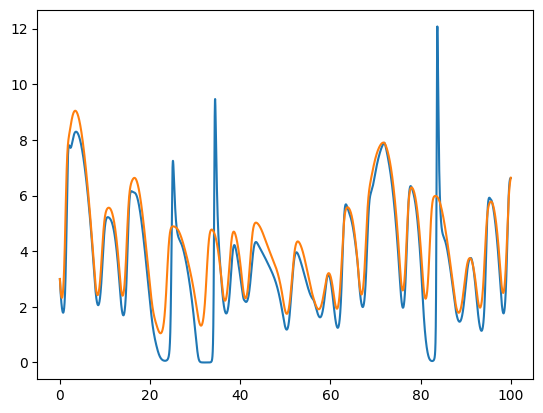

In [54]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(sl200r.t, sl200r.y[1])
plt.plot(sl201r.t, sl201r.y[1])
plt.show()